### Multi-omic Dataset: Latent representation using Kernel PCA
- Load Data
- Normalize Data
- Define Autoencoder Model
- Train Autoencoder with normalized dataset
- Use transformed dataset for classification
- Use transformed dataset for clustering
- Evaluation and Conclusions

In [2]:
import Models
import numpy as np
import random as rn
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)

# Load Data
X_brca_methyl_data = pd.read_csv('./BRCA_methylation.txt', sep=',', index_col=0) # Dataset has Donor ID as first column
X_brca_mRNA_data = pd.read_csv('./BRCA_mRNA.txt', sep=',', index_col=0) # Dataset has Donor ID as first column
X_brca_CNA_data = pd.read_csv('./BRCA_CNA.txt', sep=',' ,index_col=0) # Dataset has Donor ID as first column
y_brca_data = pd.read_csv('./BRCA_Clinical.txt', sep=',', index_col=0, names=["Label"]) # Dataset has Donor ID on first column and Label on second column.

X_brca_methyl_filtered = X_brca_methyl_data.drop(["TCGA-AO-A12C-01","TCGA-AR-A1AT-01"], axis=1)
X_brca_mRNA_filtered = X_brca_mRNA_data.drop(["TCGA-AO-A12C-01","TCGA-AR-A1AT-01","TCGA-BH-A18V-06"], axis=1)
X_brca_CNA_filtered = X_brca_CNA_data.drop(["TCGA-AR-A0U1-01"], axis=1)
y_brca_filtered = y_brca_data.drop(["TCGA-AO-A12C-01","TCGA-AR-A1AT-01","TCGA-BH-A18V-06"], axis=0)

X_train_first_norm, X_train_second_norm, X_swapped_first_norm, X_swapped_second_norm, X_test_first_norm, X_test_second_norm, X_train_concat, X_swapped_concat, X_test_concat, y_train, y_test, y_train_oh, y_test_oh \
    = Models.prepare_datasets(X_brca_methyl_filtered.T,X_brca_mRNA_filtered.T, y_brca_filtered, test_size=0.2, swap_noise=0.15)


swapping: 20 rows.


In [7]:
import importlib
importlib.reload(Models)

<module 'Models' from 'C:\\Desarrollo\\Data Science\\Jupyter Notebooks\\Stage\\oss-stage-2019\\Multiomic Dataset\\Models.py'>

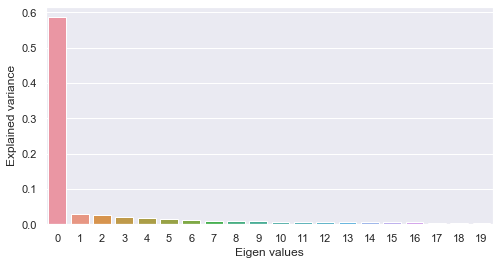

0.6998919405522652


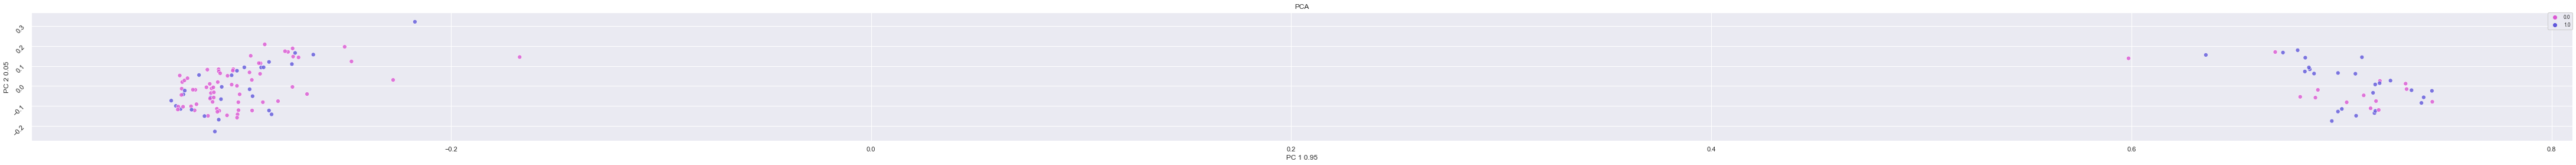

Results for KPCA: 

Best score for training data: 0.6 

Best C: 0.08 



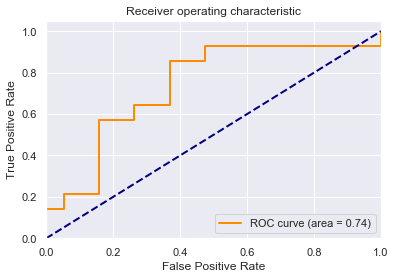

[[19  0]
 [14  0]]


              precision    recall  f1-score   support

           0       0.58      1.00      0.73        19
           1       0.00      0.00      0.00        14

    accuracy                           0.58        33
   macro avg       0.29      0.50      0.37        33
weighted avg       0.33      0.58      0.42        33

Training set score for Logistic Regression: 0.600000
Testing  set score for Logistic Regression: 0.575758
Best score for training data: 0.6846153846153846 

C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Best C: 1.0 

Best Gamma: 0.1 



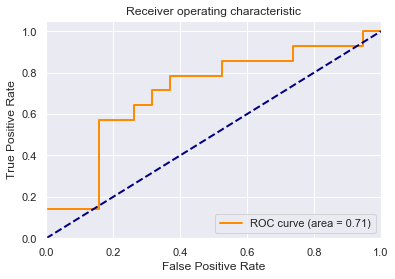

[[16  3]
 [ 6  8]]


              precision    recall  f1-score   support

           0       0.73      0.84      0.78        19
           1       0.73      0.57      0.64        14

    accuracy                           0.73        33
   macro avg       0.73      0.71      0.71        33
weighted avg       0.73      0.73      0.72        33

Training set score for SVM: 0.684615
Testing  set score for SVM: 0.727273
Best score for training data: 0.676923076923077 

Best #estimators: 140 

Best max depth: None 



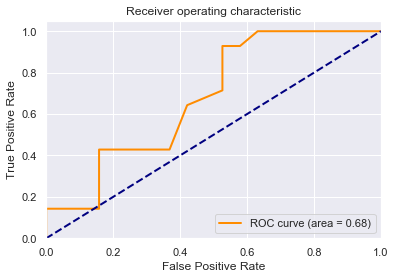

[[16  3]
 [10  4]]


              precision    recall  f1-score   support

           0       0.62      0.84      0.71        19
           1       0.57      0.29      0.38        14

    accuracy                           0.61        33
   macro avg       0.59      0.56      0.55        33
weighted avg       0.60      0.61      0.57        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.606061


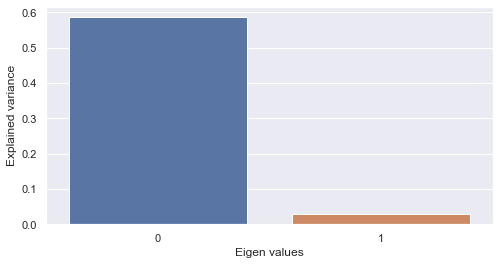

PCA on single-modal explained variance ratio: 0.6166076671286019


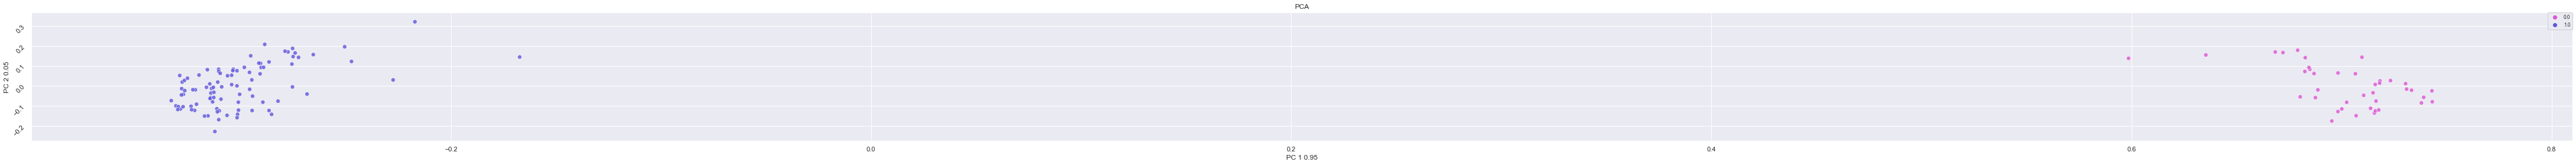

2 clusters -  silhoutte score: 0.5282788197724332 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.1848699721832278 - mutual information: 0.058594532449366125
4 clusters -  silhoutte score: 0.07349416083920482 - mutual information: 0.05884884516607971


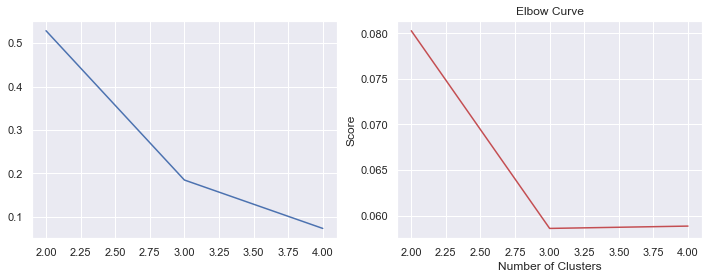

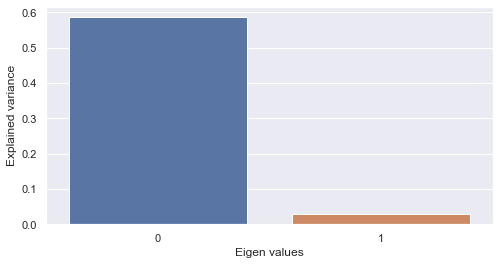

PCA on single-modal explained variance ratio: 0.6166076671286019


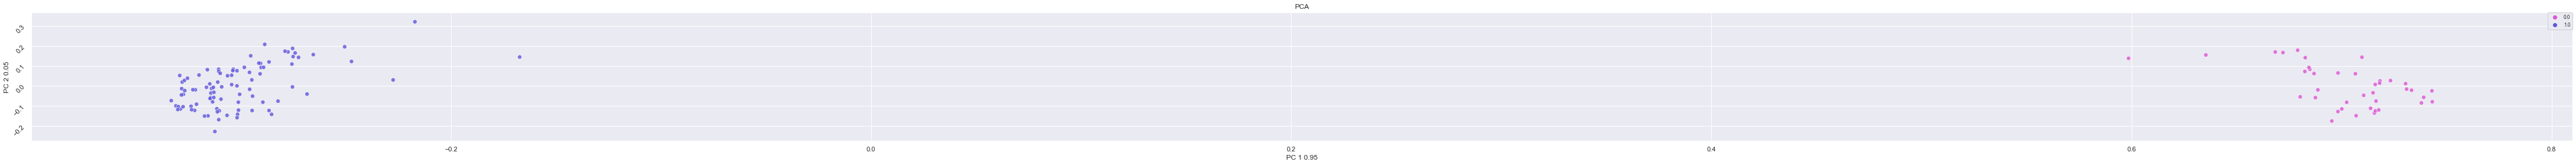

2 clusters -  silhoutte score: 0.5282788197724332 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.18670663042289387 - mutual information: 0.058803340008933974
4 clusters -  silhoutte score: 0.07603423248654083 - mutual information: 0.07024466268800736


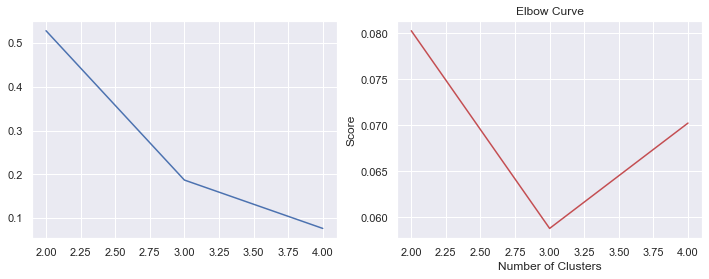

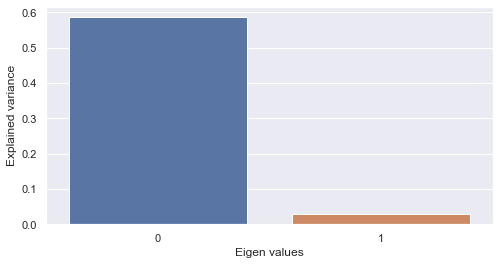

PCA on single-modal explained variance ratio: 0.6166076671286019


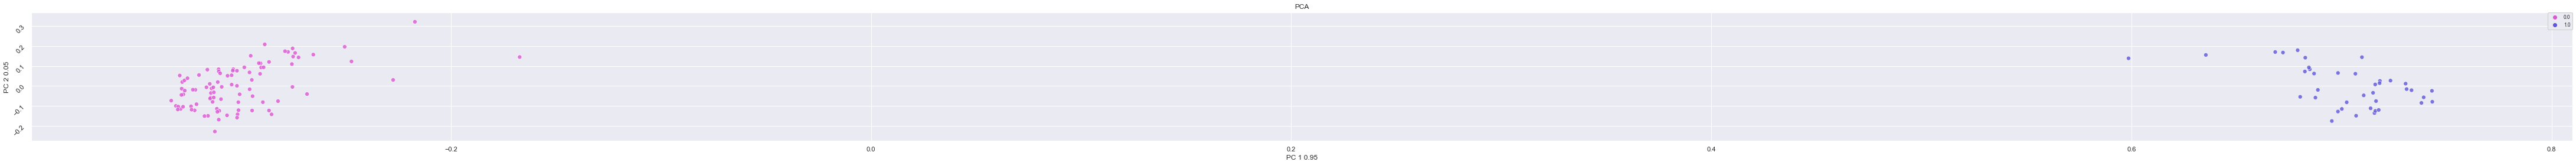

2 clusters -  silhoutte score: 0.5282788197724332 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.18470869689149128 - mutual information: 0.06245938351388302
4 clusters -  silhoutte score: 0.07032066899021476 - mutual information: 0.059074427010562154


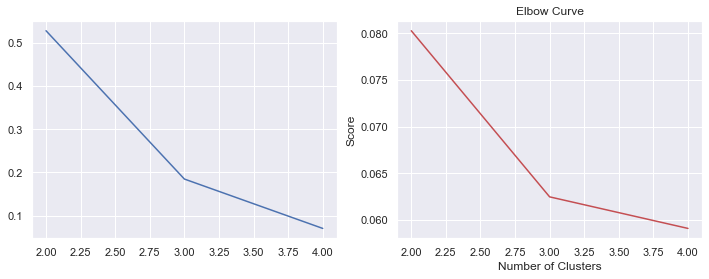

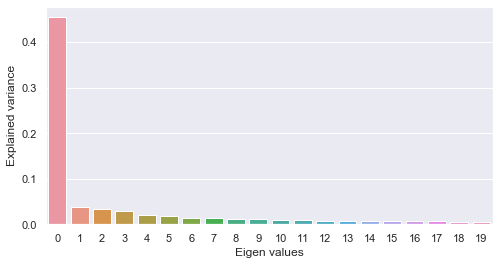

0.5924887483620827


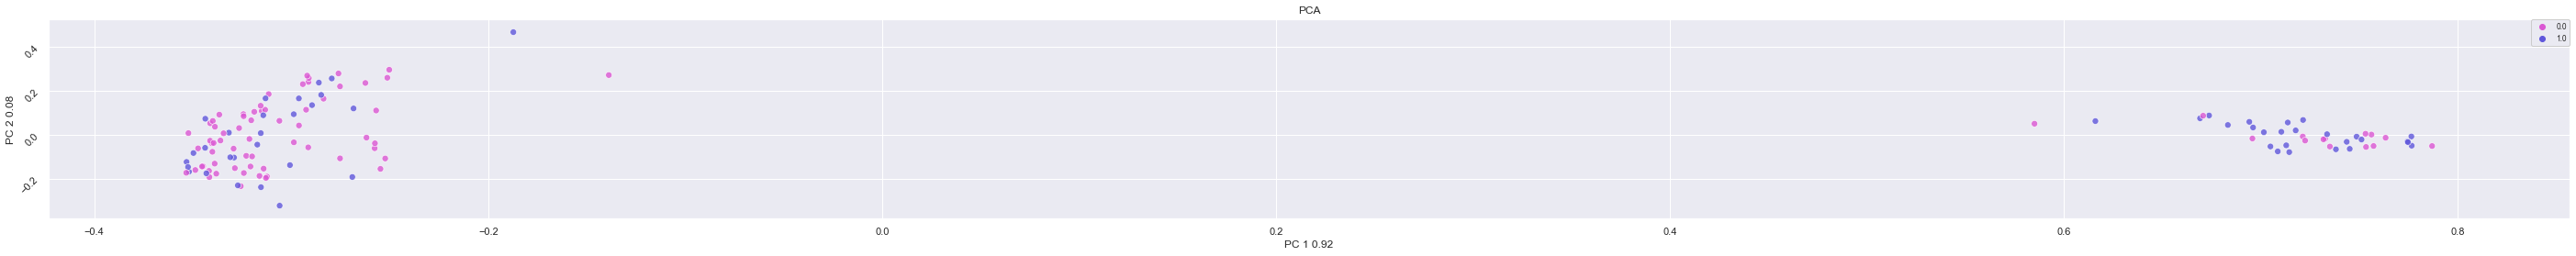

Results for KPCA: 

Best score for training data: 0.6 

Best C: 0.08 



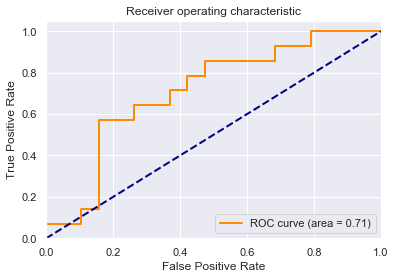

[[19  0]
 [14  0]]


              precision    recall  f1-score   support

           0       0.58      1.00      0.73        19
           1       0.00      0.00      0.00        14

    accuracy                           0.58        33
   macro avg       0.29      0.50      0.37        33
weighted avg       0.33      0.58      0.42        33

Training set score for Logistic Regression: 0.600000
Testing  set score for Logistic Regression: 0.575758
Best score for training data: 0.6846153846153846 

Best C: 1.0 

Best Gamma: 0.1 



C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


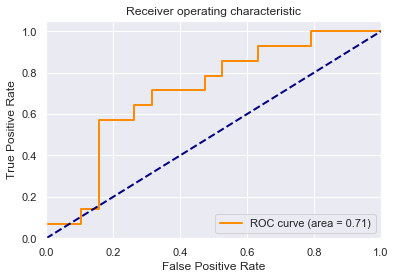

[[16  3]
 [ 6  8]]


              precision    recall  f1-score   support

           0       0.73      0.84      0.78        19
           1       0.73      0.57      0.64        14

    accuracy                           0.73        33
   macro avg       0.73      0.71      0.71        33
weighted avg       0.73      0.73      0.72        33

Training set score for SVM: 0.684615
Testing  set score for SVM: 0.727273
Best score for training data: 0.6769230769230768 

Best #estimators: 140 

Best max depth: None 



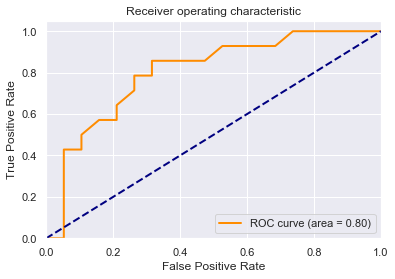

[[15  4]
 [ 5  9]]


              precision    recall  f1-score   support

           0       0.75      0.79      0.77        19
           1       0.69      0.64      0.67        14

    accuracy                           0.73        33
   macro avg       0.72      0.72      0.72        33
weighted avg       0.73      0.73      0.73        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.727273


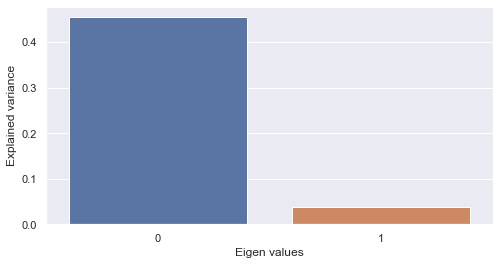

PCA on single-modal explained variance ratio: 0.49168846002439176


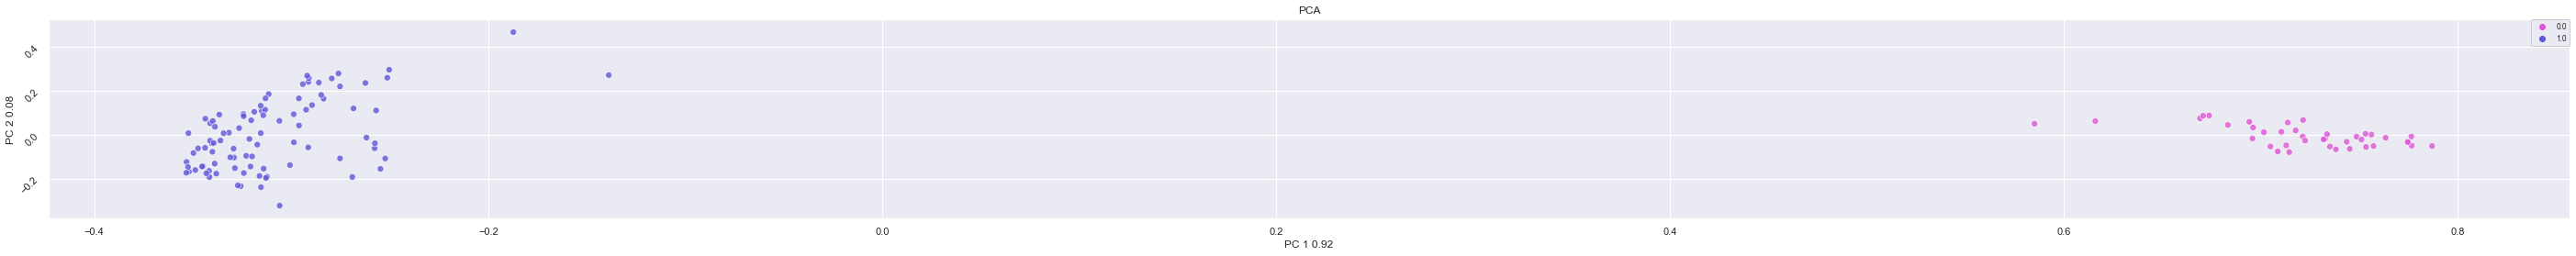

2 clusters -  silhoutte score: 0.429931941376228 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.14878566145677188 - mutual information: 0.06580381661856816
4 clusters -  silhoutte score: 0.07418703150341473 - mutual information: 0.08096352507362477


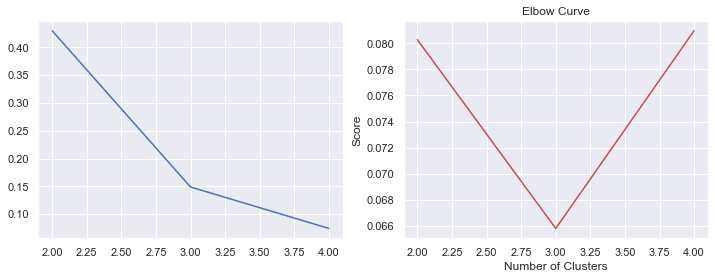

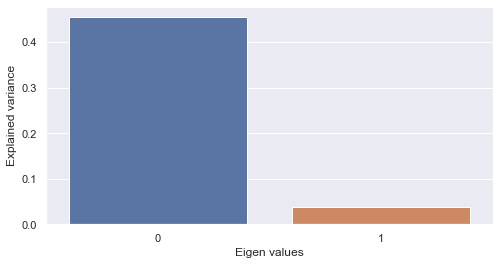

PCA on single-modal explained variance ratio: 0.49168846002439176


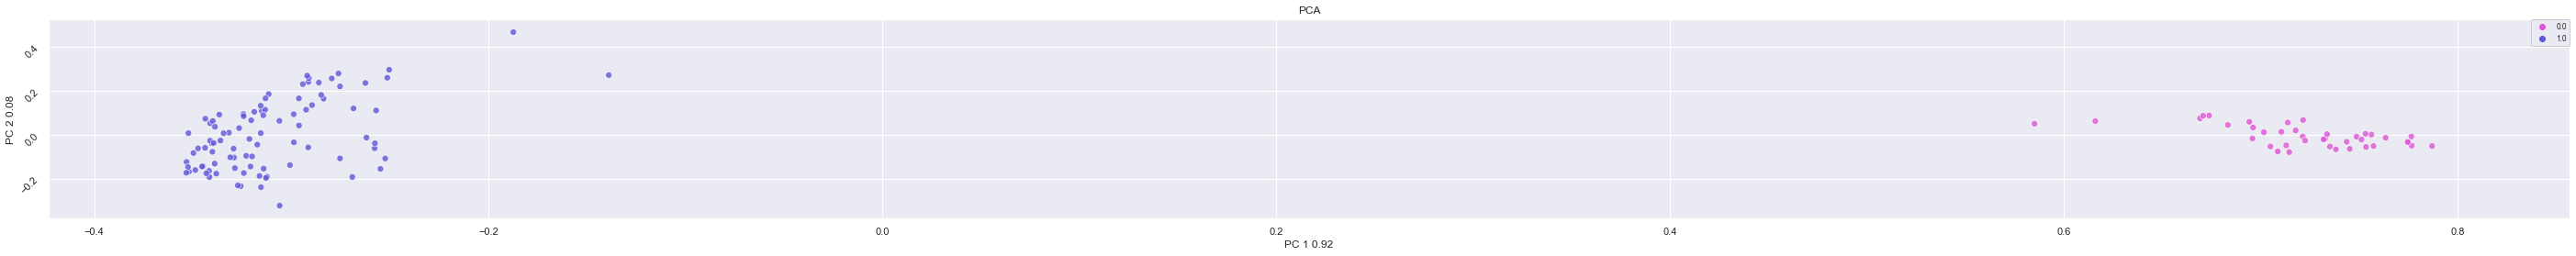

2 clusters -  silhoutte score: 0.429931941376228 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.1522832562159195 - mutual information: 0.059936835750118274
4 clusters -  silhoutte score: 0.14877628990389663 - mutual information: 0.06755565872379035


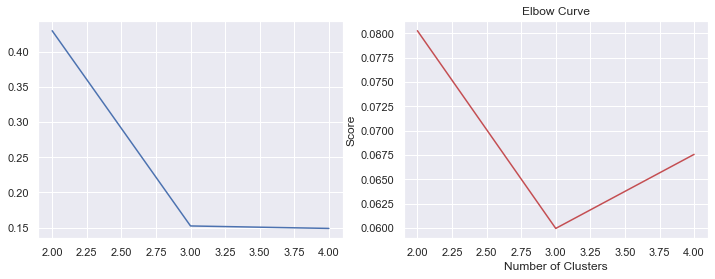

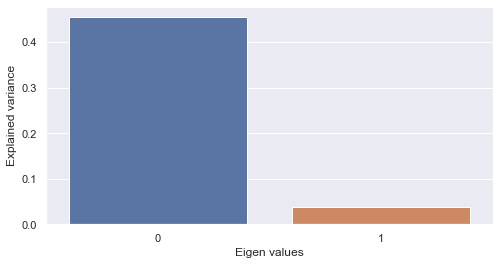

PCA on single-modal explained variance ratio: 0.49168846002439176


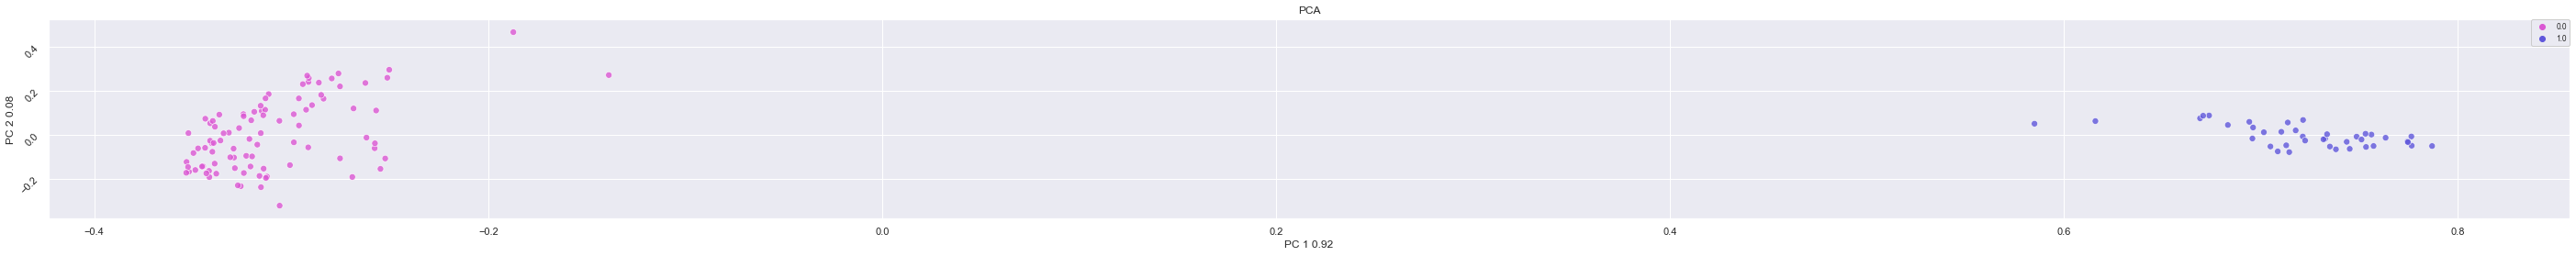

2 clusters -  silhoutte score: 0.429931941376228 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.15263855308838747 - mutual information: 0.060307250913229346
4 clusters -  silhoutte score: 0.06903058809431668 - mutual information: 0.057137487307899096


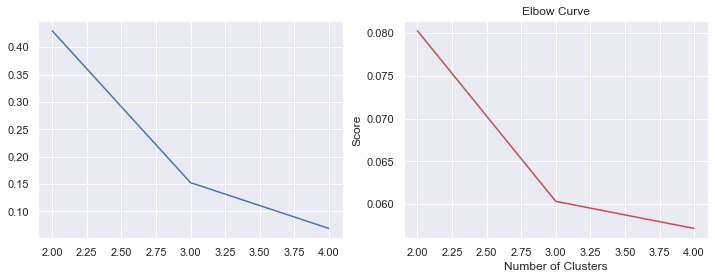

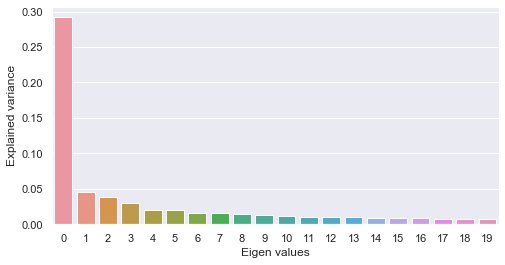

0.4468969722370894


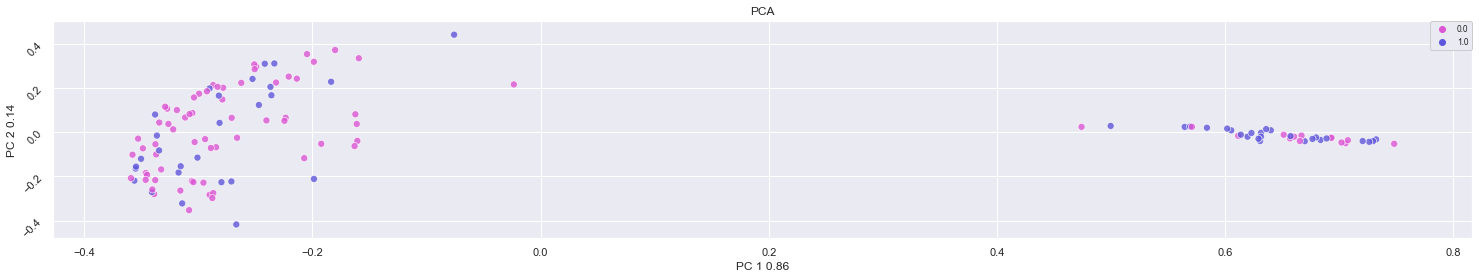

Results for KPCA: 

Best score for training data: 0.6 

Best C: 0.08 



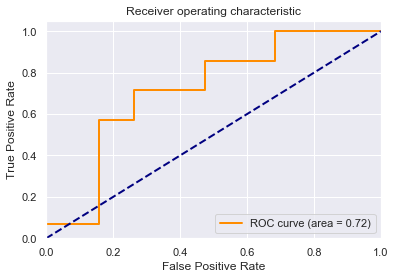

[[19  0]
 [14  0]]


              precision    recall  f1-score   support

           0       0.58      1.00      0.73        19
           1       0.00      0.00      0.00        14

    accuracy                           0.58        33
   macro avg       0.29      0.50      0.37        33
weighted avg       0.33      0.58      0.42        33

Training set score for Logistic Regression: 0.600000
Testing  set score for Logistic Regression: 0.575758
Best score for training data:

C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 0.6692307692307693 

Best C: 1.0 

Best Gamma: 0.1 



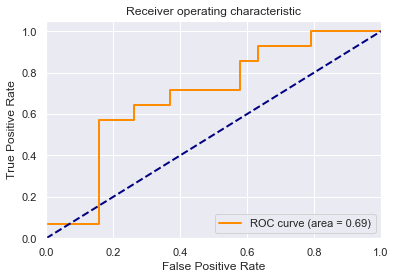

[[16  3]
 [ 6  8]]


              precision    recall  f1-score   support

           0       0.73      0.84      0.78        19
           1       0.73      0.57      0.64        14

    accuracy                           0.73        33
   macro avg       0.73      0.71      0.71        33
weighted avg       0.73      0.73      0.72        33

Training set score for SVM: 0.684615
Testing  set score for SVM: 0.727273
Best score for training data: 0.6538461538461539 

Best #estimators: 140 

Best max depth: None 



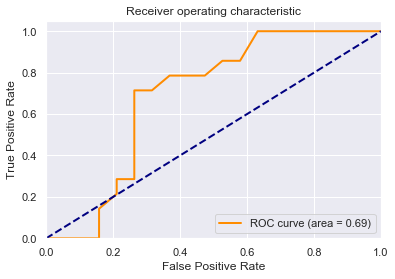

[[14  5]
 [ 5  9]]


              precision    recall  f1-score   support

           0       0.74      0.74      0.74        19
           1       0.64      0.64      0.64        14

    accuracy                           0.70        33
   macro avg       0.69      0.69      0.69        33
weighted avg       0.70      0.70      0.70        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.696970


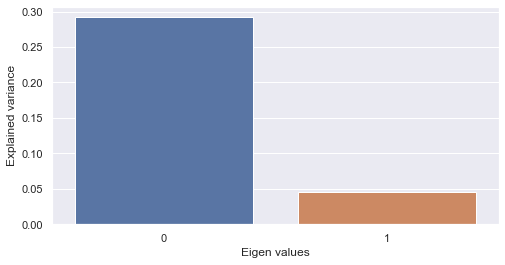

PCA on single-modal explained variance ratio: 0.3378867899224214


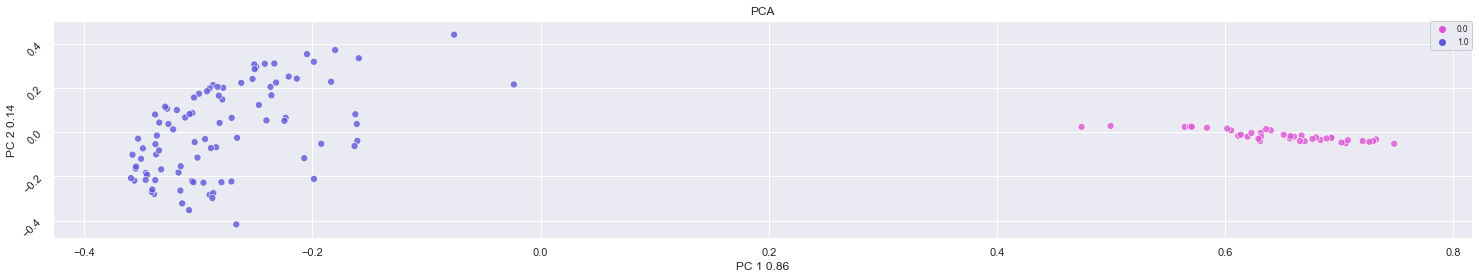

2 clusters -  silhoutte score: 0.2991436614118411 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.10704746140839502 - mutual information: 0.06580381661856816
4 clusters -  silhoutte score: 0.06764540183937723 - mutual information: 0.08645430074660257


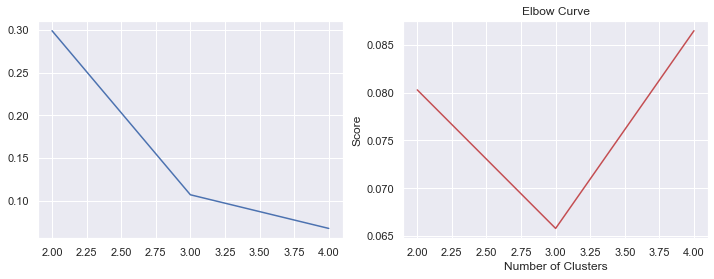

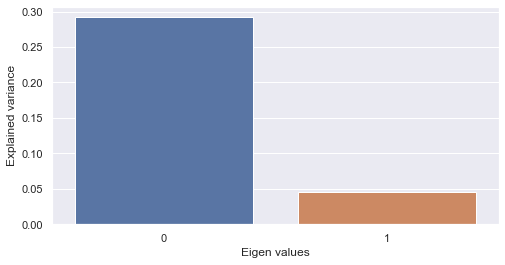

PCA on single-modal explained variance ratio: 0.3378867899224214


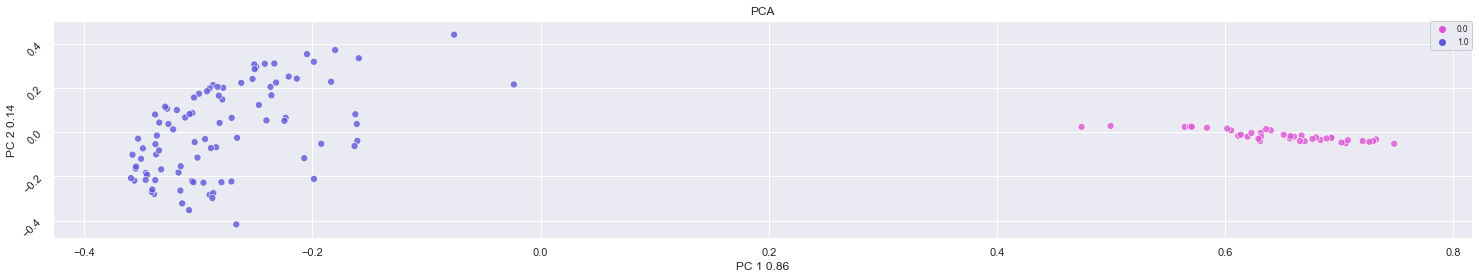

2 clusters -  silhoutte score: 0.2991436614118411 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.10957928275231828 - mutual information: 0.06174399694017896
4 clusters -  silhoutte score: 0.1063414226502013 - mutual information: 0.0630273920913617


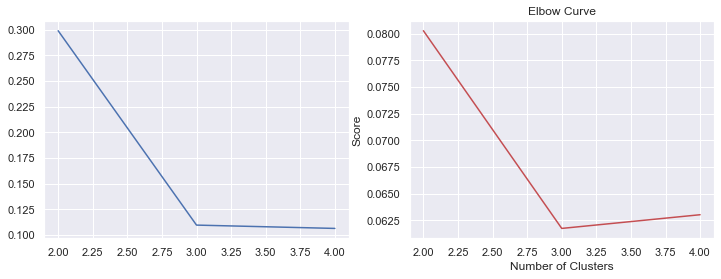

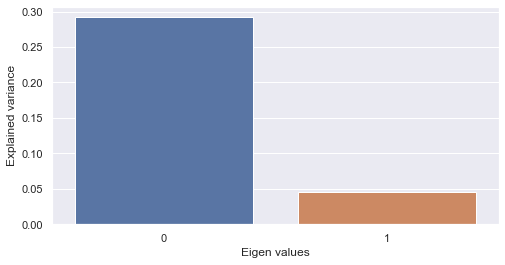

PCA on single-modal explained variance ratio: 0.3378867899224214


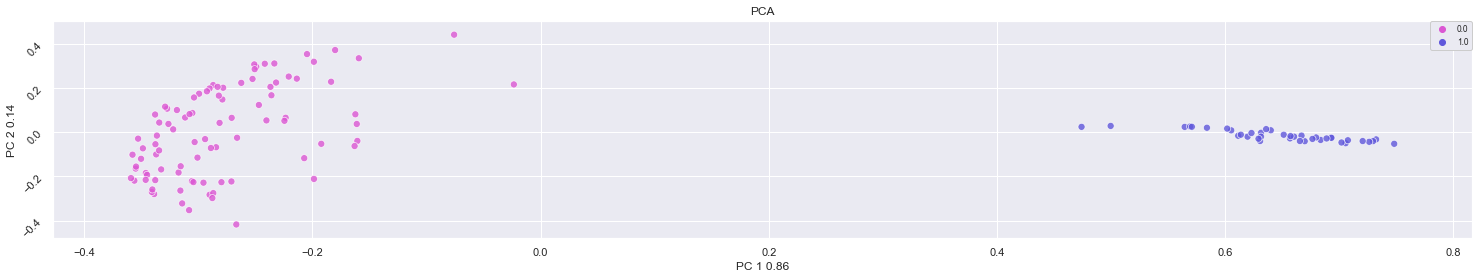

2 clusters -  silhoutte score: 0.2991436614118411 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.10980627567809229 - mutual information: 0.06587872738210511
4 clusters -  silhoutte score: 0.06766867454031085 - mutual information: 0.06985351479620032


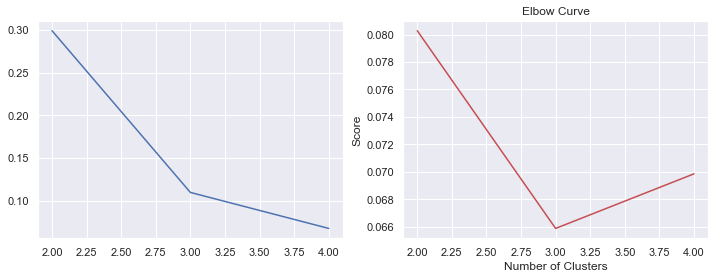

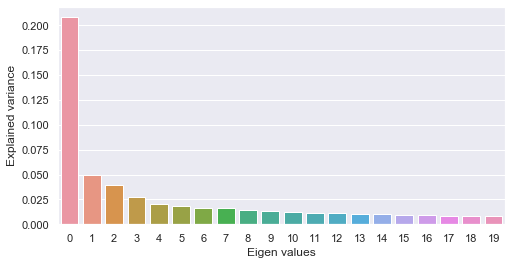

0.36276947436487894


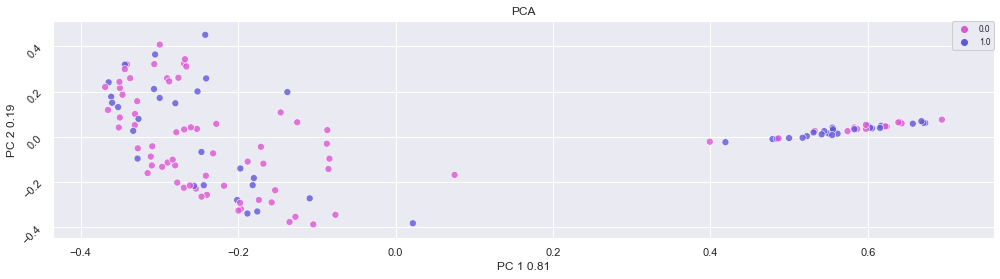

Results for KPCA: 

Best score for training data: 0.6 

Best C: 0.08 



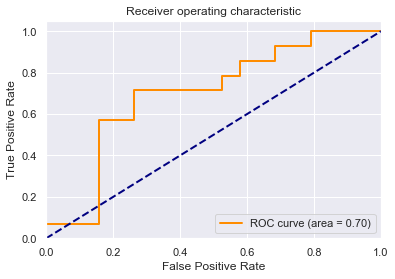

[[19  0]
 [14  0]]


              precision    recall  f1-score   support

           0       0.58      1.00      0.73        19
           1       0.00      0.00      0.00        14

    accuracy                           0.58        33
   macro avg       0.29      0.50      0.37        33
weighted avg       0.33      0.58      0.42        33

Training set score for Logistic Regression: 0.600000
Testing  set score for Logistic Regression: 0.575758
Best score for training data: 0.6 

Best C: 0.1 

Best Gamma: scale 



C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


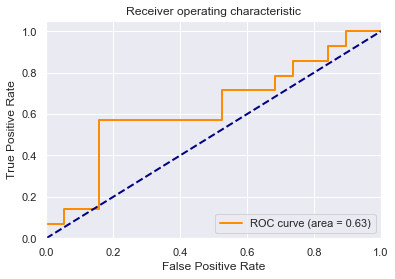

[[19  0]
 [14  0]]


              precision    recall  f1-score   support

           0       0.58      1.00      0.73        19
           1       0.00      0.00      0.00        14

    accuracy                           0.58        33
   macro avg       0.29      0.50      0.37        33
weighted avg       0.33      0.58      0.42        33

Training set score for SVM: 0.600000
Testing  set score for SVM: 0.575758


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6692307692307693 

Best #estimators: 100 

Best max depth: 12 



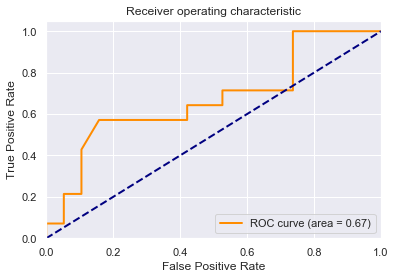

[[11  8]
 [ 6  8]]


              precision    recall  f1-score   support

           0       0.65      0.58      0.61        19
           1       0.50      0.57      0.53        14

    accuracy                           0.58        33
   macro avg       0.57      0.58      0.57        33
weighted avg       0.58      0.58      0.58        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.575758


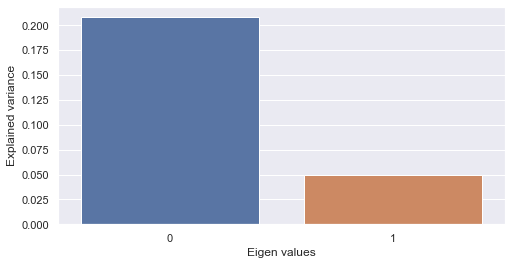

PCA on single-modal explained variance ratio: 0.25736328714617657


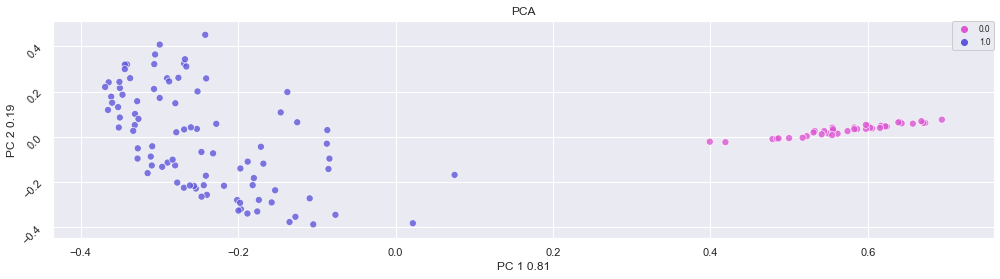

2 clusters -  silhoutte score: 0.22286720807197666 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.08622391279251981 - mutual information: 0.06174399694017896
4 clusters -  silhoutte score: 0.08363912963815417 - mutual information: 0.07514132108612159


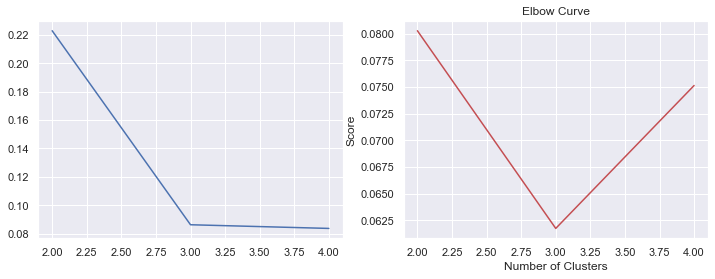

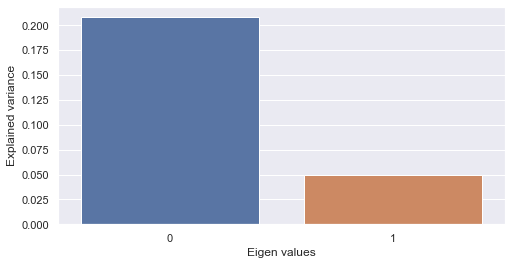

PCA on single-modal explained variance ratio: 0.25736328714617657


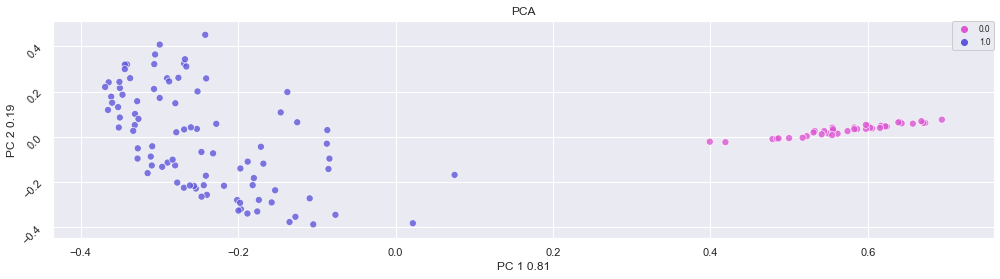

2 clusters -  silhoutte score: 0.22286720807197666 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.08561176848832465 - mutual information: 0.06291340822037277
4 clusters -  silhoutte score: 0.08066642752952882 - mutual information: 0.05823427767281974


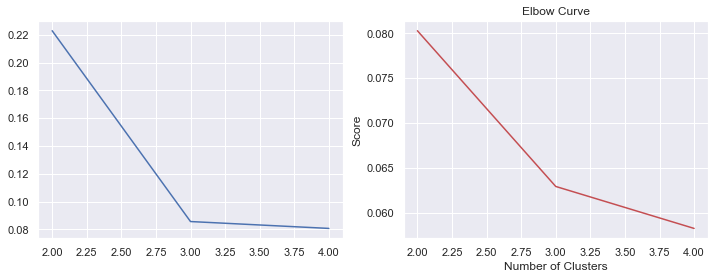

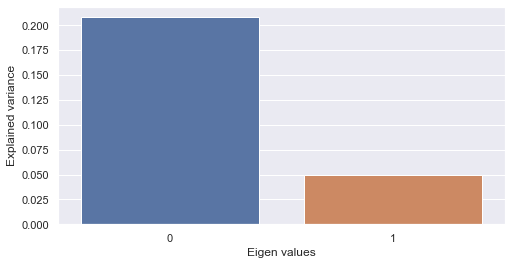

PCA on single-modal explained variance ratio: 0.25736328714617657


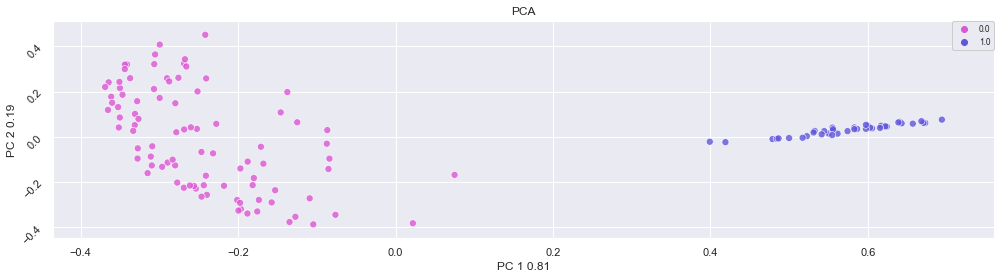

2 clusters -  silhoutte score: 0.22286720807197666 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.08537070473589939 - mutual information: 0.06691305653898612
4 clusters -  silhoutte score: 0.060535592297419456 - mutual information: 0.06403726113275983


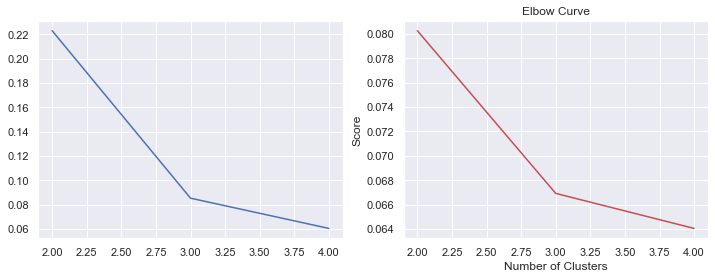

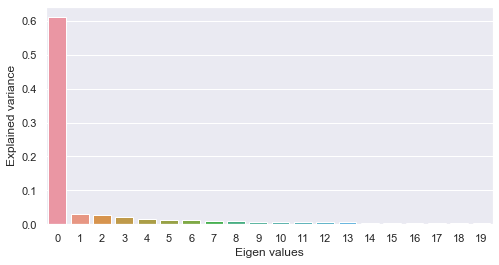

0.7205941879378198


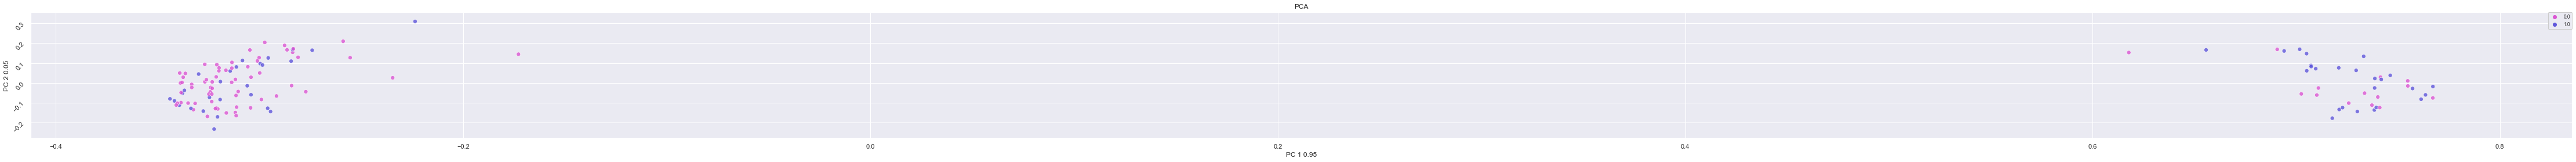

Results for KPCA: 

Best score for training data: 0.6 

Best C: 0.08 



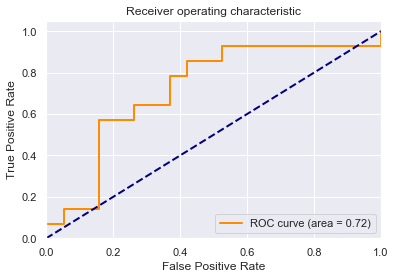

[[19  0]
 [14  0]]


              precision    recall  f1-score   support

           0       0.58      1.00      0.73        19
           1       0.00      0.00      0.00        14

    accuracy                           0.58        33
   macro avg       0.29      0.50      0.37        33
weighted avg       0.33      0.58      0.42        33

Training set score for Logistic Regression: 0.600000
Testing  set score for Logistic Regression: 0.575758
Best score for training data: 0.6846153846153846 

Best C: 1.0 

Best Gamma: 0.1 



C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


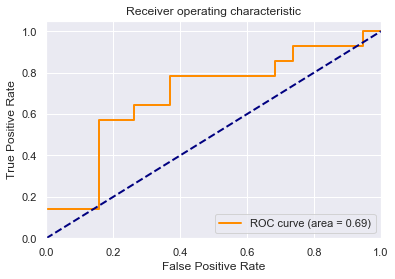

[[16  3]
 [ 6  8]]


              precision    recall  f1-score   support

           0       0.73      0.84      0.78        19
           1       0.73      0.57      0.64        14

    accuracy                           0.73        33
   macro avg       0.73      0.71      0.71        33
weighted avg       0.73      0.73      0.72        33

Training set score for SVM: 0.684615
Testing  set score for SVM: 0.727273
Best score for training data: 0.6923076923076923 

Best #estimators: 140 

Best max depth: None 



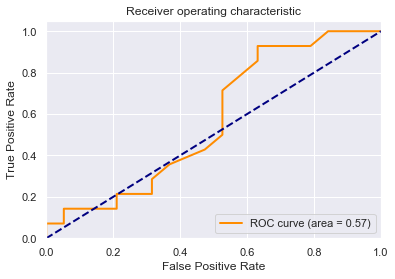

[[15  4]
 [12  2]]


              precision    recall  f1-score   support

           0       0.56      0.79      0.65        19
           1       0.33      0.14      0.20        14

    accuracy                           0.52        33
   macro avg       0.44      0.47      0.43        33
weighted avg       0.46      0.52      0.46        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.515152


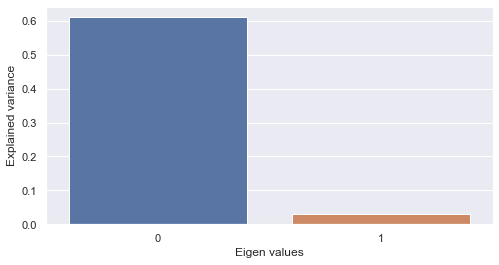

PCA on single-modal explained variance ratio: 0.6418996654958387


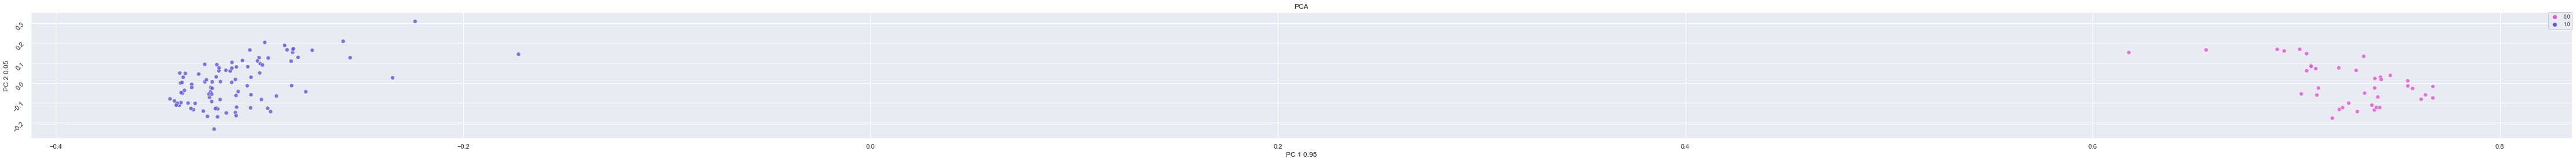

2 clusters -  silhoutte score: 0.5478221034910697 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.19738718966872323 - mutual information: 0.059618981138268044
4 clusters -  silhoutte score: 0.0820038700625906 - mutual information: 0.05884884516607971


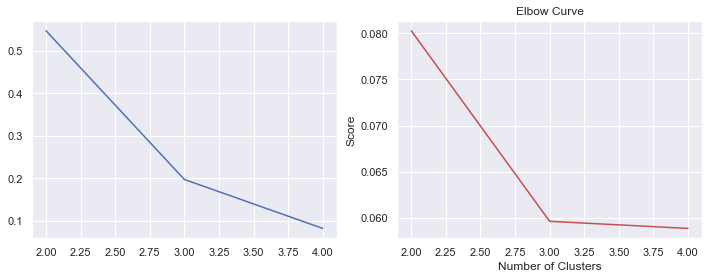

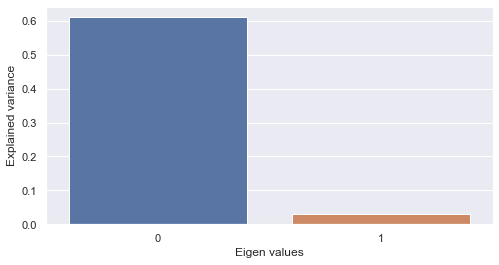

PCA on single-modal explained variance ratio: 0.6418996654958387


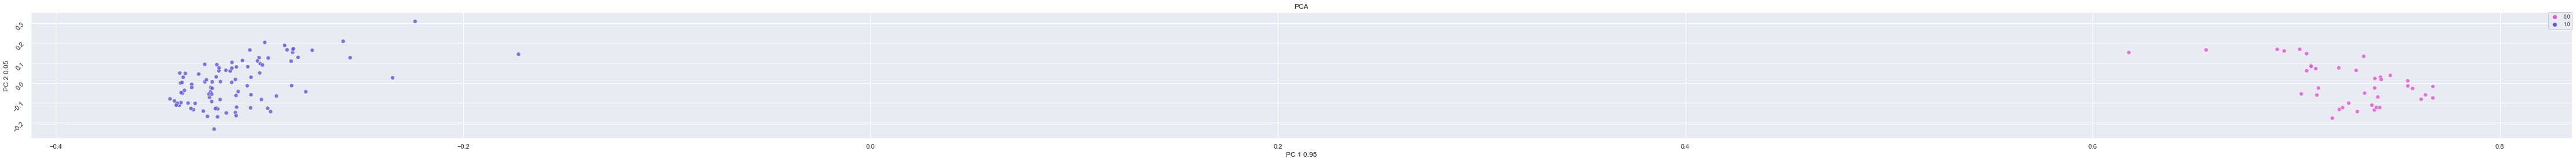

2 clusters -  silhoutte score: 0.5478221034910697 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.19789739823123162 - mutual information: 0.058803340008933974
4 clusters -  silhoutte score: 0.08668476763995722 - mutual information: 0.06647520491367256


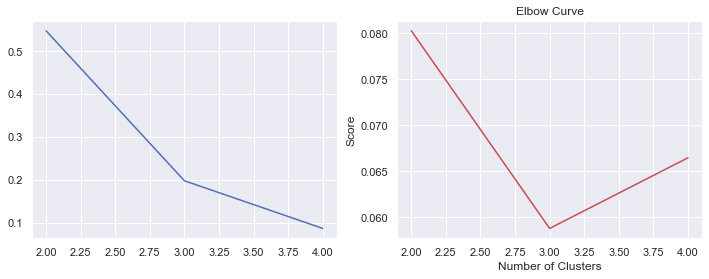

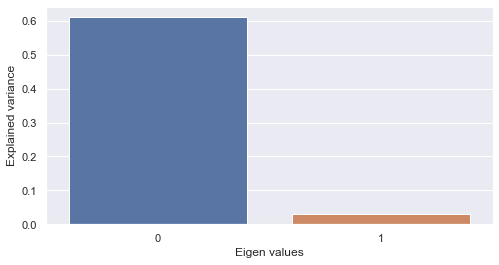

PCA on single-modal explained variance ratio: 0.6418996654958387


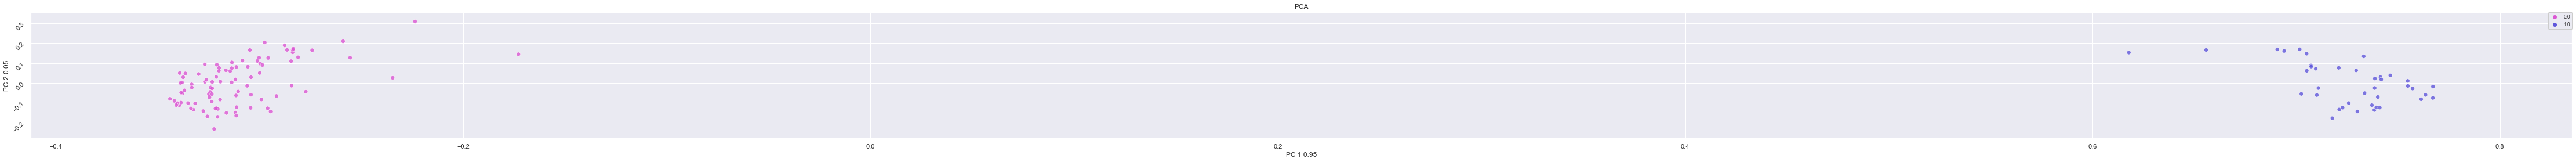

2 clusters -  silhoutte score: 0.5478221034910697 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.18628188673138601 - mutual information: 0.06426501514823664
4 clusters -  silhoutte score: 0.06932813713952075 - mutual information: 0.060732193396795996


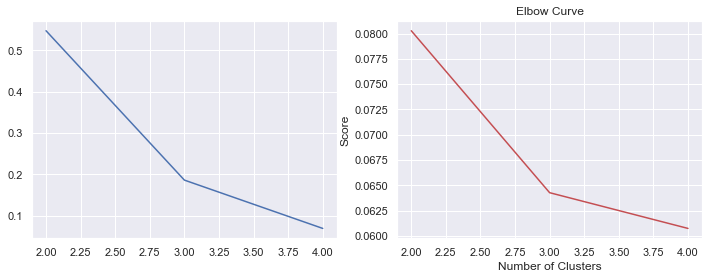

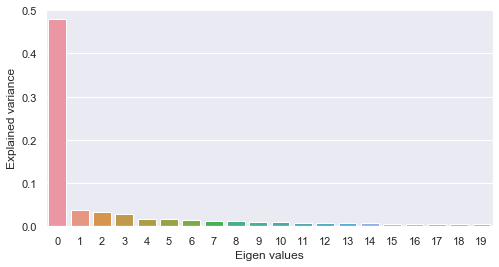

0.614974548030061


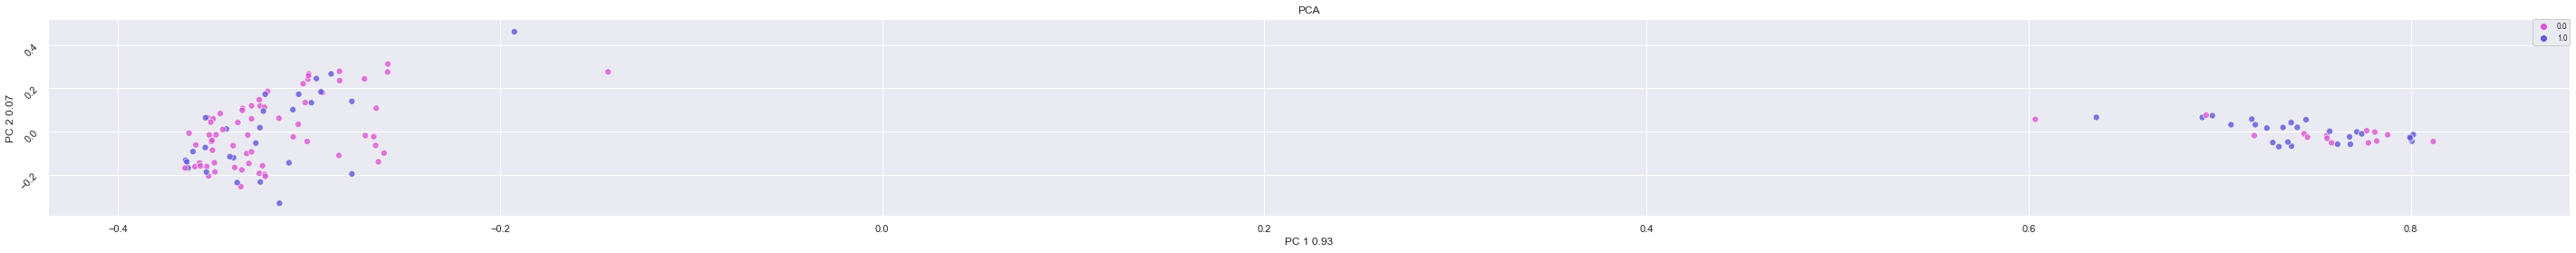

Results for KPCA: 

Best score for training data: 0.6 

Best C: 0.08 



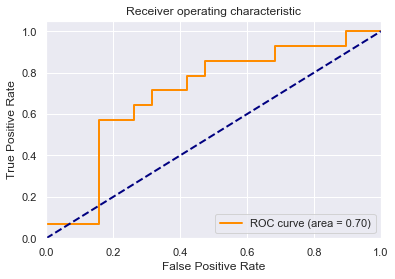

[[19  0]
 [14  0]]


              precision    recall  f1-score   support

           0       0.58      1.00      0.73        19
           1       0.00      0.00      0.00        14

    accuracy                           0.58        33
   macro avg       0.29      0.50      0.37        33
weighted avg       0.33      0.58      0.42        33

Training set score for Logistic Regression: 0.607692
Testing  set score for Logistic Regression: 0.575758
Best score for training data: 0.6846153846153846 

Best C: 1.0 

Best Gamma: 0.1 



C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


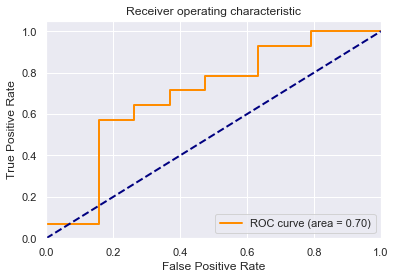

[[16  3]
 [ 6  8]]


              precision    recall  f1-score   support

           0       0.73      0.84      0.78        19
           1       0.73      0.57      0.64        14

    accuracy                           0.73        33
   macro avg       0.73      0.71      0.71        33
weighted avg       0.73      0.73      0.72        33

Training set score for SVM: 0.684615
Testing  set score for SVM: 0.727273
Best score for training data: 0.6923076923076923 

Best #estimators: 100 

Best max depth: 12 



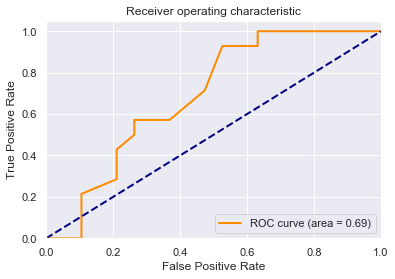

[[15  4]
 [ 9  5]]


              precision    recall  f1-score   support

           0       0.62      0.79      0.70        19
           1       0.56      0.36      0.43        14

    accuracy                           0.61        33
   macro avg       0.59      0.57      0.57        33
weighted avg       0.60      0.61      0.59        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.606061


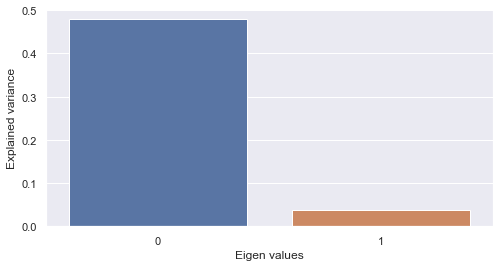

PCA on single-modal explained variance ratio: 0.5177052381162607


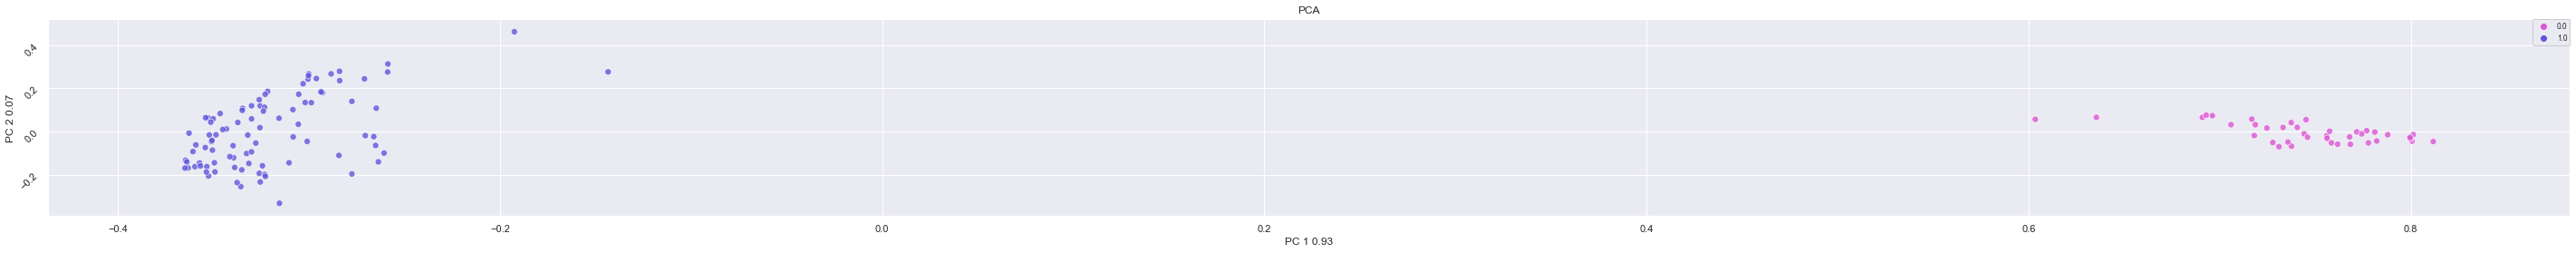

2 clusters -  silhoutte score: 0.4499362196236134 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.16275636587655296 - mutual information: 0.058594532449366125
4 clusters -  silhoutte score: 0.09220157041019007 - mutual information: 0.06498421626650772


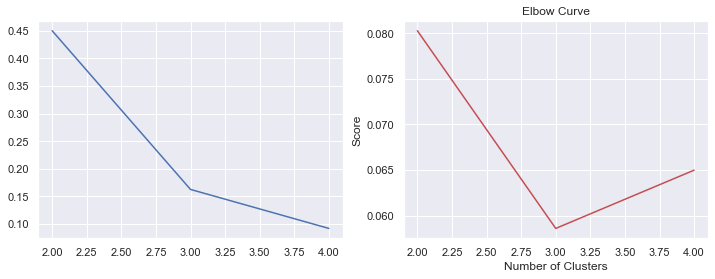

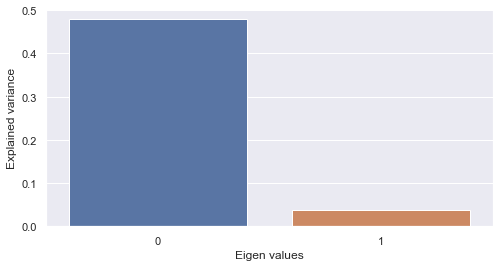

PCA on single-modal explained variance ratio: 0.5177052381162607


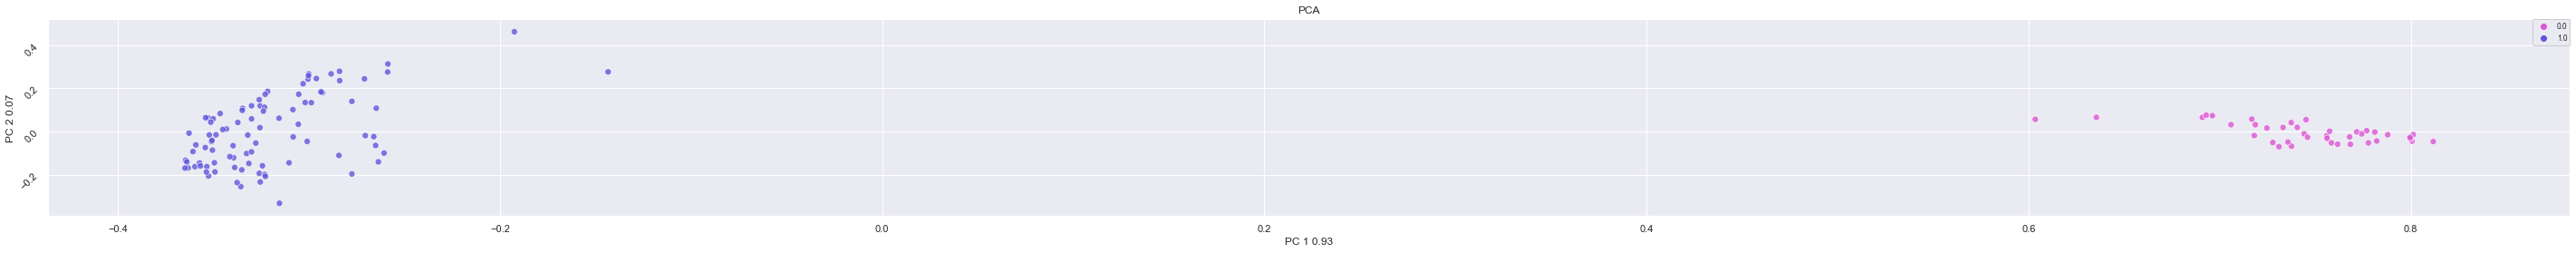

2 clusters -  silhoutte score: 0.4499362196236134 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.1622541239575184 - mutual information: 0.060752807149287144
4 clusters -  silhoutte score: 0.08048658370788635 - mutual information: 0.07233219860991526


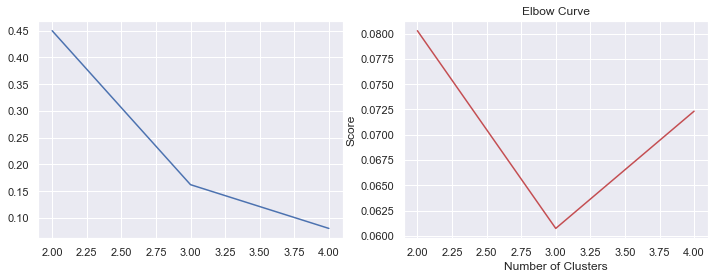

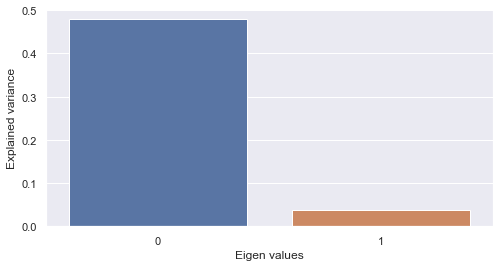

PCA on single-modal explained variance ratio: 0.5177052381162607


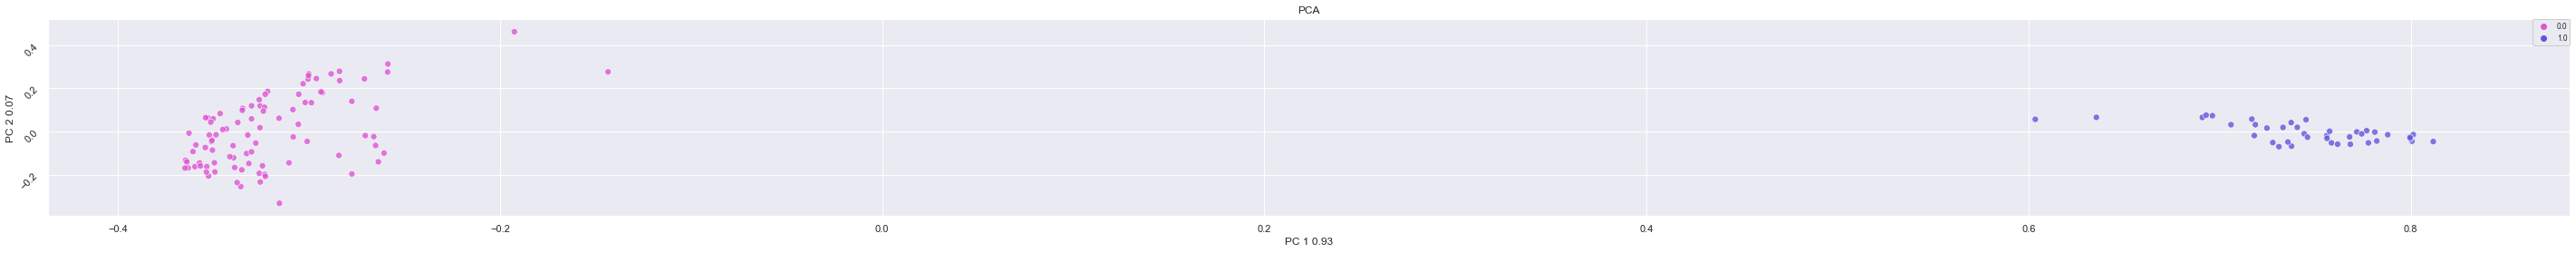

2 clusters -  silhoutte score: 0.4499362196236134 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.16247187179612535 - mutual information: 0.06587872738210511
4 clusters -  silhoutte score: 0.07632613261605961 - mutual information: 0.062172542362570436


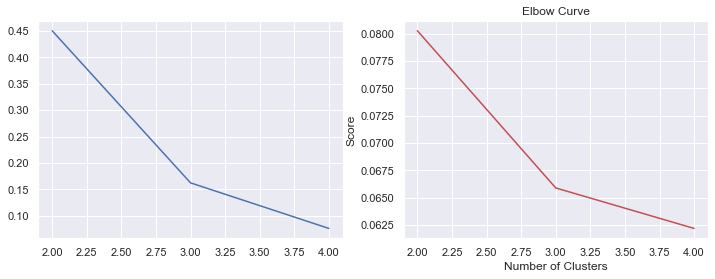

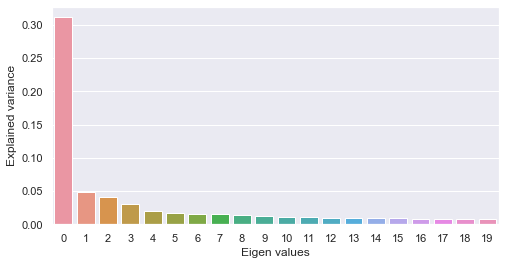

0.4690667529683531


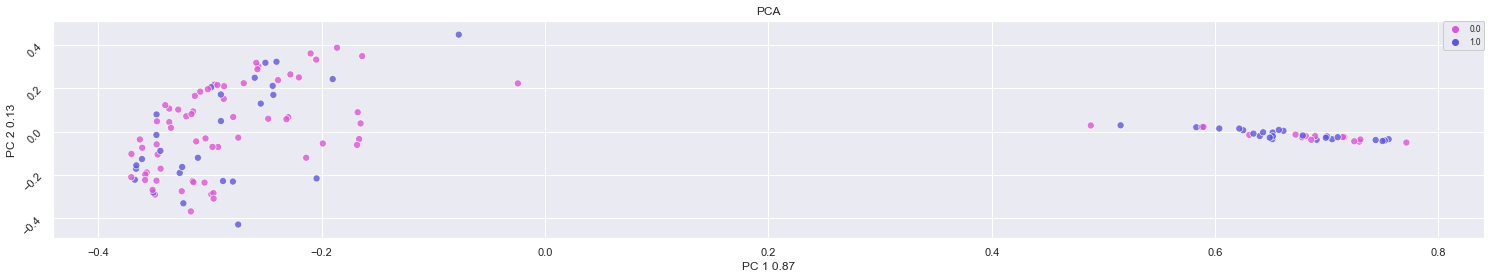

Results for KPCA: 

Best score for training data: 0.6 

Best C: 0.08 



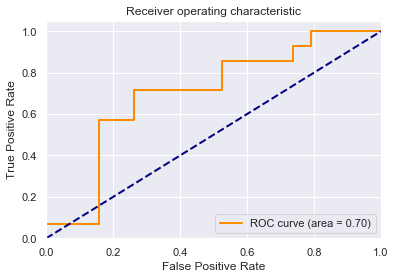

[[19  0]
 [14  0]]


              precision    recall  f1-score   support

           0       0.58      1.00      0.73        19
           1       0.00      0.00      0.00        14

    accuracy                           0.58        33
   macro avg       0.29      0.50      0.37        33
weighted avg       0.33      0.58      0.42        33

Training set score for Logistic Regression: 0.600000
Testing  set score for Logistic Regression: 0.575758
Best score for training data: 0.6615384615384616 

Best C: 1.0 

Best Gamma: 0.1 



C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


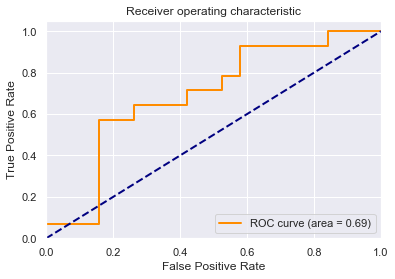

[[16  3]
 [ 6  8]]


              precision    recall  f1-score   support

           0       0.73      0.84      0.78        19
           1       0.73      0.57      0.64        14

    accuracy                           0.73        33
   macro avg       0.73      0.71      0.71        33
weighted avg       0.73      0.73      0.72        33

Training set score for SVM: 0.684615
Testing  set score for SVM: 0.727273
Best score for training data: 0.6846153846153846 

Best #estimators: 140 

Best max depth: None 



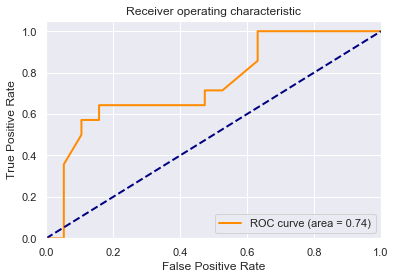

[[15  4]
 [ 5  9]]


              precision    recall  f1-score   support

           0       0.75      0.79      0.77        19
           1       0.69      0.64      0.67        14

    accuracy                           0.73        33
   macro avg       0.72      0.72      0.72        33
weighted avg       0.73      0.73      0.73        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.727273


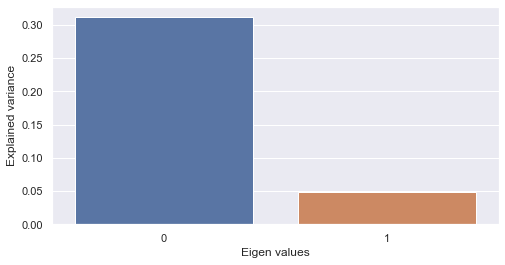

PCA on single-modal explained variance ratio: 0.3599439255582132


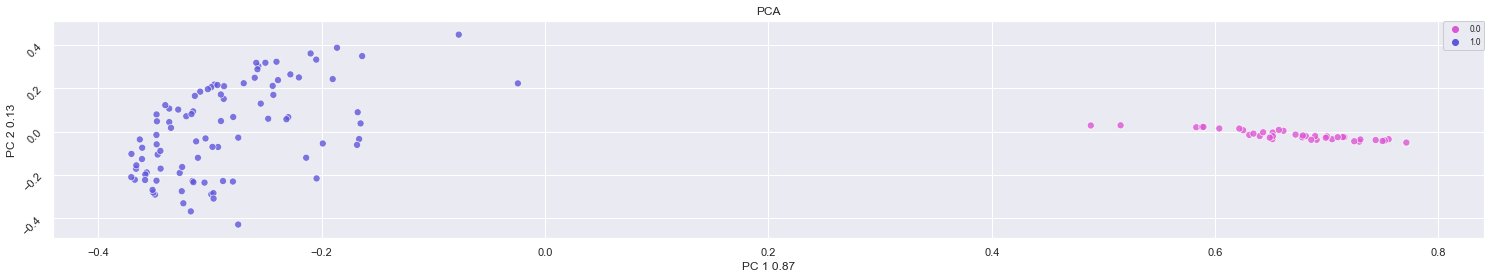

2 clusters -  silhoutte score: 0.31683976264671027 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.12091257843625869 - mutual information: 0.05929401259333176
4 clusters -  silhoutte score: 0.08196020682185642 - mutual information: 0.06175694920938926


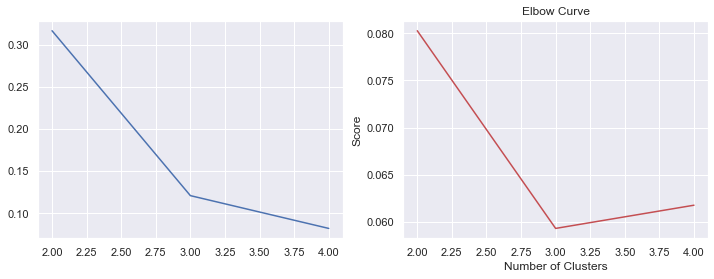

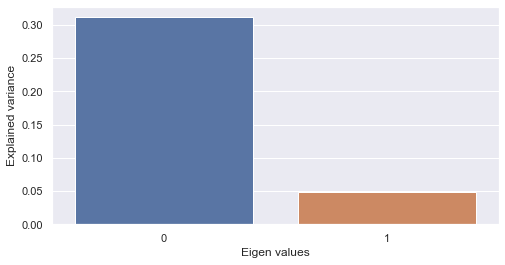

PCA on single-modal explained variance ratio: 0.3599439255582132


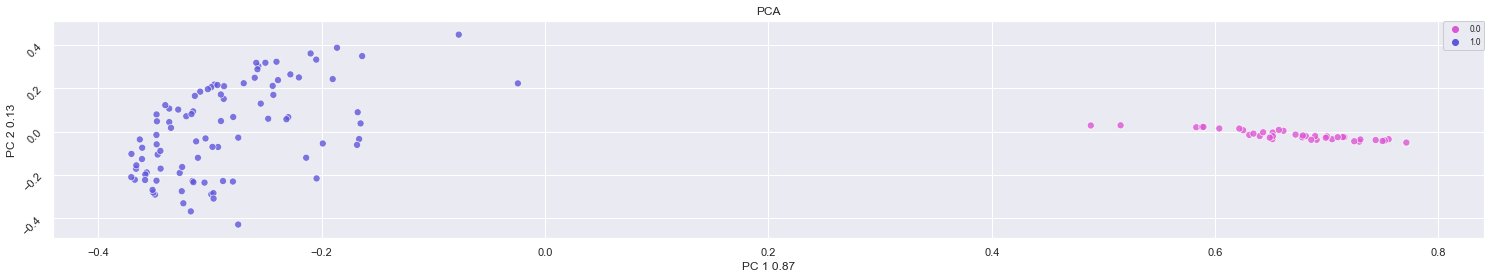

2 clusters -  silhoutte score: 0.31683976264671027 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.11860597541549614 - mutual information: 0.06174399694017896
4 clusters -  silhoutte score: 0.11517476509344314 - mutual information: 0.061340888925420126


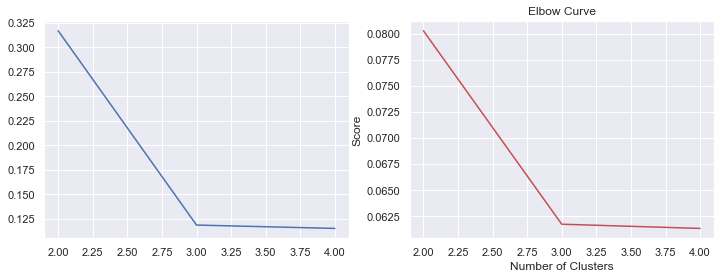

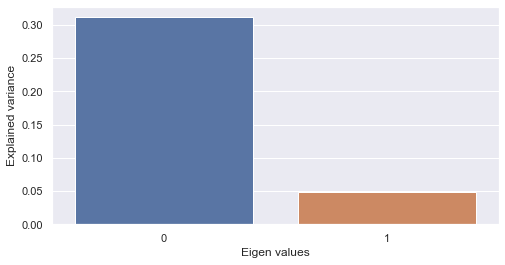

PCA on single-modal explained variance ratio: 0.3599439255582132


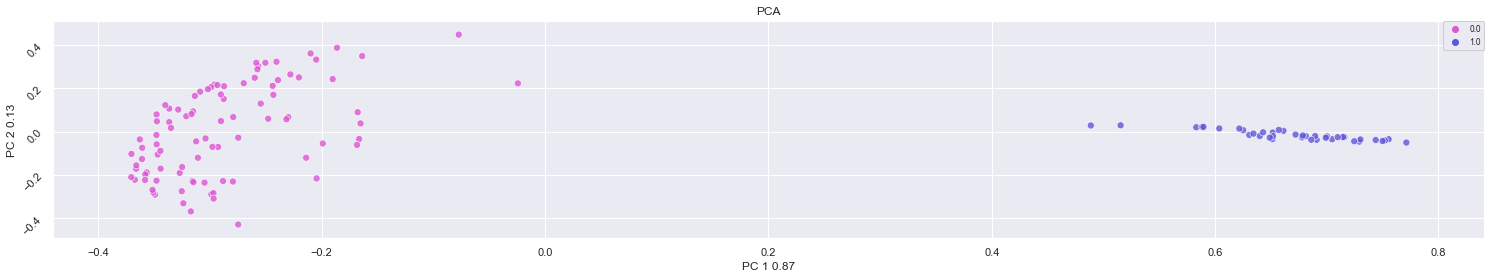

2 clusters -  silhoutte score: 0.31683976264671027 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.12109543611142082 - mutual information: 0.07048454917901441
4 clusters -  silhoutte score: 0.07809646434509049 - mutual information: 0.0772933597218836


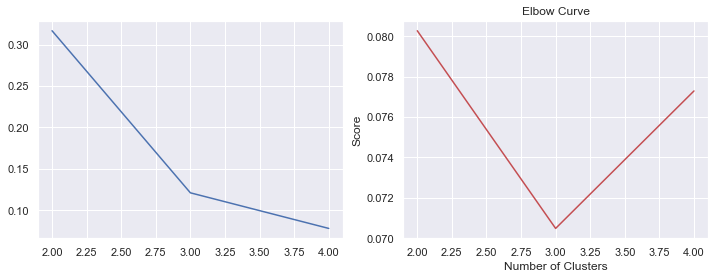

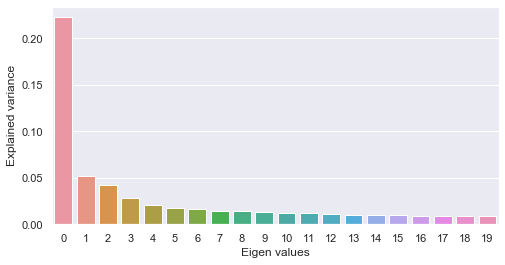

0.38374843788023566


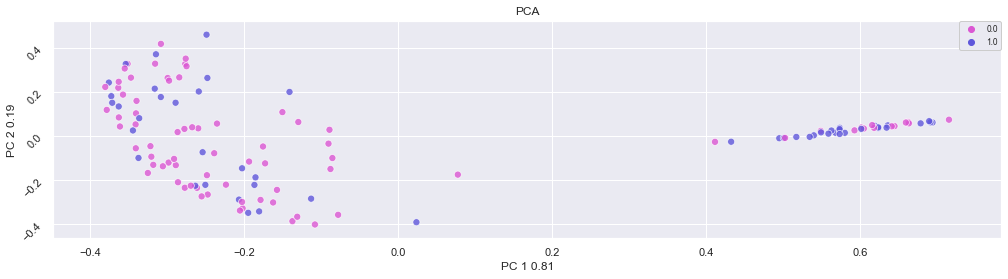

Results for KPCA: 

Best score for training data: 0.6 

Best C: 0.08 



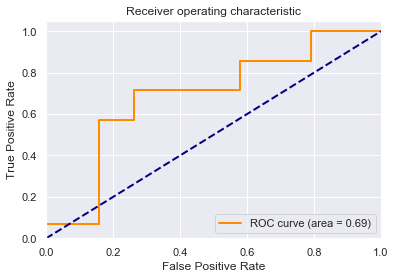

[[19  0]
 [14  0]]


              precision    recall  f1-score   support

           0       0.58      1.00      0.73        19
           1       0.00      0.00      0.00        14

    accuracy                           0.58        33
   macro avg       0.29      0.50      0.37        33
weighted avg       0.33      0.58      0.42        33

Training set score for Logistic Regression: 0.600000
Testing  set score for Logistic Regression: 0.575758
Best score for training data: 0.6307692307692307 

Best C: 1.0 

Best Gamma: 0.1 



C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


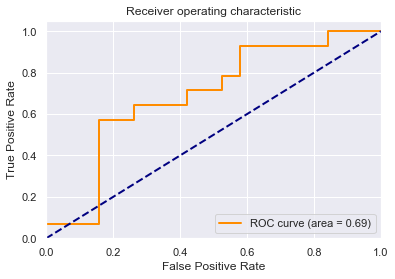

[[16  3]
 [ 7  7]]


              precision    recall  f1-score   support

           0       0.70      0.84      0.76        19
           1       0.70      0.50      0.58        14

    accuracy                           0.70        33
   macro avg       0.70      0.67      0.67        33
weighted avg       0.70      0.70      0.69        33

Training set score for SVM: 0.753846
Testing  set score for SVM: 0.696970
Best score for training data: 0.6846153846153846 

Best #estimators: 100 

Best max depth: 12 



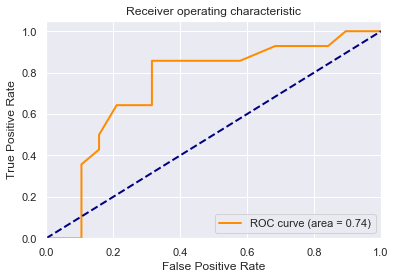

[[15  4]
 [ 5  9]]


              precision    recall  f1-score   support

           0       0.75      0.79      0.77        19
           1       0.69      0.64      0.67        14

    accuracy                           0.73        33
   macro avg       0.72      0.72      0.72        33
weighted avg       0.73      0.73      0.73        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.727273


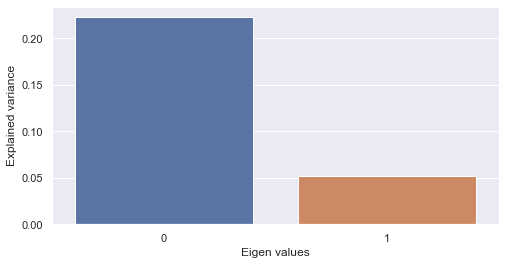

PCA on single-modal explained variance ratio: 0.27511152260578464


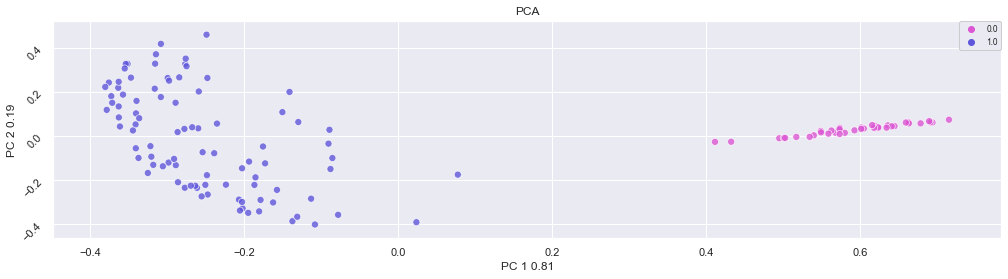

2 clusters -  silhoutte score: 0.23748262101337125 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.09127095657825068 - mutual information: 0.06580381661856816
4 clusters -  silhoutte score: 0.09107079209294414 - mutual information: 0.07300965561639147


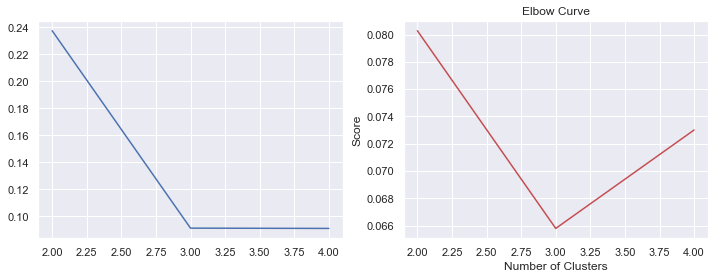

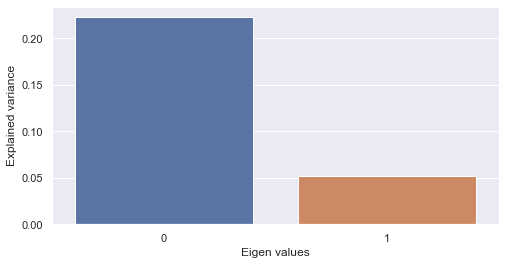

PCA on single-modal explained variance ratio: 0.27511152260578464


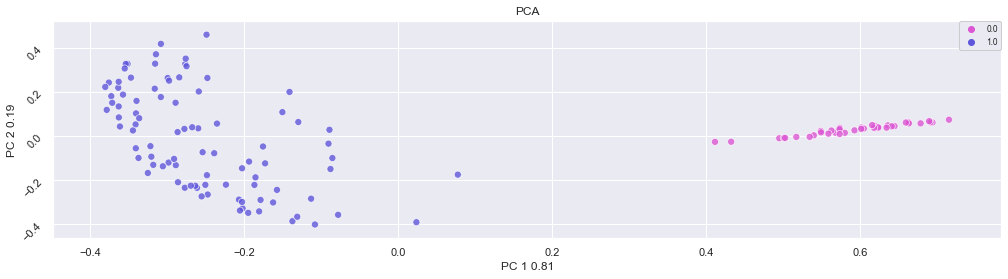

2 clusters -  silhoutte score: 0.23748262101337125 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.09310567120387611 - mutual information: 0.06291340822037277
4 clusters -  silhoutte score: 0.08777552238865456 - mutual information: 0.05823427767281974


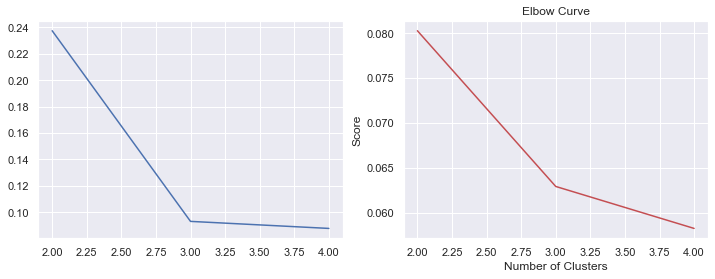

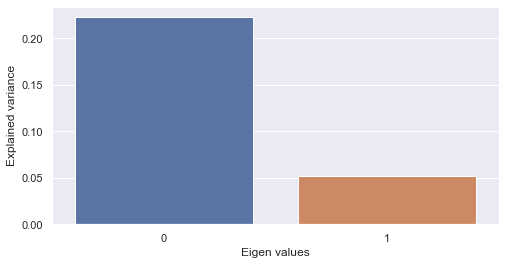

PCA on single-modal explained variance ratio: 0.27511152260578464


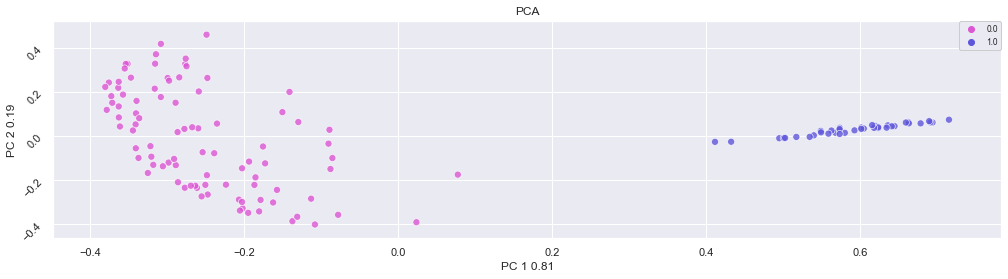

2 clusters -  silhoutte score: 0.23748262101337125 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.09694484701135075 - mutual information: 0.06275777127859498
4 clusters -  silhoutte score: 0.07297116271411426 - mutual information: 0.07032729471490841


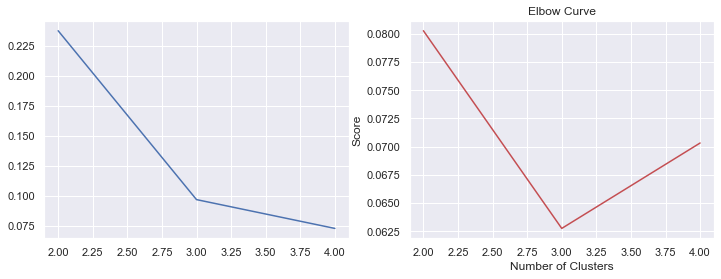

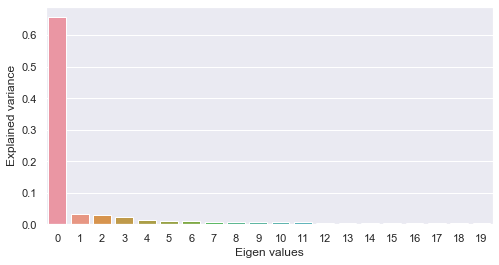

0.7652824134765683


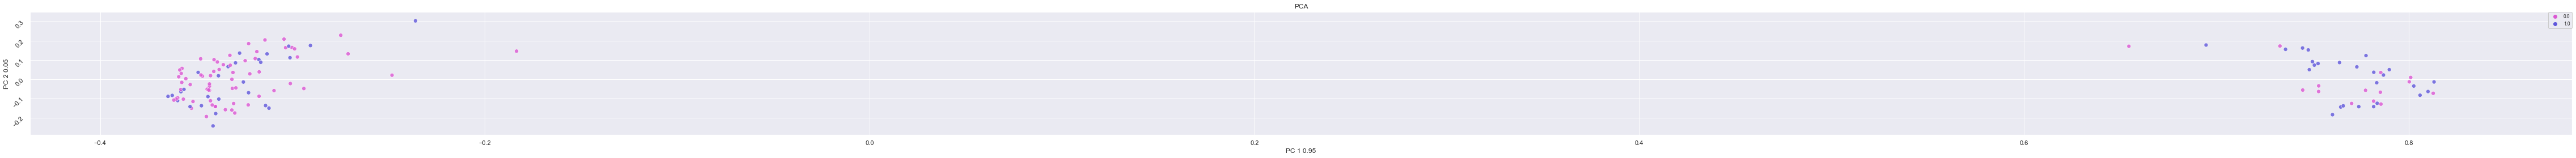

Results for KPCA: 

Best score for training data: 0.6 

Best C: 0.08 



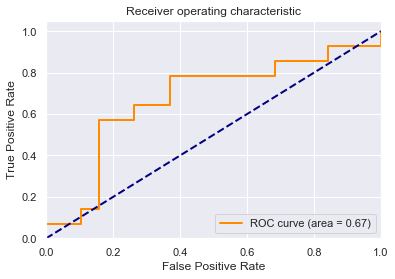

[[19  0]
 [14  0]]


              precision    recall  f1-score   support

           0       0.58      1.00      0.73        19
           1       0.00      0.00      0.00        14

    accuracy                           0.58        33
   macro avg       0.29      0.50      0.37        33
weighted avg       0.33      0.58      0.42        33

Training set score for Logistic Regression: 0.607692
Testing  set score for Logistic Regression: 0.575758
Best score for training data:

C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 0.6846153846153846 

Best C: 1.0 

Best Gamma: 0.1 



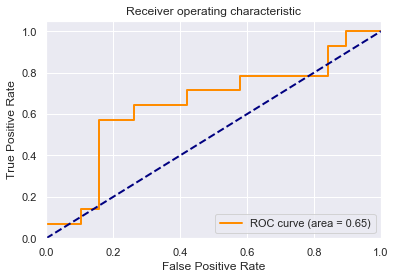

[[16  3]
 [ 6  8]]


              precision    recall  f1-score   support

           0       0.73      0.84      0.78        19
           1       0.73      0.57      0.64        14

    accuracy                           0.73        33
   macro avg       0.73      0.71      0.71        33
weighted avg       0.73      0.73      0.72        33

Training set score for SVM: 0.684615
Testing  set score for SVM: 0.727273
Best score for training data: 0.7076923076923076 

Best #estimators: 100 

Best max depth: 12 



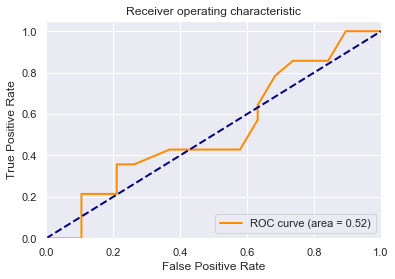

[[18  1]
 [14  0]]


              precision    recall  f1-score   support

           0       0.56      0.95      0.71        19
           1       0.00      0.00      0.00        14

    accuracy                           0.55        33
   macro avg       0.28      0.47      0.35        33
weighted avg       0.32      0.55      0.41        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.545455


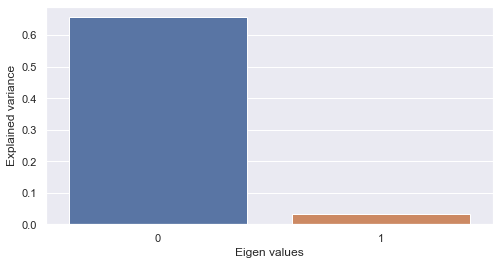

PCA on single-modal explained variance ratio: 0.6894628185239272


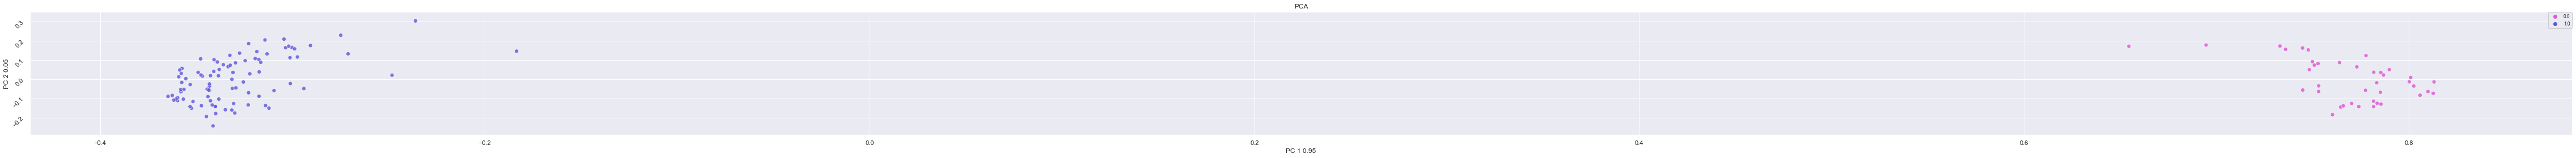

2 clusters -  silhoutte score: 0.5853601935389194 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.22042054200263347 - mutual information: 0.060752807149287144
4 clusters -  silhoutte score: 0.10122061822295025 - mutual information: 0.06381741262051


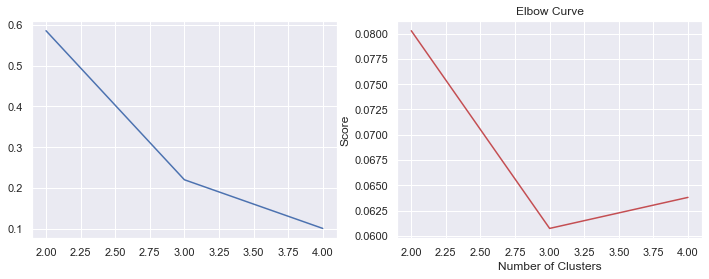

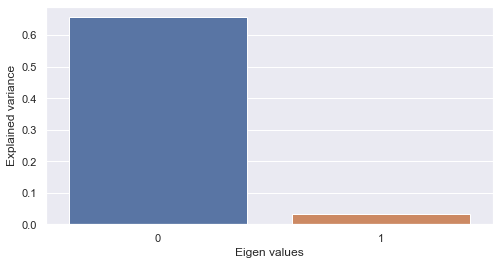

PCA on single-modal explained variance ratio: 0.6894628185239272


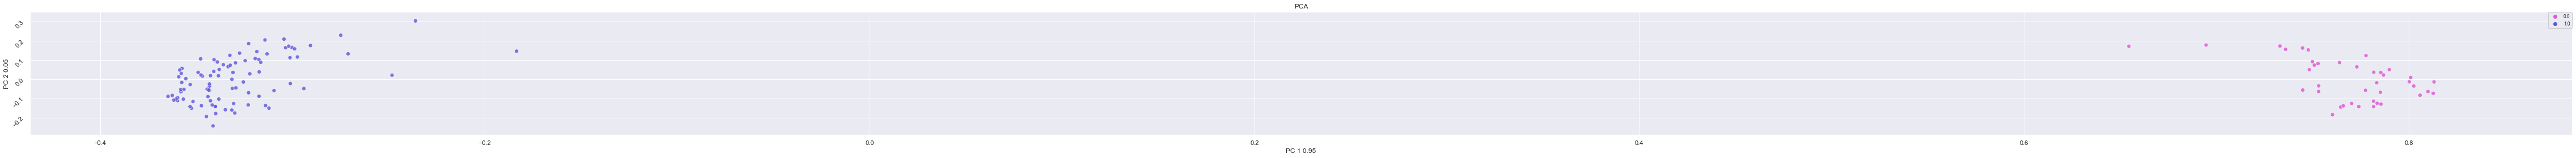

2 clusters -  silhoutte score: 0.5853601935389194 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.4693395727413092 - mutual information: 0.08784956606686607
4 clusters -  silhoutte score: 0.10667970143874539 - mutual information: 0.06698080517209647


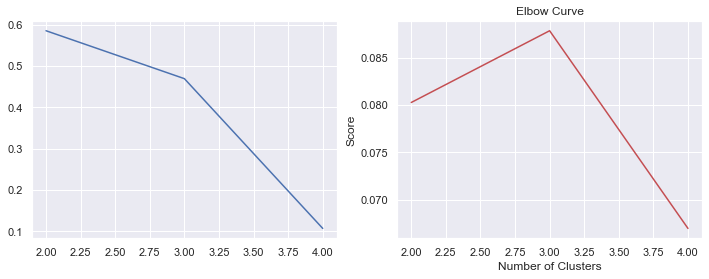

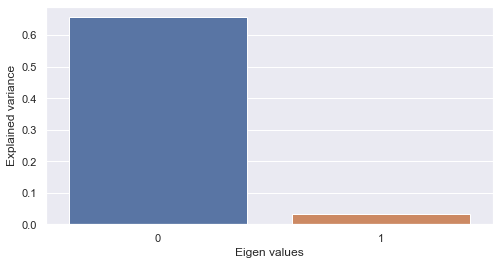

PCA on single-modal explained variance ratio: 0.6894628185239272


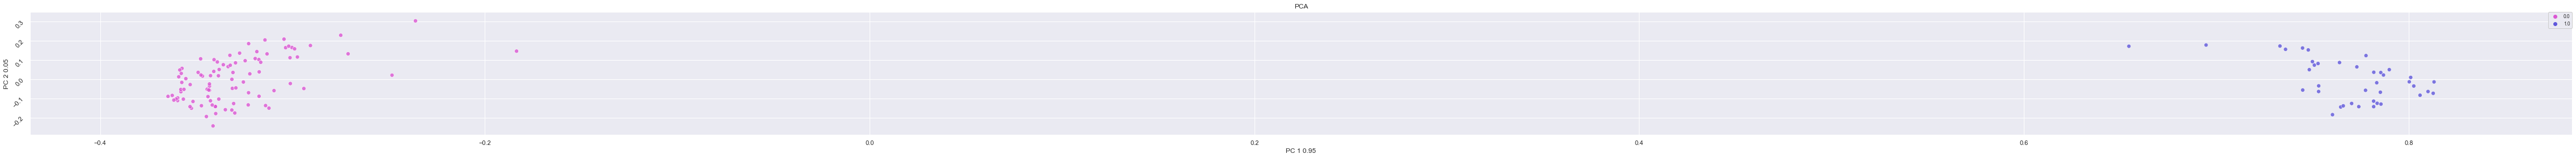

2 clusters -  silhoutte score: 0.5853601935389194 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.21774261930286154 - mutual information: 0.07273871722247278
4 clusters -  silhoutte score: 0.09625069085672373 - mutual information: 0.06842180036907354


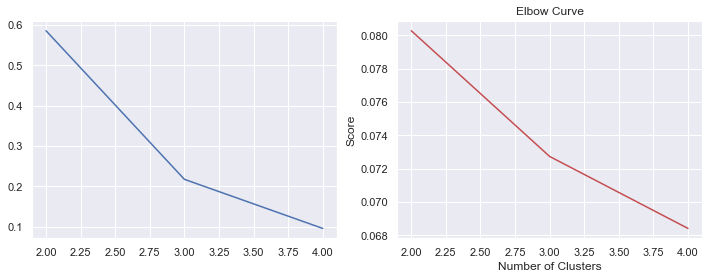

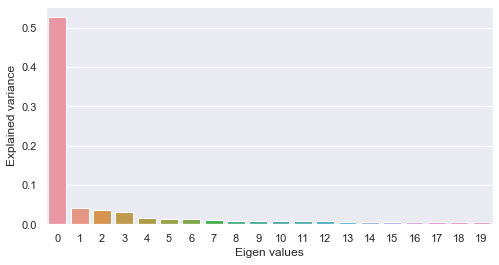

0.6665003824696019


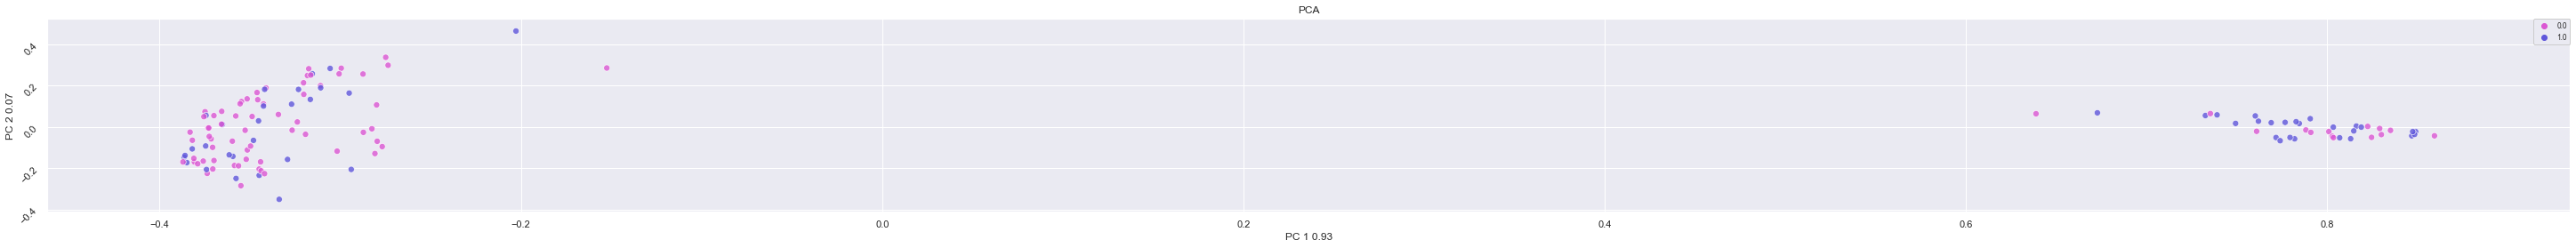

Results for KPCA: 

Best score for training data: 0.6 

Best C: 0.08 



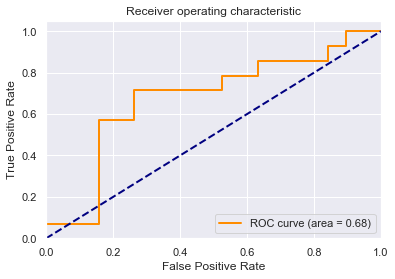

[[19  0]
 [13  1]]


              precision    recall  f1-score   support

           0       0.59      1.00      0.75        19
           1       1.00      0.07      0.13        14

    accuracy                           0.61        33
   macro avg       0.80      0.54      0.44        33
weighted avg       0.77      0.61      0.49        33

Training set score for Logistic Regression: 0.684615
Testing  set score for Logistic Regression: 0.606061
Best score for training data: 0.6846153846153846 

Best C: 1.0 

Best Gamma: 0.1 



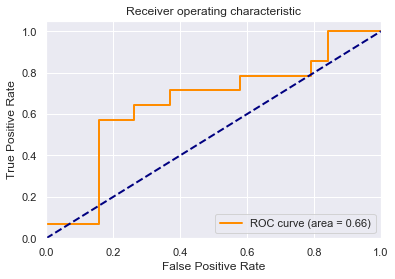

[[16  3]
 [ 6  8]]


              precision    recall  f1-score   support

           0       0.73      0.84      0.78        19
           1       0.73      0.57      0.64        14

    accuracy                           0.73        33
   macro avg       0.73      0.71      0.71        33
weighted avg       0.73      0.73      0.72        33

Training set score for SVM: 0.684615
Testing  set score for SVM: 0.727273
Best score for training data: 0.7 

Best #estimators: 140 

Best max depth: None 



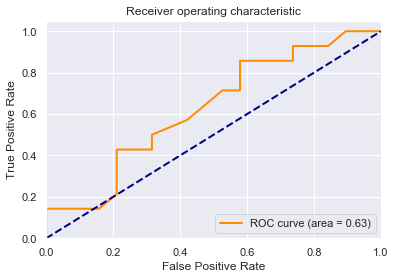

[[18  1]
 [12  2]]


              precision    recall  f1-score   support

           0       0.60      0.95      0.73        19
           1       0.67      0.14      0.24        14

    accuracy                           0.61        33
   macro avg       0.63      0.55      0.48        33
weighted avg       0.63      0.61      0.52        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.606061


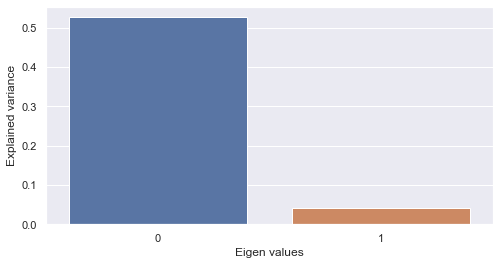

PCA on single-modal explained variance ratio: 0.5682299596054823


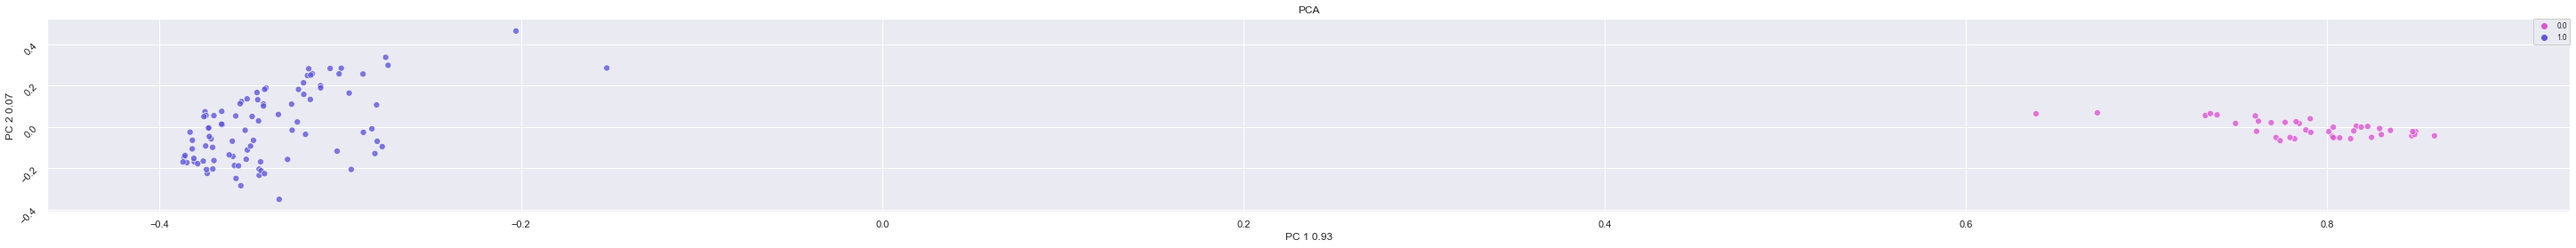

2 clusters -  silhoutte score: 0.48898578554649735 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.18632011935768317 - mutual information: 0.060752807149287144
4 clusters -  silhoutte score: 0.10272329184250777 - mutual information: 0.07226559238443477


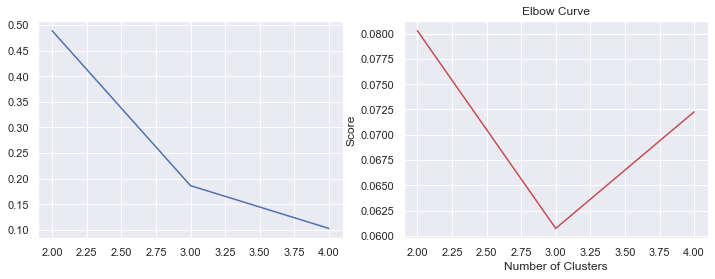

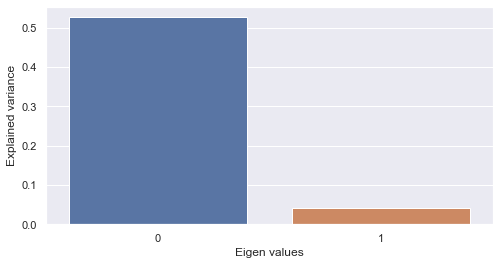

PCA on single-modal explained variance ratio: 0.5682299596054823


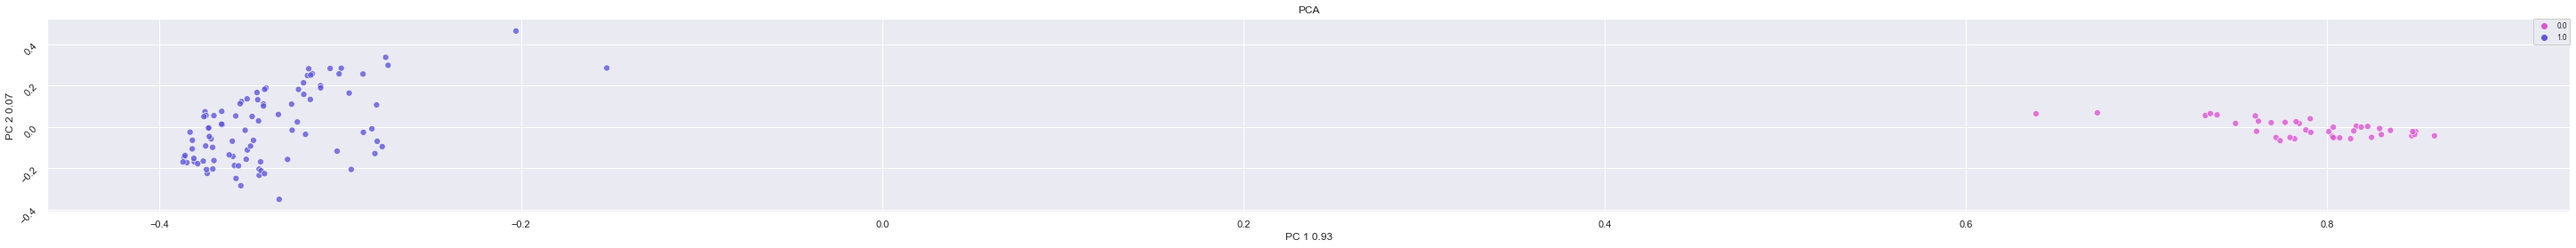

2 clusters -  silhoutte score: 0.48898578554649735 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.18557749640652504 - mutual information: 0.060752807149287144
4 clusters -  silhoutte score: 0.0993029606539298 - mutual information: 0.07233219860991526


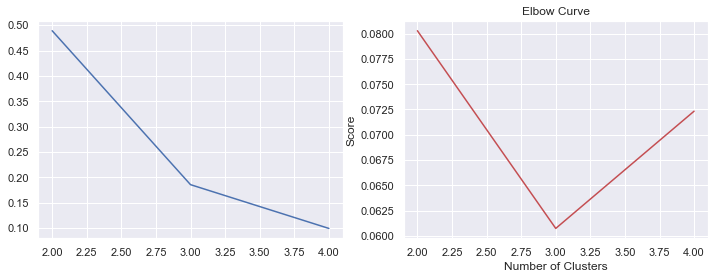

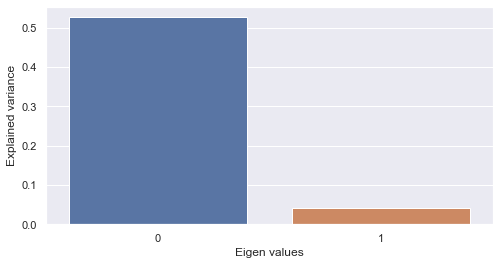

PCA on single-modal explained variance ratio: 0.5682299596054823


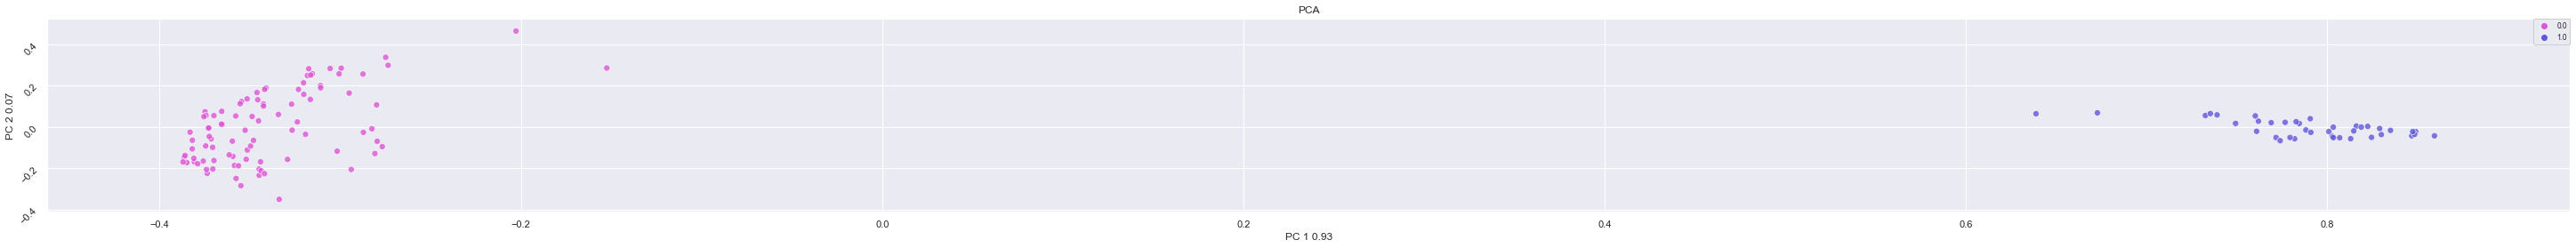

2 clusters -  silhoutte score: 0.48898578554649735 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.16617281423809555 - mutual information: 0.0628050358854533
4 clusters -  silhoutte score: 0.0752713077502187 - mutual information: 0.059345504879327014


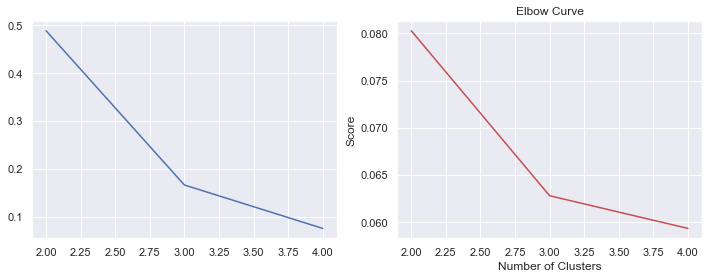

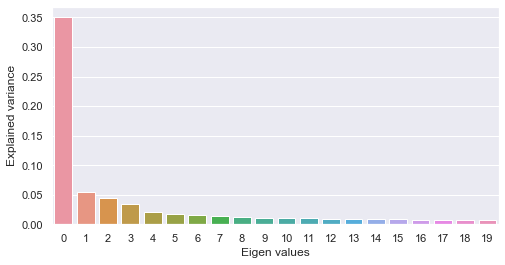

0.521351084992961


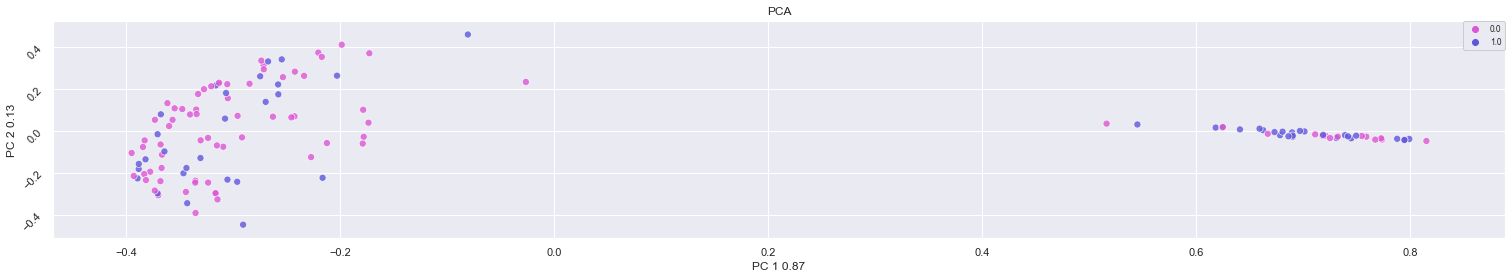

Results for KPCA: 

Best score for training data: 0.6 

Best C: 0.08 



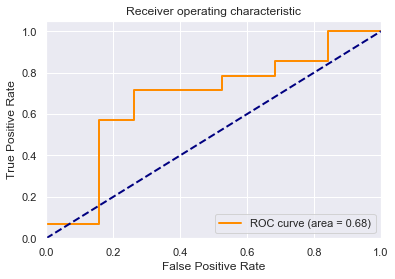

[[19  0]
 [14  0]]


              precision    recall  f1-score   support

           0       0.58      1.00      0.73        19
           1       0.00      0.00      0.00        14

    accuracy                           0.58        33
   macro avg       0.29      0.50      0.37        33
weighted avg       0.33      0.58      0.42        33

Training set score for Logistic Regression: 0.600000
Testing  set score for Logistic Regression: 0.575758
Best score for training data: 0.676923076923077 

Best C: 1.0 

Best Gamma: 0.1 



C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


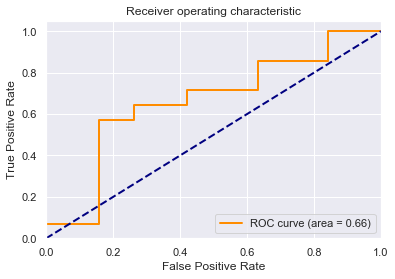

[[16  3]
 [ 6  8]]


              precision    recall  f1-score   support

           0       0.73      0.84      0.78        19
           1       0.73      0.57      0.64        14

    accuracy                           0.73        33
   macro avg       0.73      0.71      0.71        33
weighted avg       0.73      0.73      0.72        33

Training set score for SVM: 0.684615
Testing  set score for SVM: 0.727273
Best score for training data: 0.676923076923077 

Best #estimators: 100 

Best max depth: 12 



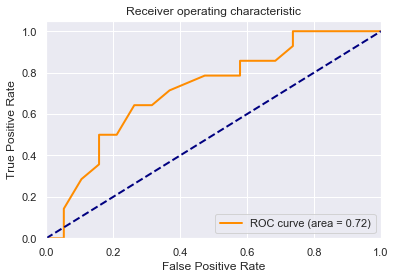

[[17  2]
 [10  4]]


              precision    recall  f1-score   support

           0       0.63      0.89      0.74        19
           1       0.67      0.29      0.40        14

    accuracy                           0.64        33
   macro avg       0.65      0.59      0.57        33
weighted avg       0.65      0.64      0.60        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.636364


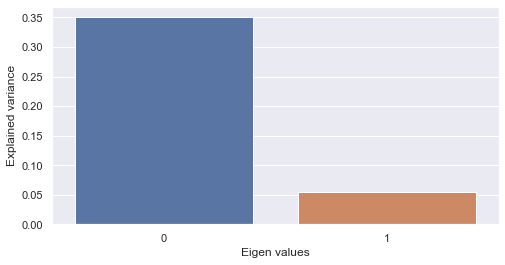

PCA on single-modal explained variance ratio: 0.40429804305319184


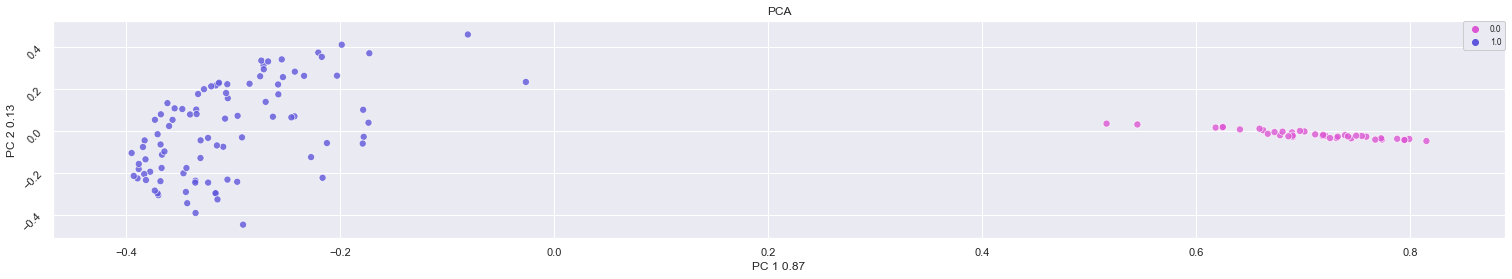

2 clusters -  silhoutte score: 0.3521966477279148 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.13842464317241585 - mutual information: 0.06174399694017896
4 clusters -  silhoutte score: 0.09732202635096078 - mutual information: 0.06774663611596697


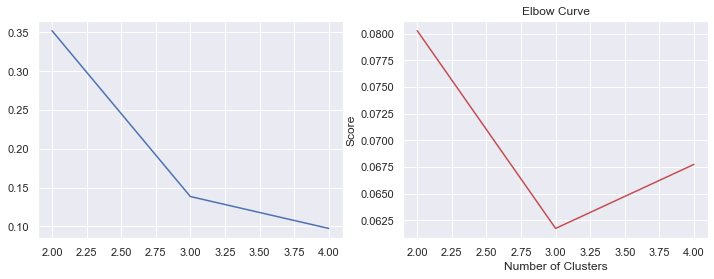

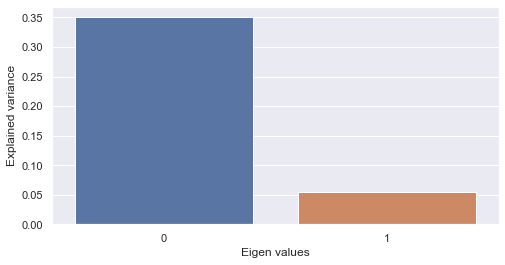

PCA on single-modal explained variance ratio: 0.40429804305319184


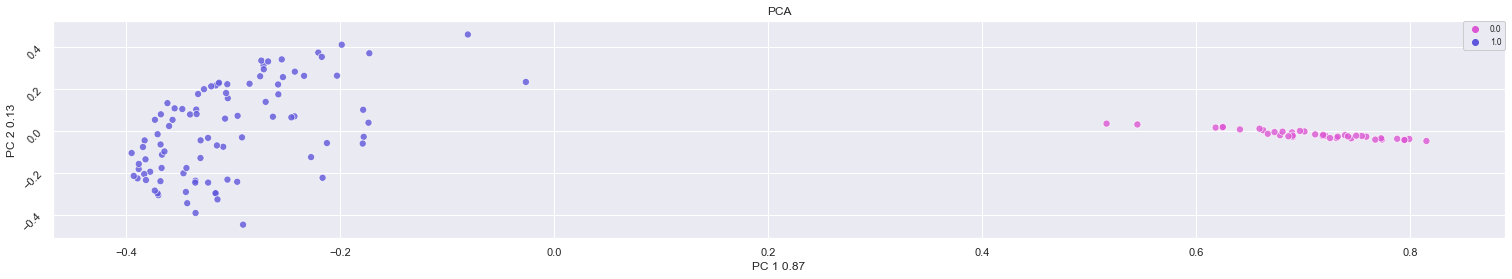

2 clusters -  silhoutte score: 0.3521966477279148 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.13842464317241585 - mutual information: 0.06174399694017896
4 clusters -  silhoutte score: 0.1363320057259598 - mutual information: 0.061777783288019326


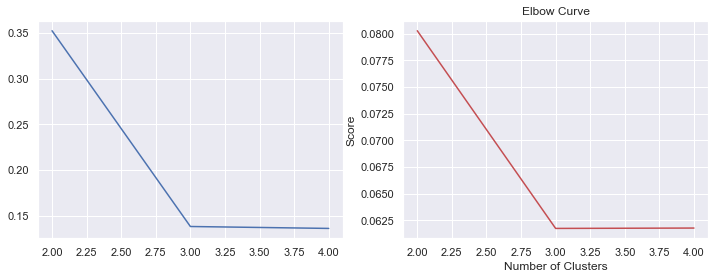

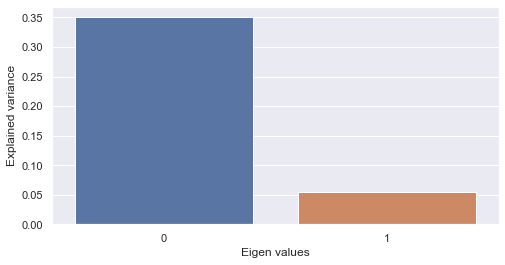

PCA on single-modal explained variance ratio: 0.40429804305319184


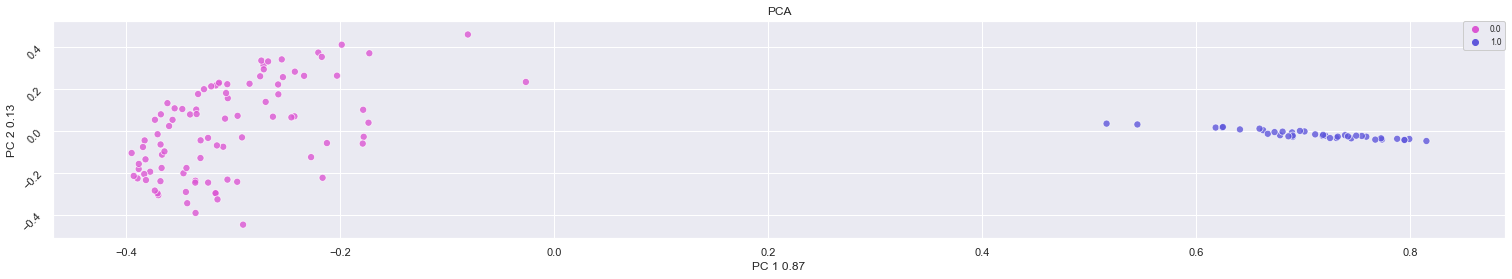

2 clusters -  silhoutte score: 0.3521966477279148 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.13881416428546306 - mutual information: 0.06535672789028031
4 clusters -  silhoutte score: 0.08795788912708534 - mutual information: 0.06172565597205326


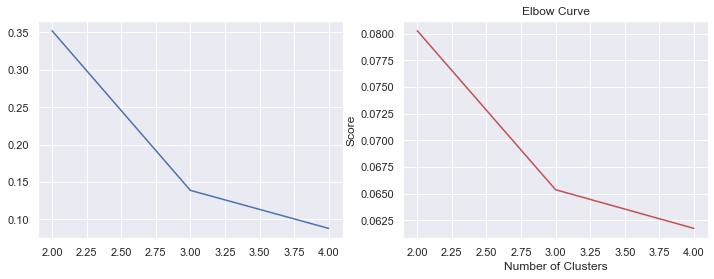

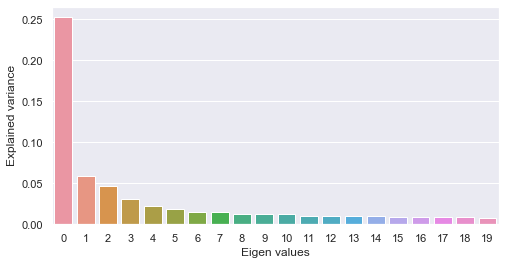

0.4299280067065908


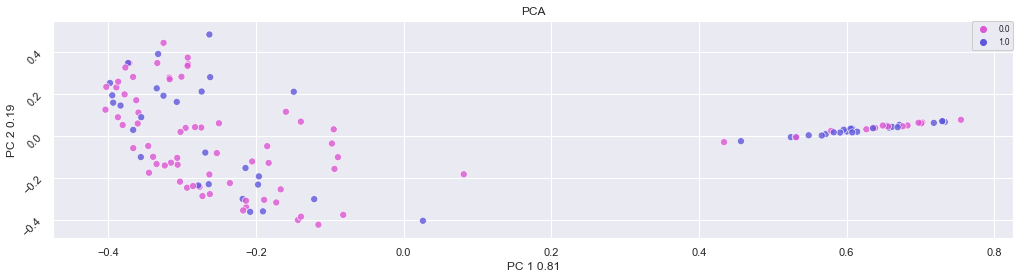

Results for KPCA: 

Best score for training data: 0.6 

Best C: 0.08 



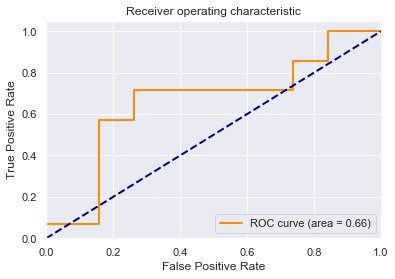

[[19  0]
 [14  0]]


              precision    recall  f1-score   support

           0       0.58      1.00      0.73        19
           1       0.00      0.00      0.00        14

    accuracy                           0.58        33
   macro avg       0.29      0.50      0.37        33
weighted avg       0.33      0.58      0.42        33

Training set score for Logistic Regression: 0.600000
Testing  set score for Logistic Regression: 0.575758
Best score for training data: 0.6384615384615384 

Best C: 1.0 

Best Gamma: 0.1 



C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


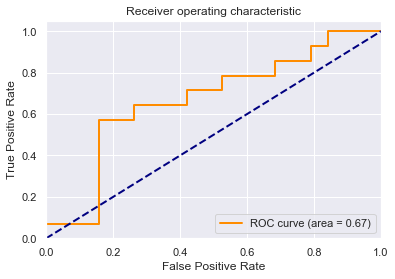

[[16  3]
 [ 7  7]]


              precision    recall  f1-score   support

           0       0.70      0.84      0.76        19
           1       0.70      0.50      0.58        14

    accuracy                           0.70        33
   macro avg       0.70      0.67      0.67        33
weighted avg       0.70      0.70      0.69        33

Training set score for SVM: 0.730769
Testing  set score for SVM: 0.696970
Best score for training data: 0.6923076923076923 

Best #estimators: 140 

Best max depth: None 



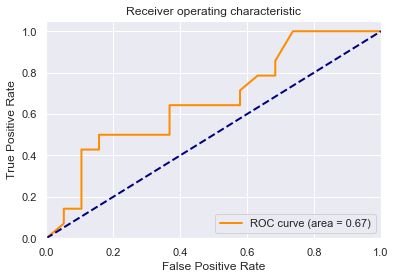

[[17  2]
 [ 9  5]]


              precision    recall  f1-score   support

           0       0.65      0.89      0.76        19
           1       0.71      0.36      0.48        14

    accuracy                           0.67        33
   macro avg       0.68      0.63      0.62        33
weighted avg       0.68      0.67      0.64        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.666667


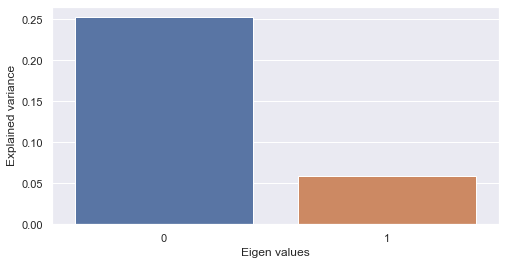

PCA on single-modal explained variance ratio: 0.3112785433913701


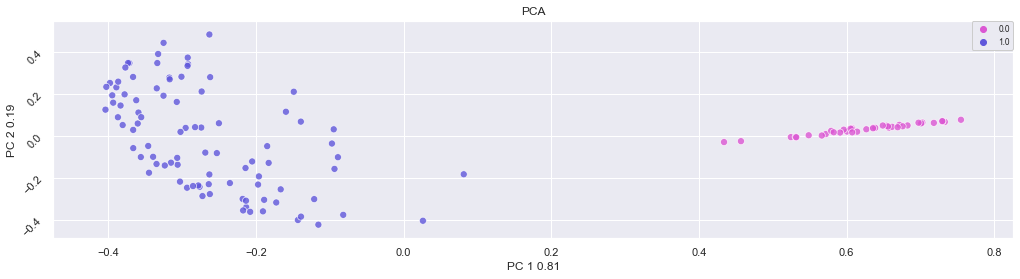

2 clusters -  silhoutte score: 0.2670307835442415 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.11026590137144673 - mutual information: 0.06174399694017896
4 clusters -  silhoutte score: 0.10772282780819817 - mutual information: 0.07300965561639147


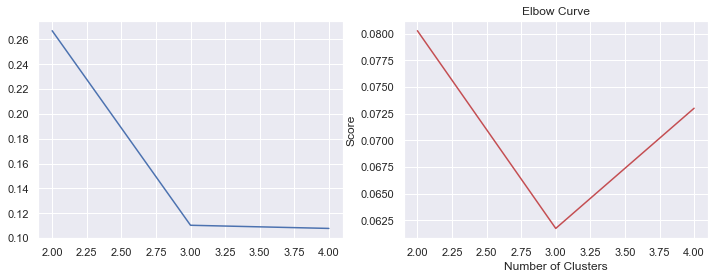

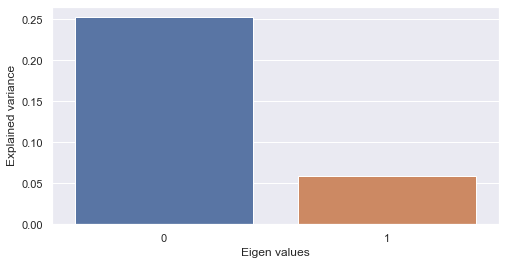

PCA on single-modal explained variance ratio: 0.3112785433913701


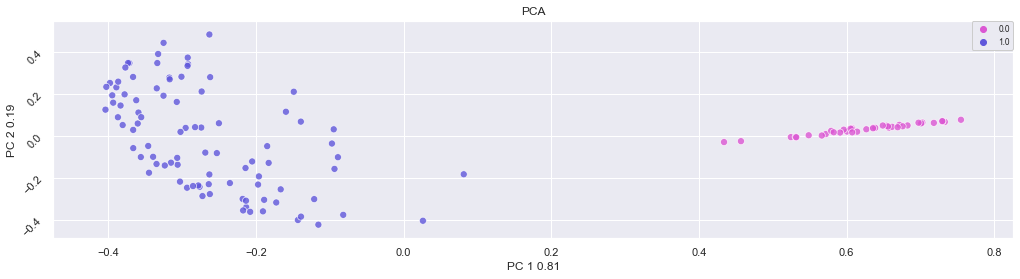

2 clusters -  silhoutte score: 0.2670307835442415 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.10950148648810049 - mutual information: 0.06291340822037277
4 clusters -  silhoutte score: 0.10330245632632568 - mutual information: 0.05823427767281974


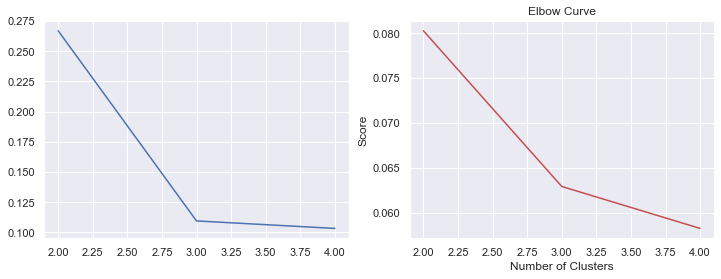

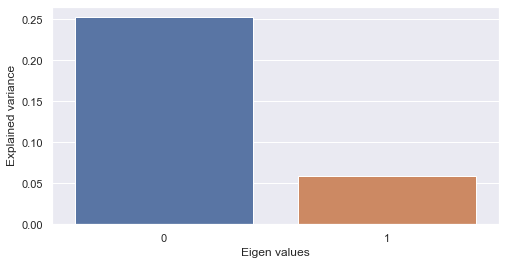

PCA on single-modal explained variance ratio: 0.3112785433913701


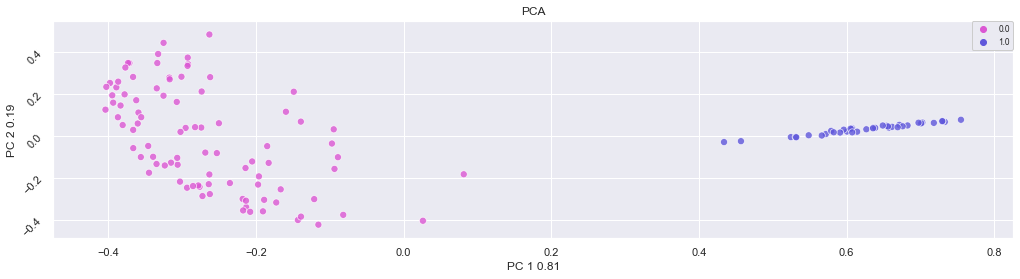

2 clusters -  silhoutte score: 0.2670307835442415 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.09873304681816657 - mutual information: 0.06391089692777463
4 clusters -  silhoutte score: 0.07302469718044044 - mutual information: 0.07927130966241906


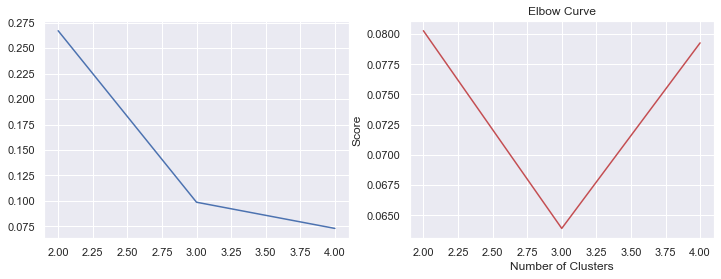

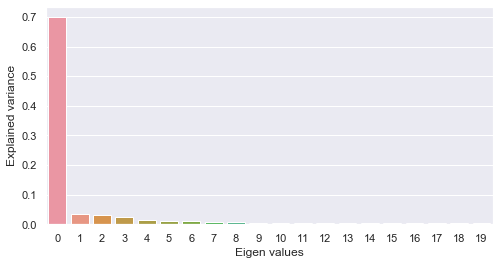

0.811870422912317


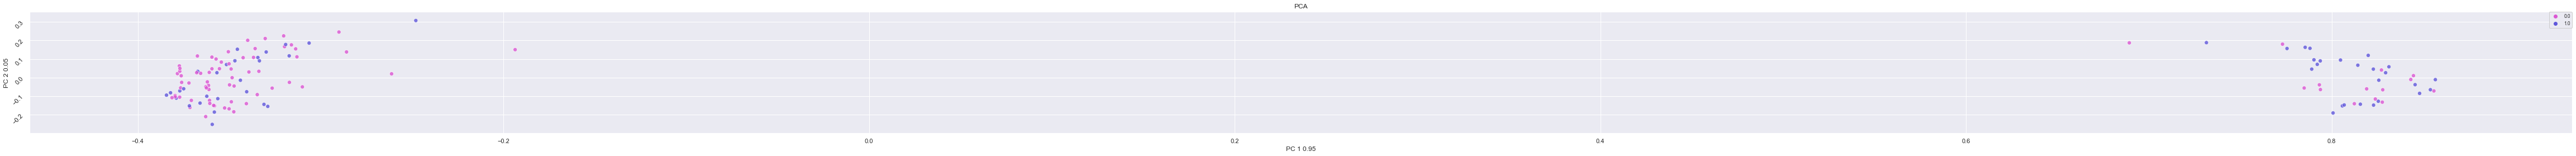

Results for KPCA: 

Best score for training data: 0.6076923076923076 

Best C: 0.08 



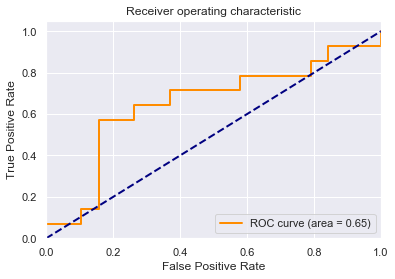

[[16  3]
 [12  2]]


              precision    recall  f1-score   support

           0       0.57      0.84      0.68        19
           1       0.40      0.14      0.21        14

    accuracy                           0.55        33
   macro avg       0.49      0.49      0.45        33
weighted avg       0.50      0.55      0.48        33

Training set score for Logistic Regression: 0.715385
Testing  set score for Logistic Regression: 0.545455
Best score for training data: 0.6846153846153846 

Best C: 1.0 

Best Gamma: 0.1 



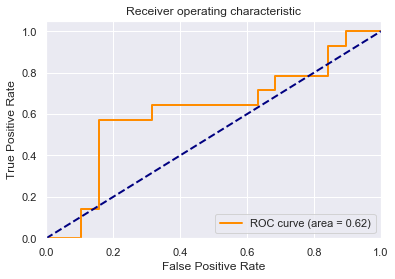

[[16  3]
 [ 6  8]]


              precision    recall  f1-score   support

           0       0.73      0.84      0.78        19
           1       0.73      0.57      0.64        14

    accuracy                           0.73        33
   macro avg       0.73      0.71      0.71        33
weighted avg       0.73      0.73      0.72        33

Training set score for SVM: 0.684615
Testing  set score for SVM: 0.727273
Best score for training data: 0.6692307692307692 

Best #estimators: 100 

Best max depth: 12 



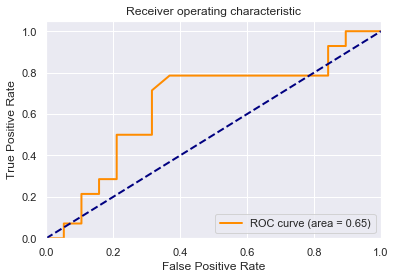

[[15  4]
 [ 8  6]]


              precision    recall  f1-score   support

           0       0.65      0.79      0.71        19
           1       0.60      0.43      0.50        14

    accuracy                           0.64        33
   macro avg       0.63      0.61      0.61        33
weighted avg       0.63      0.64      0.62        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.636364


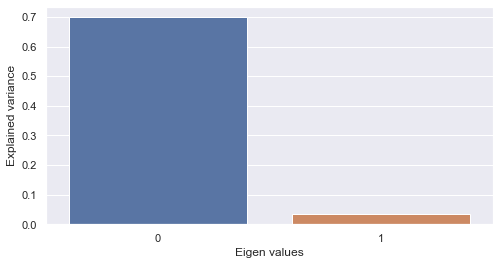

PCA on single-modal explained variance ratio: 0.7331958264721788


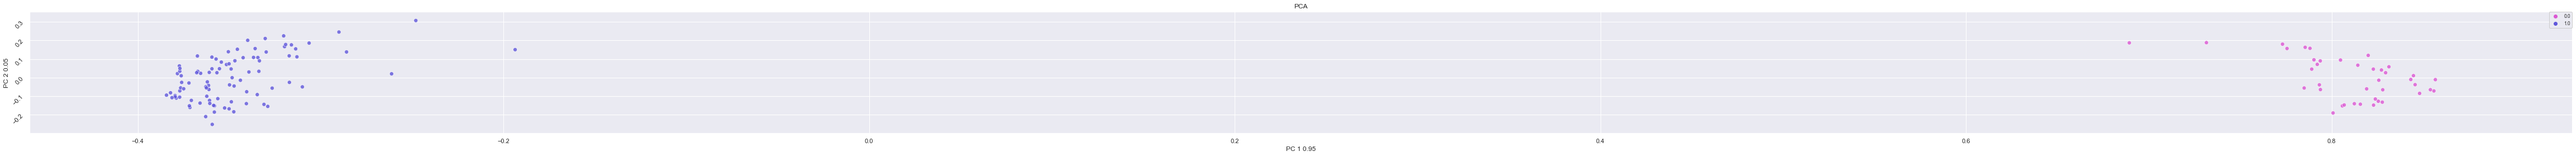

2 clusters -  silhoutte score: 0.6218693776254567 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.2520666671709896 - mutual information: 0.05844450733912297
4 clusters -  silhoutte score: 0.13443261327661316 - mutual information: 0.07226559238443477


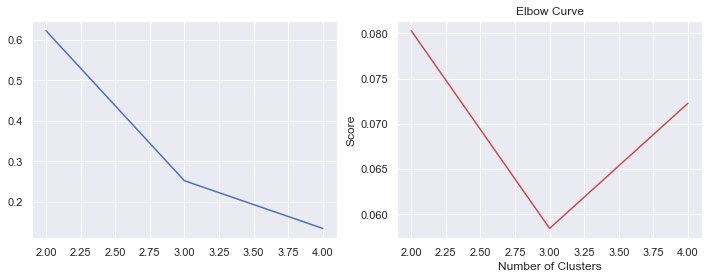

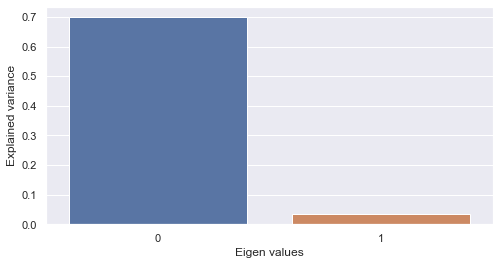

PCA on single-modal explained variance ratio: 0.7331958264721788


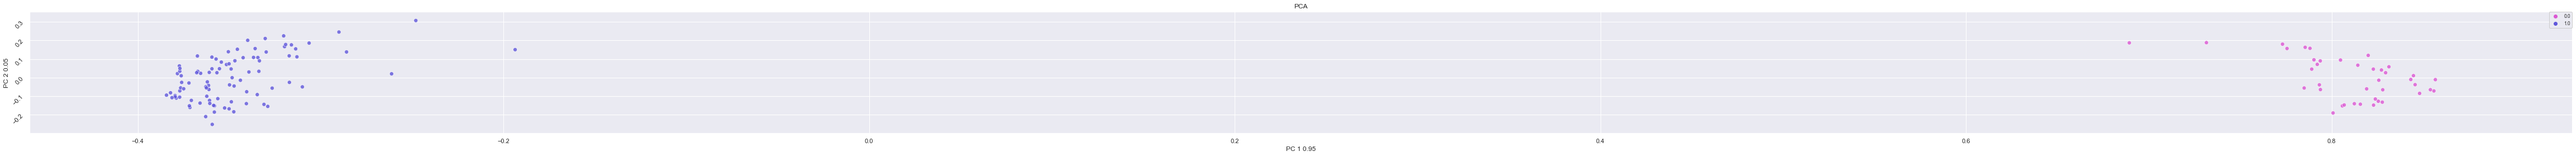

2 clusters -  silhoutte score: 0.6218693776254567 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.5029213392757468 - mutual information: 0.08784956606686607
4 clusters -  silhoutte score: 0.1338329974005813 - mutual information: 0.06698080517209647


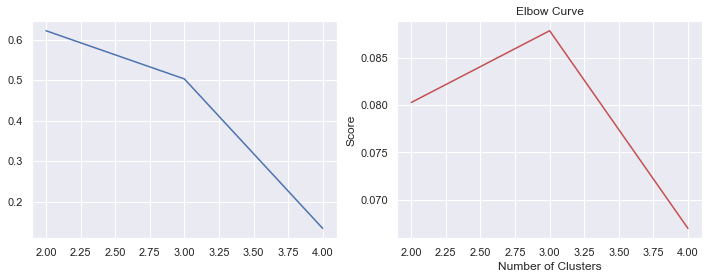

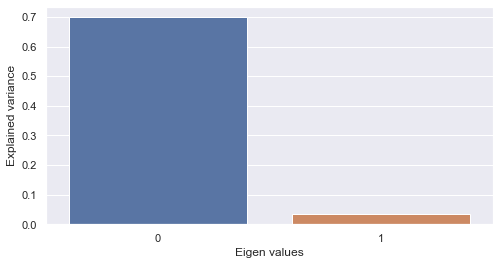

PCA on single-modal explained variance ratio: 0.7331958264721788


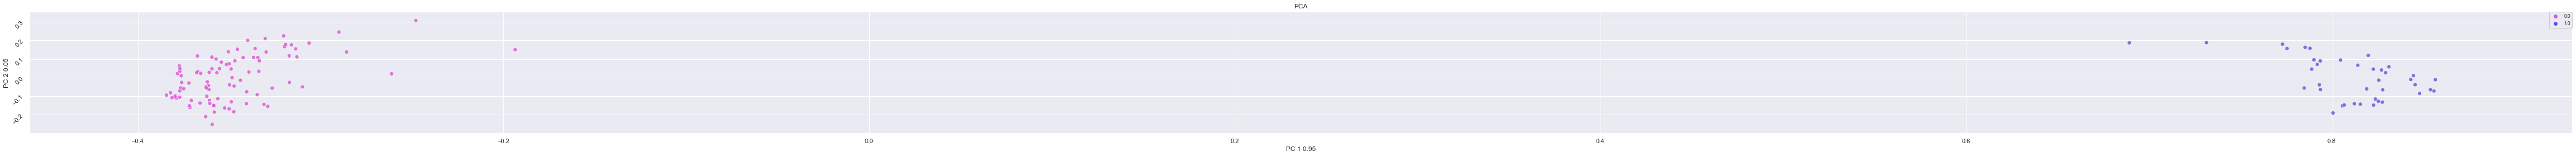

2 clusters -  silhoutte score: 0.6218693776254567 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.2373376312466457 - mutual information: 0.06555245117295233
4 clusters -  silhoutte score: 0.11207322387113107 - mutual information: 0.06015881107577774


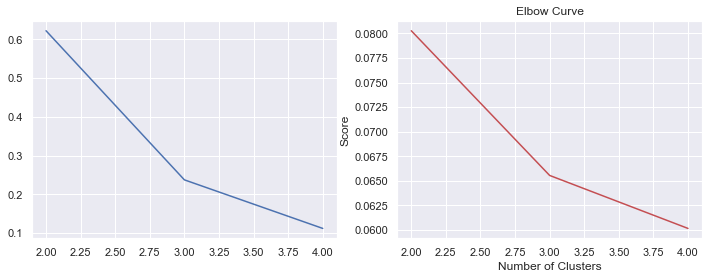

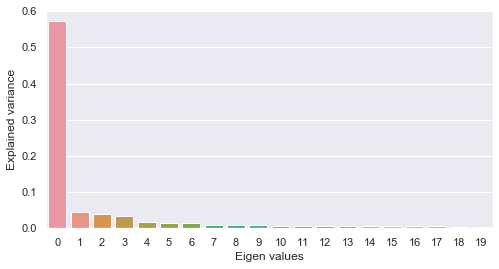

0.7207851536448326


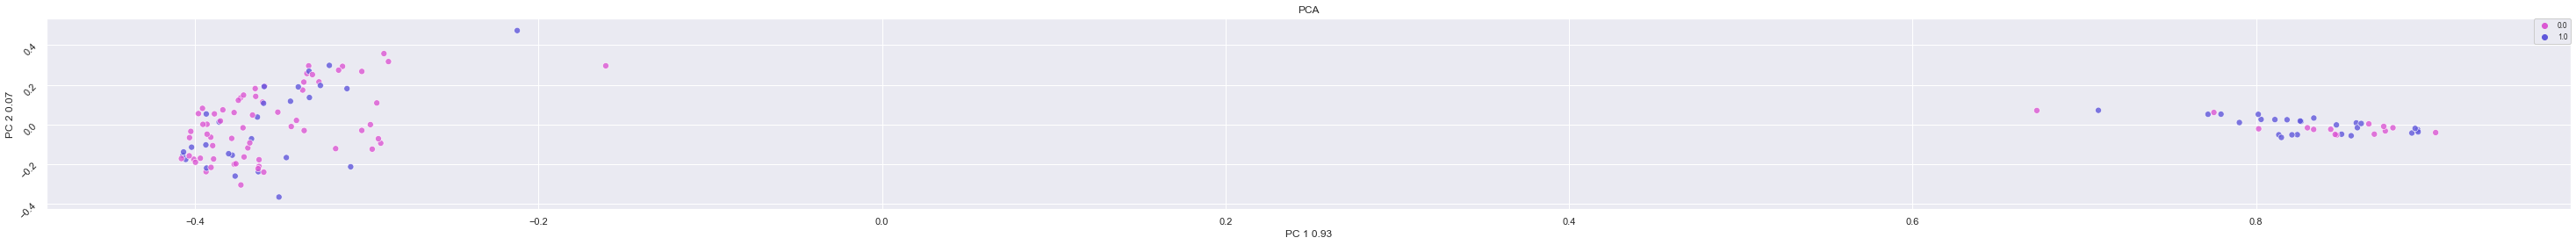

Results for KPCA: 

Best score for training data: 0.5846153846153845 

Best C: 0.08 



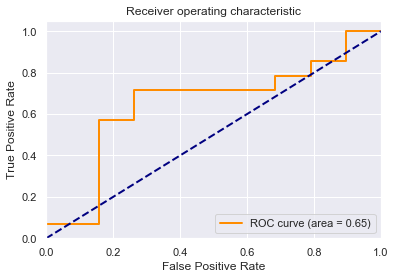

[[16  3]
 [12  2]]


              precision    recall  f1-score   support

           0       0.57      0.84      0.68        19
           1       0.40      0.14      0.21        14

    accuracy                           0.55        33
   macro avg       0.49      0.49      0.45        33
weighted avg       0.50      0.55      0.48        33

Training set score for Logistic Regression: 0.738462
Testing  set score for Logistic Regression: 0.545455
Best score for training data: 0.6846153846153846 

Best C: 1.0 

Best Gamma: 0.1 



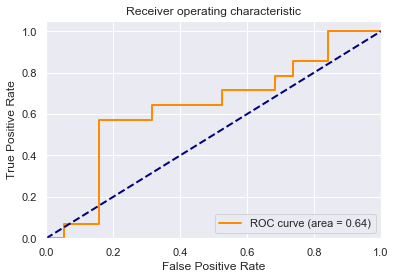

[[16  3]
 [ 6  8]]


              precision    recall  f1-score   support

           0       0.73      0.84      0.78        19
           1       0.73      0.57      0.64        14

    accuracy                           0.73        33
   macro avg       0.73      0.71      0.71        33
weighted avg       0.73      0.73      0.72        33

Training set score for SVM: 0.684615
Testing  set score for SVM: 0.727273
Best score for training data: 0.6538461538461537 

Best #estimators: 140 

Best max depth: None 



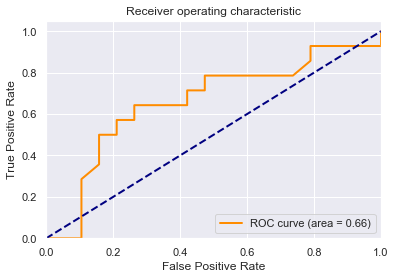

[[15  4]
 [ 7  7]]


              precision    recall  f1-score   support

           0       0.68      0.79      0.73        19
           1       0.64      0.50      0.56        14

    accuracy                           0.67        33
   macro avg       0.66      0.64      0.65        33
weighted avg       0.66      0.67      0.66        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.666667


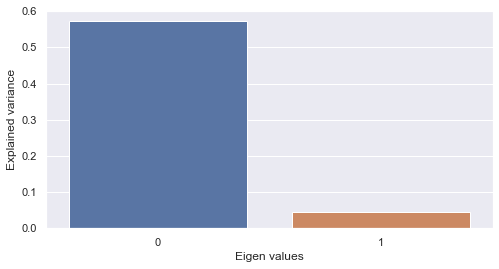

PCA on single-modal explained variance ratio: 0.6167044844347288


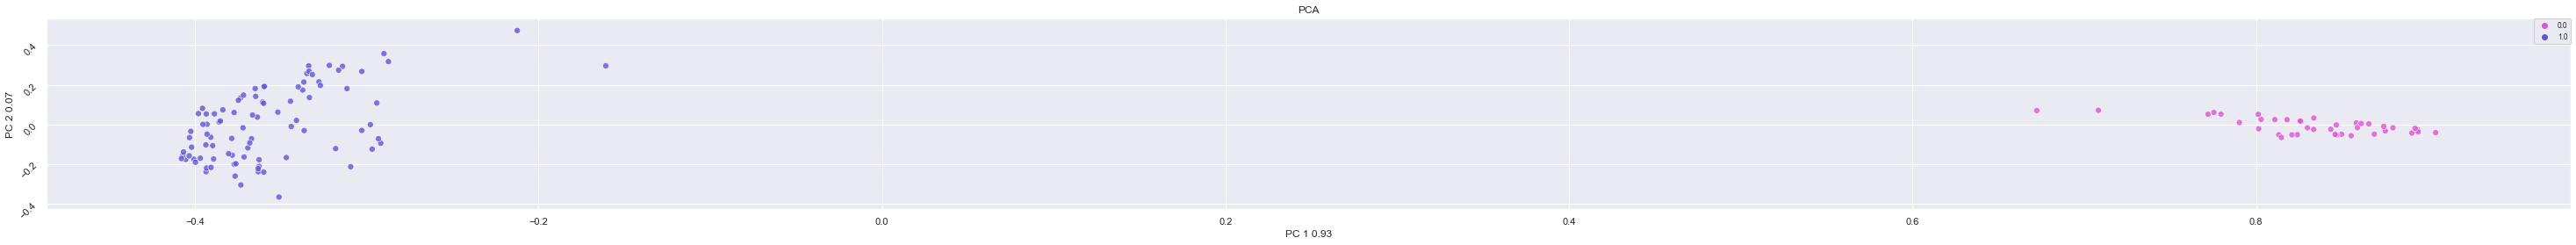

2 clusters -  silhoutte score: 0.5275826595314725 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.2146901798212434 - mutual information: 0.060752807149287144
4 clusters -  silhoutte score: 0.1274100657163077 - mutual information: 0.07226559238443477


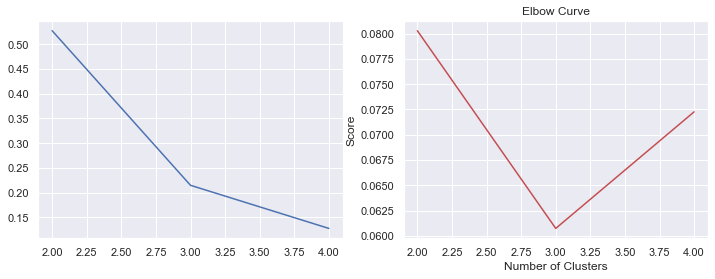

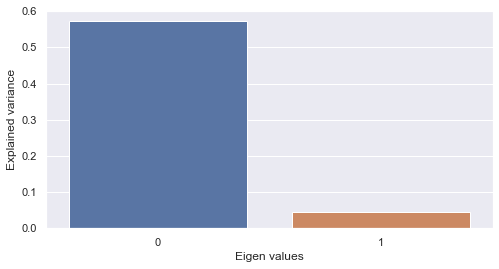

PCA on single-modal explained variance ratio: 0.6167044844347288


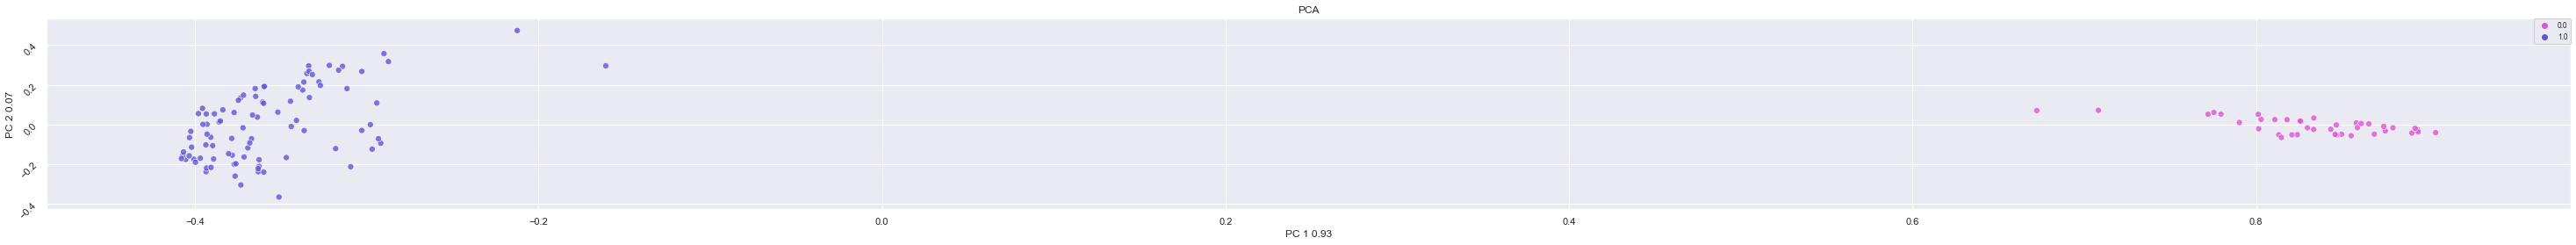

2 clusters -  silhoutte score: 0.5275826595314725 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.2139560121729191 - mutual information: 0.060752807149287144
4 clusters -  silhoutte score: 0.1239356147790049 - mutual information: 0.07233219860991527


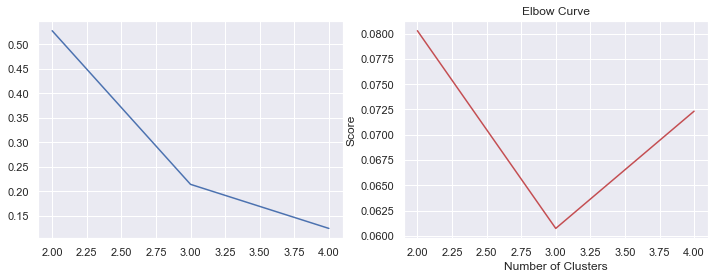

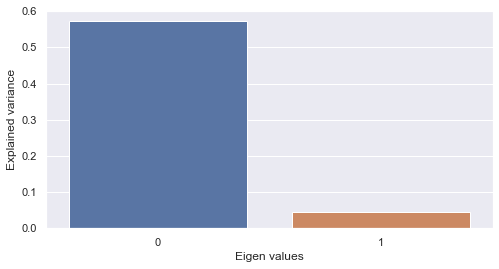

PCA on single-modal explained variance ratio: 0.6167044844347288


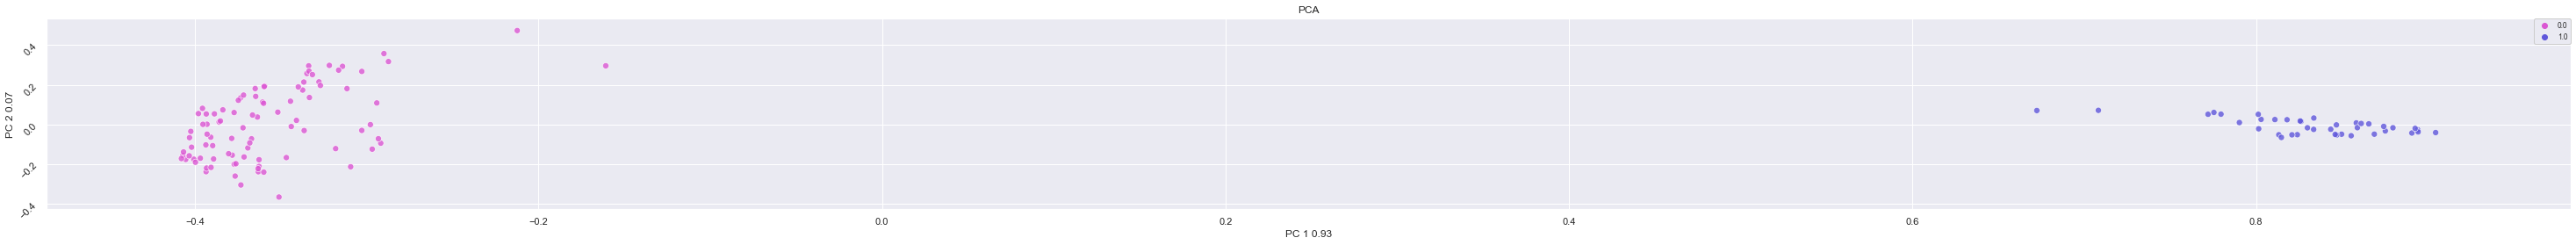

2 clusters -  silhoutte score: 0.5275826595314725 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.20173364564382903 - mutual information: 0.06555245117295233
4 clusters -  silhoutte score: 0.10698164336329709 - mutual information: 0.06188743712750047


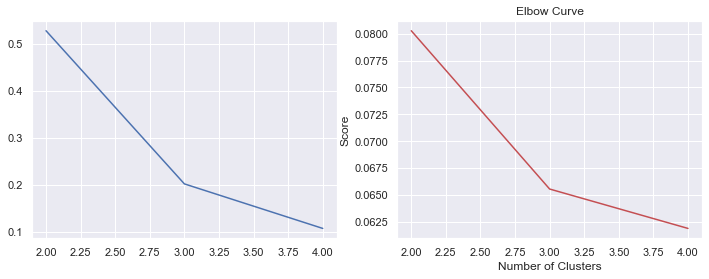

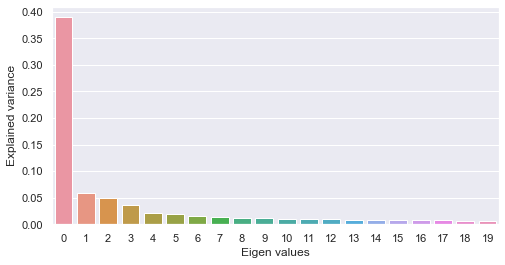

0.575886347662284


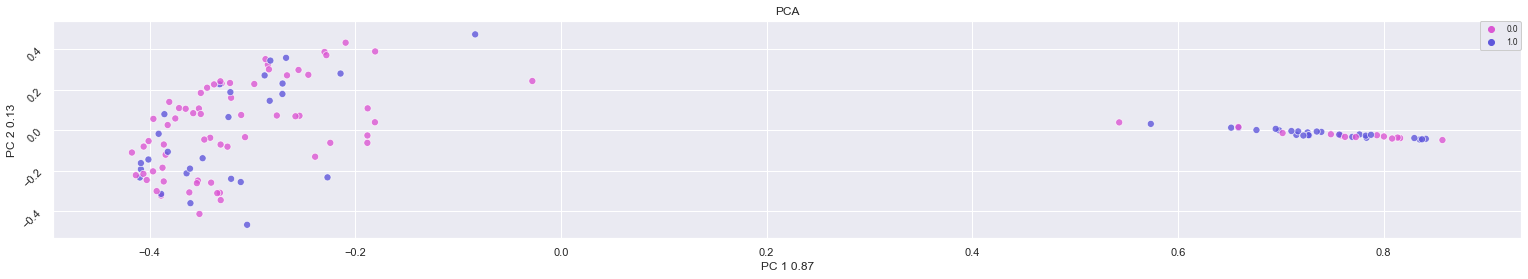

Results for KPCA: 

Best score for training data: 0.6 

Best C: 0.08 



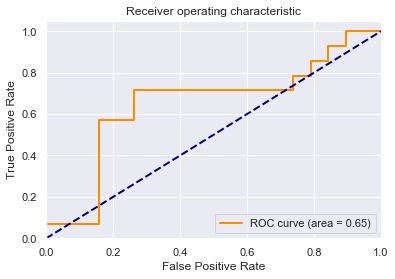

[[19  0]
 [14  0]]


              precision    recall  f1-score   support

           0       0.58      1.00      0.73        19
           1       0.00      0.00      0.00        14

    accuracy                           0.58        33
   macro avg       0.29      0.50      0.37        33
weighted avg       0.33      0.58      0.42        33

Training set score for Logistic Regression: 0.615385
Testing  set score for Logistic Regression: 0.575758
Best score for training data: 0.6692307692307693 

Best C: 1.0 

Best Gamma: 0.1 



C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


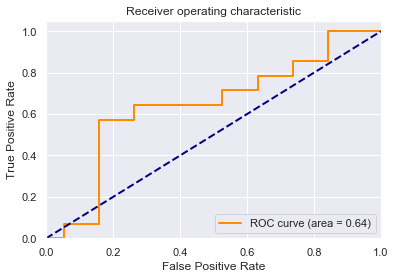

[[16  3]
 [ 6  8]]


              precision    recall  f1-score   support

           0       0.73      0.84      0.78        19
           1       0.73      0.57      0.64        14

    accuracy                           0.73        33
   macro avg       0.73      0.71      0.71        33
weighted avg       0.73      0.73      0.72        33

Training set score for SVM: 0.684615
Testing  set score for SVM: 0.727273
Best score for training data: 0.6692307692307693 

Best #estimators: 100 

Best max depth: 12 



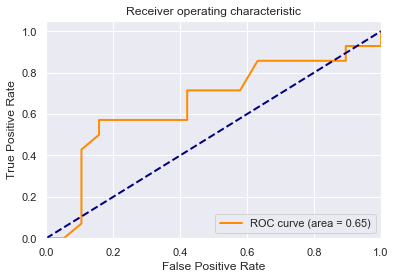

[[16  3]
 [ 6  8]]


              precision    recall  f1-score   support

           0       0.73      0.84      0.78        19
           1       0.73      0.57      0.64        14

    accuracy                           0.73        33
   macro avg       0.73      0.71      0.71        33
weighted avg       0.73      0.73      0.72        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.727273


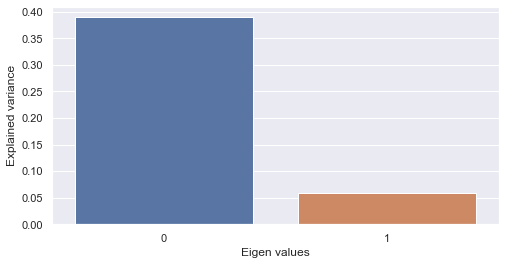

PCA on single-modal explained variance ratio: 0.4489508292561726


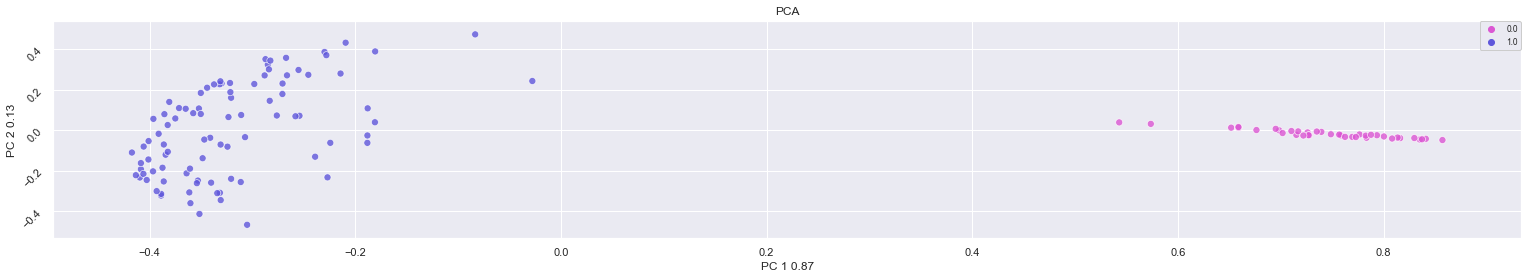

2 clusters -  silhoutte score: 0.38799479107469953 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.16261256290117043 - mutual information: 0.060752807149287144
4 clusters -  silhoutte score: 0.10895854066548573 - mutual information: 0.06537550027991668


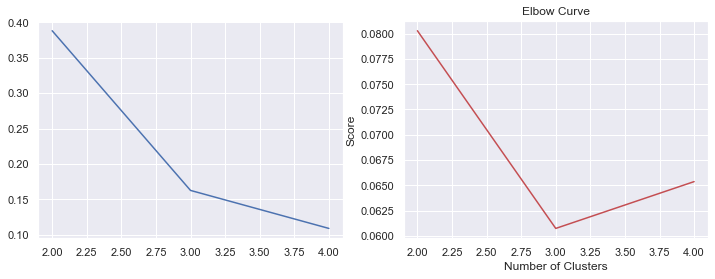

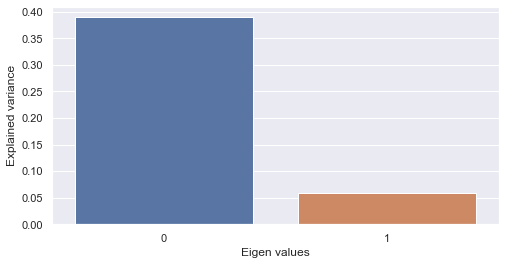

PCA on single-modal explained variance ratio: 0.4489508292561726


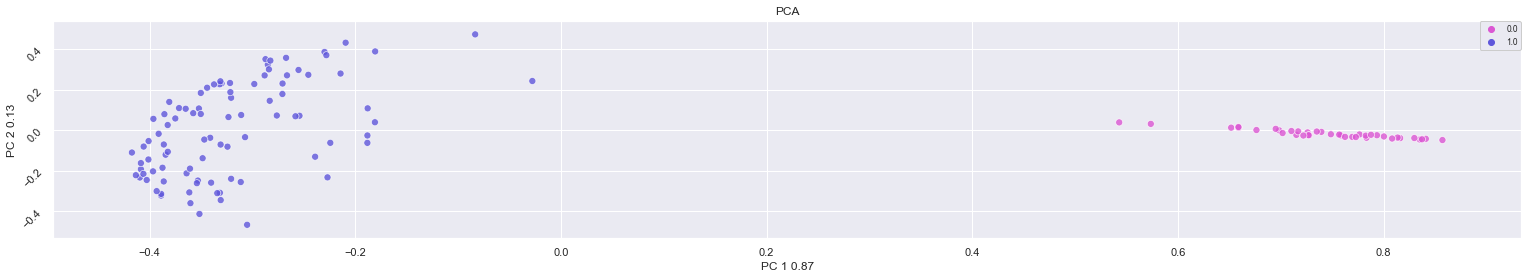

2 clusters -  silhoutte score: 0.38799479107469953 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.16190570754114744 - mutual information: 0.06174399694017896
4 clusters -  silhoutte score: 0.15829818888564448 - mutual information: 0.057686028398480006


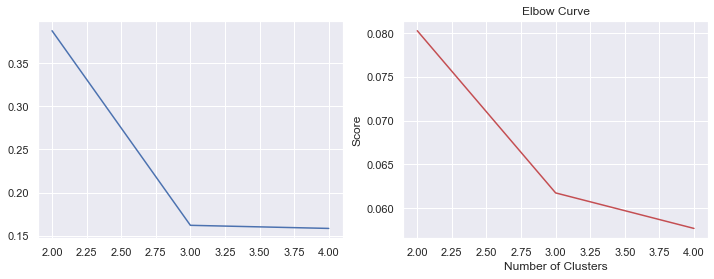

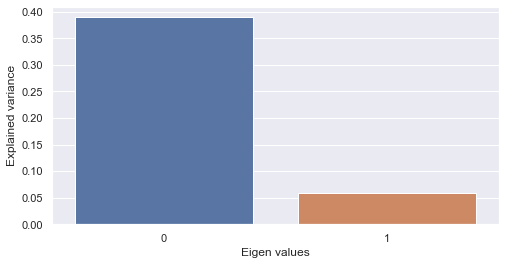

PCA on single-modal explained variance ratio: 0.4489508292561726


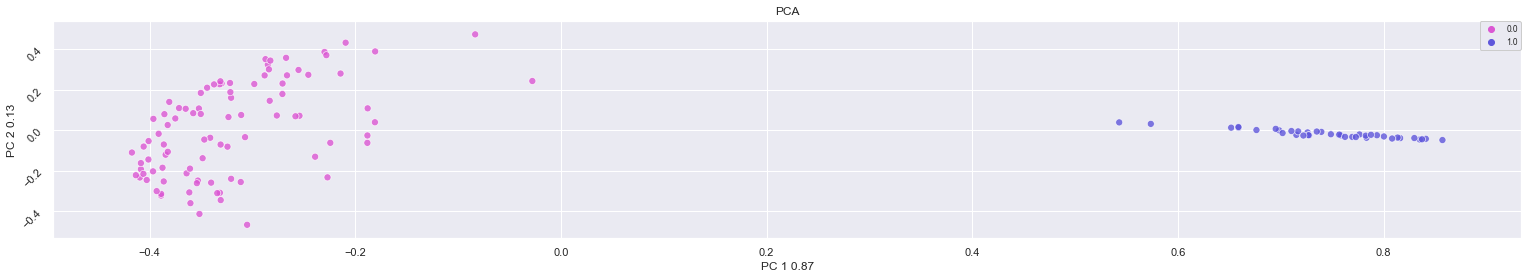

2 clusters -  silhoutte score: 0.38799479107469953 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.1418450938957911 - mutual information: 0.06259479908735058
4 clusters -  silhoutte score: 0.08776195599667157 - mutual information: 0.05917914760851265


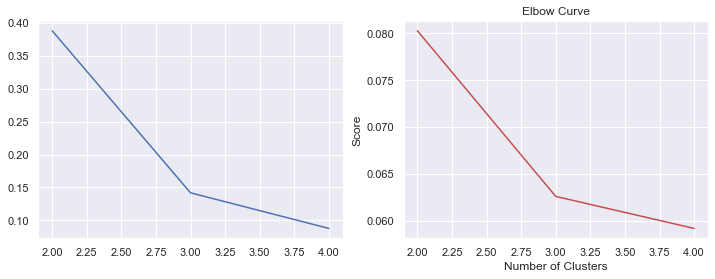

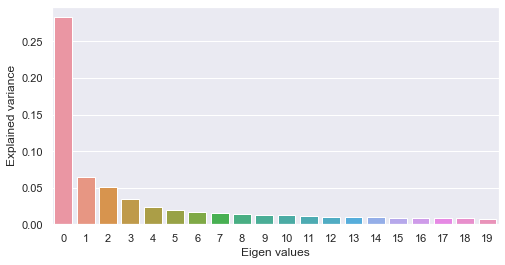

0.4780630917900629


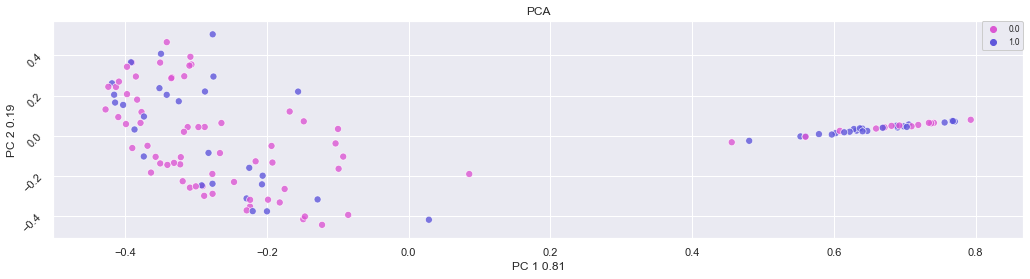

Results for KPCA: 

Best score for training data: 0.6 

Best C: 0.08 



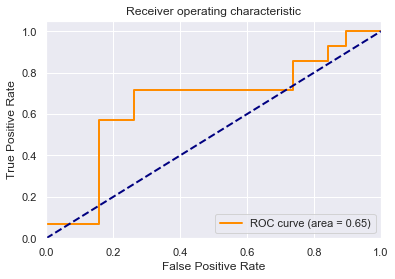

[[19  0]
 [14  0]]


              precision    recall  f1-score   support

           0       0.58      1.00      0.73        19
           1       0.00      0.00      0.00        14

    accuracy                           0.58        33
   macro avg       0.29      0.50      0.37        33
weighted avg       0.33      0.58      0.42        33

Training set score for Logistic Regression: 0.600000
Testing  set score for Logistic Regression: 0.575758
Best score for training data: 0.6384615384615384 

Best C: 1.0 

Best Gamma: 0.1 



C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


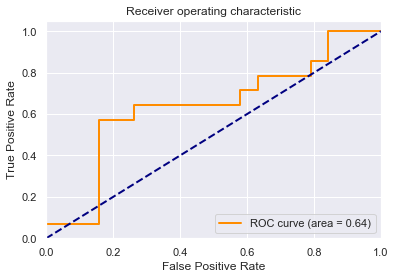

[[16  3]
 [ 6  8]]


              precision    recall  f1-score   support

           0       0.73      0.84      0.78        19
           1       0.73      0.57      0.64        14

    accuracy                           0.73        33
   macro avg       0.73      0.71      0.71        33
weighted avg       0.73      0.73      0.72        33

Training set score for SVM: 0.707692
Testing  set score for SVM: 0.727273
Best score for training data: 0.6846153846153846 

Best #estimators: 100 

Best max depth: 12 



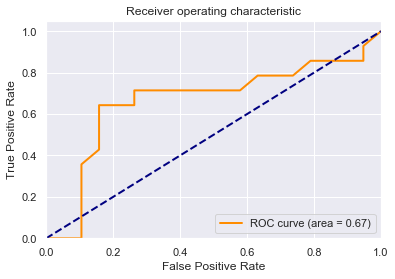

[[16  3]
 [ 6  8]]


              precision    recall  f1-score   support

           0       0.73      0.84      0.78        19
           1       0.73      0.57      0.64        14

    accuracy                           0.73        33
   macro avg       0.73      0.71      0.71        33
weighted avg       0.73      0.73      0.72        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.727273


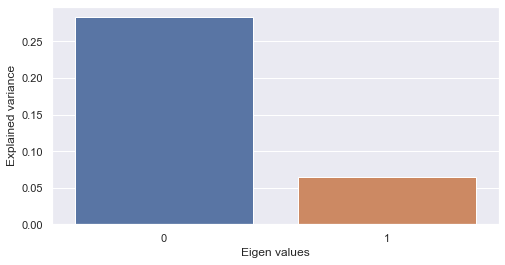

PCA on single-modal explained variance ratio: 0.34836058033359174


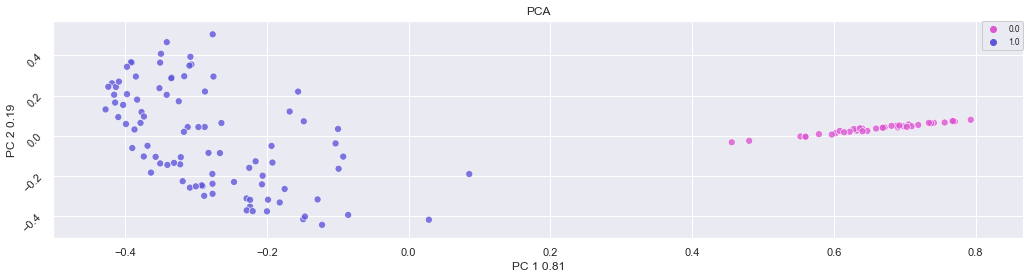

2 clusters -  silhoutte score: 0.2973030661553408 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.1294214916994049 - mutual information: 0.06174399694017896
4 clusters -  silhoutte score: 0.12666962866927853 - mutual information: 0.06755565872379037


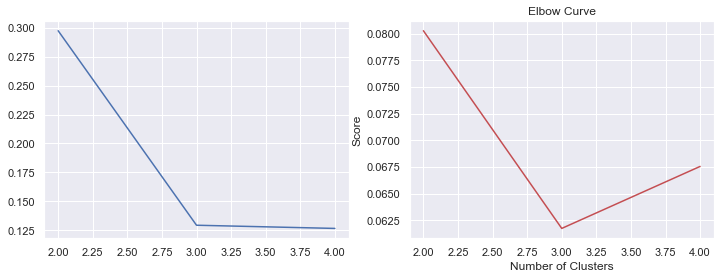

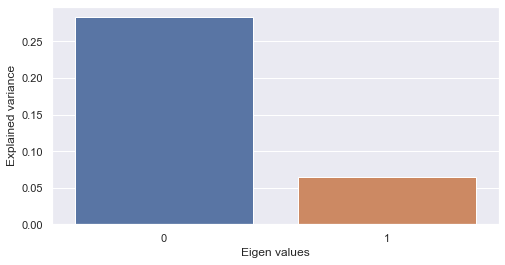

PCA on single-modal explained variance ratio: 0.34836058033359174


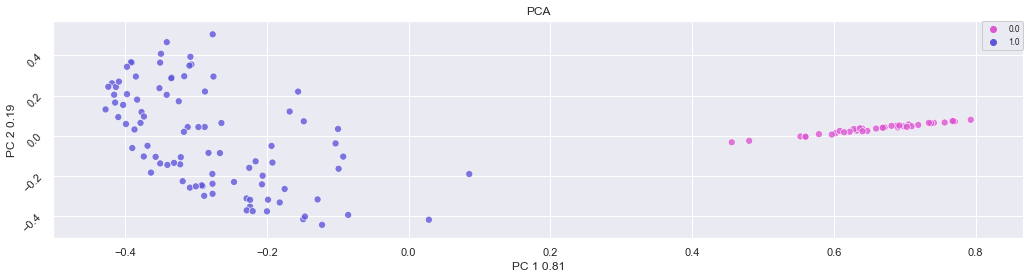

2 clusters -  silhoutte score: 0.2973030661553408 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.1285791784784992 - mutual information: 0.06291340822037277
4 clusters -  silhoutte score: 0.12223305201631919 - mutual information: 0.05883229829232589


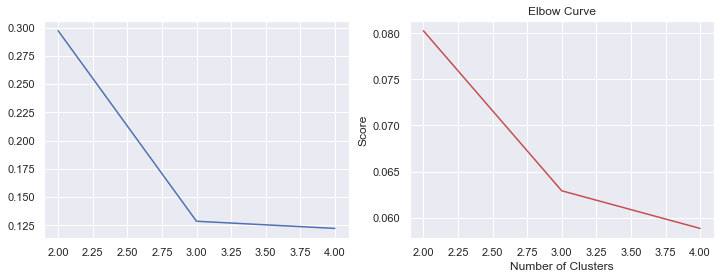

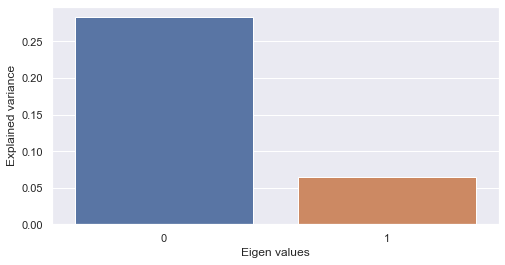

PCA on single-modal explained variance ratio: 0.34836058033359174


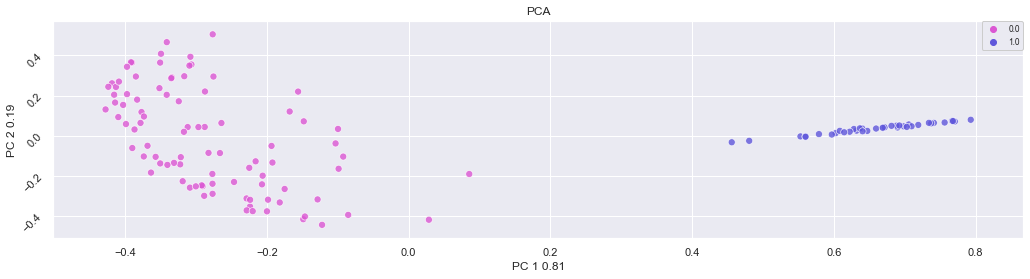

2 clusters -  silhoutte score: 0.2973030661553408 - mutual information: 0.08027624683129161
3 clusters -  silhoutte score: 0.11062396217944215 - mutual information: 0.06259479908735058
4 clusters -  silhoutte score: 0.08336172975900806 - mutual information: 0.07404675102265156


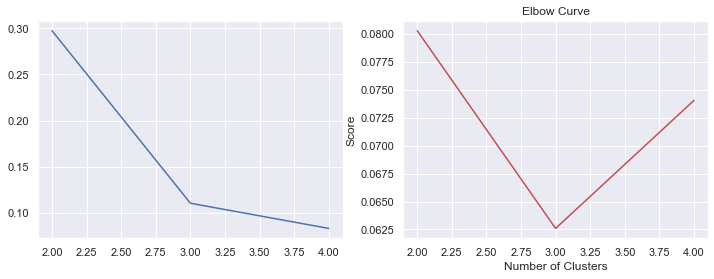

In [32]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Hyperparameters
gammas = [2**x/500 if x < 5 else round(2**x/100) for x in range(1,5)]
mus = [x/10 for x in range(1,11)]

gammas=[0.001,0.002,0.004,0.006]
mus=[0.75,0.8,0.9,1]

results=[]

for mu in mus:
    for gamma in gammas:
        # Apply rbf kernel to divided datasets
        X_kpca, X_kpca_test, kpca = Models.perform_multi_KPCA(X_train_first_norm, X_train_second_norm, y_train, X_test_first_norm, X_test_second_norm, gamma=gamma, mu=mu)

        ### CLASSIFICATION ###
        classify = Models.classify(X_kpca, X_kpca_test, np.ravel(y_train), np.ravel(y_test), model_type="KPCA")

        ### CLUSTERING ###
        clustering = Models.cluster(X_kpca,np.ravel(y_train), model_type="KPCA")
        
        results.append([mu,gamma] + classify + clustering)

In [36]:
scores = pd.DataFrame(results,
                      columns=["mu","gamma","LR accuracy","SVM accuracy", "RF accuracy", "LR ROC-AUC", "SVM ROC-AUC", "RF ROC-AUC","KMeans Silhouette","Spectral Silhouette","Hierarchical Silhouette","KMeans MI","Spectral MI","Hierarchical MI"])    
display(scores)
print(f"Random classifier: {y_test.iloc[:,0].value_counts()[0]/len(y_test)}")

mu  gamma  LR accuracy  SVM accuracy  RF accuracy  LR ROC-AUC  \
0   0.75  0.001     0.575758      0.727273     0.606061    0.736842   
1   0.75  0.002     0.575758      0.727273     0.727273    0.710526   
2   0.75  0.004     0.575758      0.727273     0.696970    0.718045   
3   0.75  0.006     0.575758      0.575758     0.575758    0.699248   
4   0.80  0.001     0.575758      0.727273     0.515152    0.718045   
5   0.80  0.002     0.575758      0.727273     0.606061    0.703008   
6   0.80  0.004     0.575758      0.727273     0.727273    0.699248   
7   0.80  0.006     0.575758      0.696970     0.727273    0.687970   
8   0.90  0.001     0.575758      0.727273     0.545455    0.672932   
9   0.90  0.002     0.606061      0.727273     0.606061    0.676692   
10  0.90  0.004     0.575758      0.727273     0.636364    0.676692   
11  0.90  0.006     0.575758      0.696970     0.666667    0.657895   
12  1.00  0.001     0.545455      0.727273     0.636364    0.650376   
13  1.00  0.002     0.545455      0.727273     0.666667    0.650376   
14  1.00  0.004     0.575758      0.727273     0.727273    0.650376   
15  1.00  0.006     0.575758      0.727273     0.727273    0.654135   

    SVM ROC-AUC  RF ROC-AUC  KMeans Silhouette  Spectral Silhouette  \
0      0.706767    0.680451           0.528279             0.528279   
1      0.710526    0.800752           0.429932             0.429932   
2      0.691729    0.689850           0.299144             0.299144   
3      0.627820    0.672932           0.222867             0.222867   
4      0.691729    0.569549           0.547822             0.547822   
5      0.695489    0.687970           0.449936             0.449936   
6      0.691729    0.744361           0.316840             0.316840   
7      0.691729    0.740602           0.237483             0.237483   
8      0.650376    0.524436           0.585360             0.585360   
9      0.657895    0.627820           0.488986             0.488986   
10     0.661654    0.716165           0.352197             0.352197   
11     0.669173    0.665414           0.267031             0.267031   
12     0.616541    0.648496           0.621869             0.621869   
13     0.635338    0.657895           0.527583             0.527583   
14     0.642857    0.654135           0.387995             0.387995   
15     0.639098    0.665414           0.297303             0.297303   

    Hierarchical Silhouette  KMeans MI  Spectral MI  Hierarchical MI  
0                  0.528279   0.058849     0.070245         0.059074  
1                  0.429932   0.080964     0.067556         0.057137  
2                  0.299144   0.086454     0.063027         0.069854  
3                  0.222867   0.075141     0.058234         0.064037  
4                  0.547822   0.058849     0.066475         0.060732  
5                  0.449936   0.064984     0.072332         0.062173  
6                  0.316840   0.061757     0.061341         0.077293  
7                  0.237483   0.073010     0.058234         0.070327  
8                  0.585360   0.063817     0.066981         0.068422  
9                  0.488986   0.072266     0.072332         0.059346  
10                 0.352197   0.067747     0.061778         0.061726  
11                 0.267031   0.073010     0.058234         0.079271  
12                 0.621869   0.072266     0.066981         0.060159  
13                 0.527583   0.072266     0.072332         0.061887  
14                 0.387995   0.065376     0.057686         0.059179  
15                 0.297303   0.067556     0.058832         0.074047

Random classifier: 0.5757575757575758


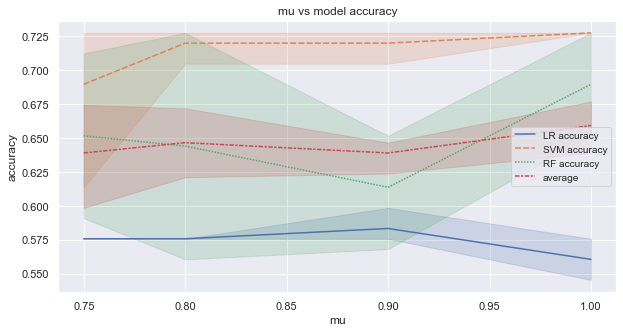

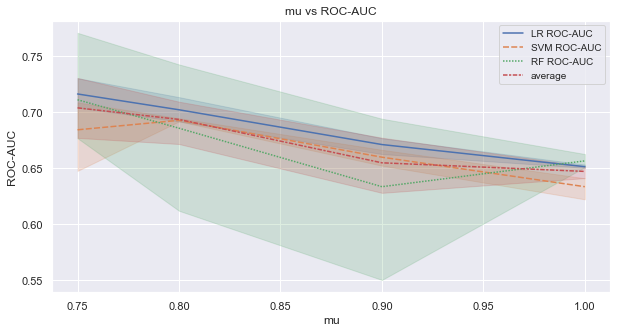

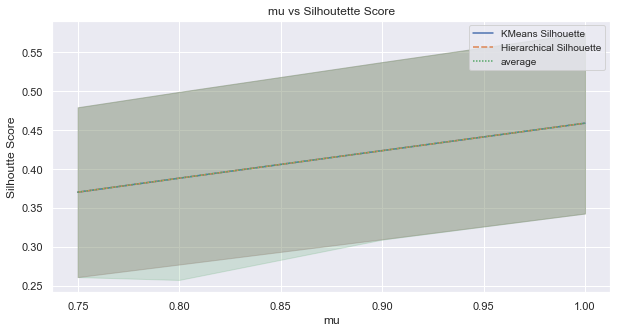

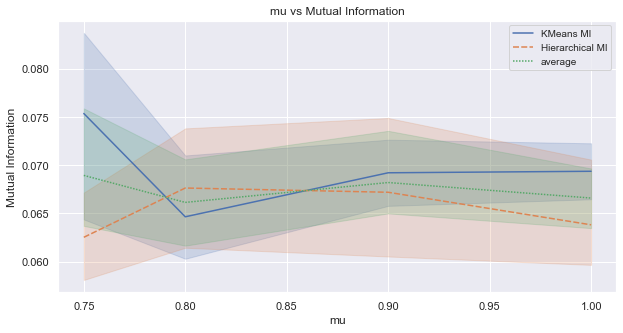

In [38]:

scores.index = sorted(mus * 4)

data_acc = scores[["LR accuracy","SVM accuracy","RF accuracy"]]
data_acc.loc[:,"average"] = data_acc.mean(axis=1)

data_auc = scores[["LR ROC-AUC", "SVM ROC-AUC", "RF ROC-AUC"]]
data_auc.loc[:,"average"] = data_auc.mean(axis=1)

data_ss = scores[["KMeans Silhouette","Hierarchical Silhouette"]]
data_ss.loc[:,"average"] = data_ss.mean(axis=1)

data_mi = scores[["KMeans MI","Hierarchical MI"]]
data_mi.loc[:,"average"] = data_mi.mean(axis=1)

sns.set()
hyperparam = "mu"

ax = sns.lineplot(data=data_acc)
plt.legend(fontsize='small')
ax.set_xlabel(hyperparam)
ax.set_ylabel(f"accuracy")
ax.figure.set_size_inches(10 , 5)
ax.set_title(f"{hyperparam} vs model accuracy")
plt.show()

ax = sns.lineplot(data=data_auc)
plt.legend(fontsize='small')
ax.set_xlabel(hyperparam)
ax.set_ylabel(f"ROC-AUC")
ax.figure.set_size_inches(10 , 5)
ax.set_title(f"{hyperparam} vs ROC-AUC")
plt.show()

ax = sns.lineplot(data=data_ss)
plt.legend(fontsize='small')
ax.set_xlabel(hyperparam)
ax.set_ylabel(f"Silhoutte Score")
ax.figure.set_size_inches(10 , 5)
ax.set_title(f"{hyperparam} vs Silhoutette Score")
plt.show()

ax = sns.lineplot(data=data_mi)
plt.legend(fontsize='small')
ax.set_xlabel(hyperparam)
ax.set_ylabel(f"Mutual Information")
ax.figure.set_size_inches(10 , 5)
ax.set_title(f"{hyperparam} vs Mutual Information")
plt.show()

In [28]:
sorted(mus * 4)

[0.2,
 0.2,
 0.2,
 0.2,
 0.4,
 0.4,
 0.4,
 0.4,
 0.6,
 0.6,
 0.6,
 0.6,
 0.8,
 0.8,
 0.8,
 0.8]

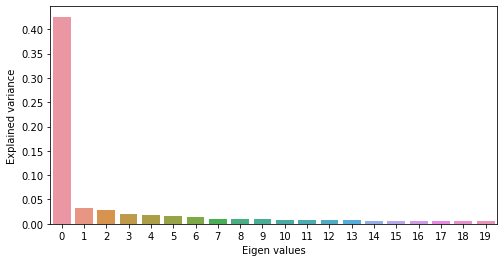

0.5413342323582516


(array([-0.2, -0.1,  0. ,  0.1,  0.2,  0.3]),
 <a list of 6 Text yticklabel objects>)

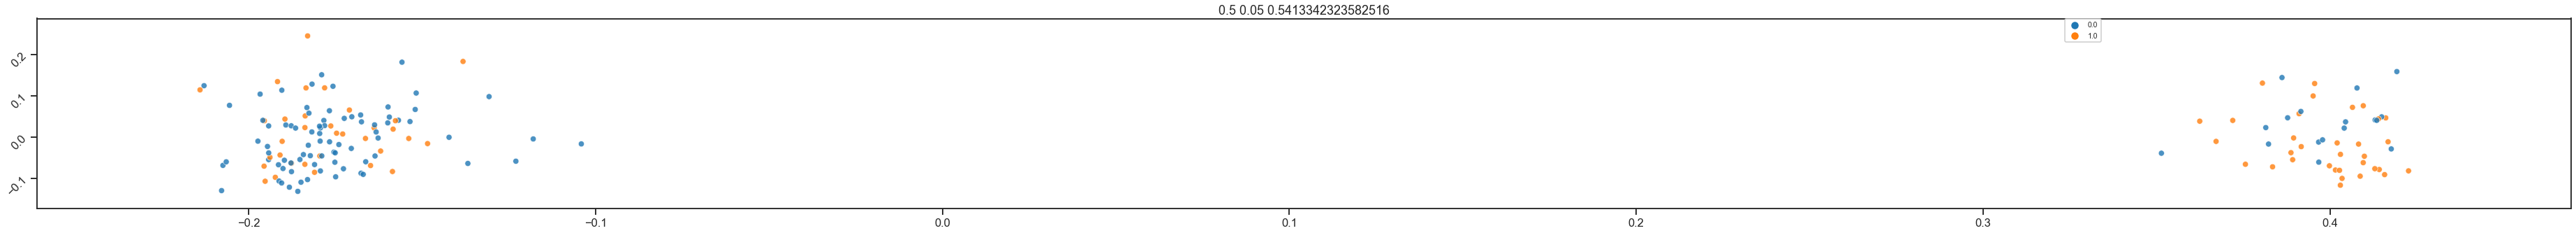

In [5]:
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel, sigmoid_kernel, laplacian_kernel
gamma = 0.05
degree = 4 
mu = 0.5
num_labels = y.nunique()[0]
# Apply rbf kernel to divided datasets
K1 = rbf_kernel(X=X_first)
K2 = laplacian_kernel(X=X_second)

Ktot = mu*K1 + (1-mu)*K2

# Use Ktot to perform KPCA 
kpca = KernelPCA(kernel="precomputed")
X_kpca = kpca.fit_transform(Ktot)
X_kpca_var = np.var(X_kpca,0)
X_kpca_var_ratio = X_kpca_var / sum(X_kpca_var)
X_kpca_train_labeled = np.c_[X_kpca , y]

ax1 = plt.subplot(1,1,1)
ax1.figure.set_size_inches((8, 4))
sns.barplot(np.arange(np.shape(X_kpca_var_ratio[:20])[0]),X_kpca_var_ratio[:20])
plt.xlabel("Eigen values")
plt.ylabel("Explained variance")
plt.show()

print(X_kpca_var_ratio[:6].sum())

pc1_explained_variance = X_kpca_var_ratio[0]
pc2_explained_variance = X_kpca_var_ratio[1]
pc1_ratio = pc1_explained_variance / (pc1_explained_variance + pc2_explained_variance)

# Plot first 2 principal components
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
ax1 = plt.subplot(1,1,1)
sns.scatterplot(x=X_kpca[:,0], 
                y=X_kpca[:,1], 
                alpha = 0.8, 
                s= 70, legend='full', 
                hue=X_kpca_train_labeled[:,-1])
ax1.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.,framealpha=1, frameon=True, fontsize='xx-small')
ax1.figure.set_size_inches( (5*(pc1_ratio/(1 - pc1_ratio)),5) )
ax1.set_title(f"{mu} {gamma} {X_kpca_var_ratio[:6].sum()}")
plt.yticks(rotation=45) 

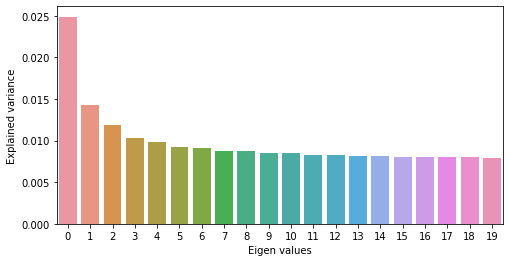

0.08050118188224127


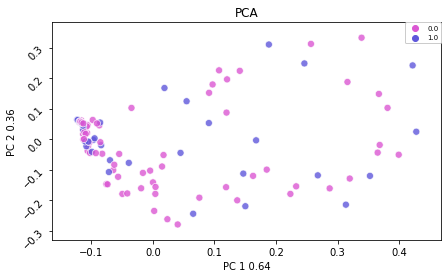

Results for KPCA: 

Best score for training data: 0.6 

Best C: 0.08 



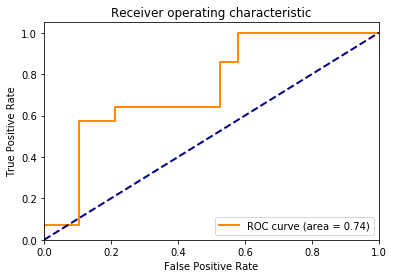

[[19  0]
 [14  0]]


              precision    recall  f1-score   support

           0       0.58      1.00      0.73        19
           1       0.00      0.00      0.00        14

    accuracy                           0.58        33
   macro avg       0.29      0.50      0.37        33
weighted avg       0.33      0.58      0.42        33

Training set score for Logistic Regression: 0.600000
Testing  set score for Logistic Regression: 0.575758
Best score for training data: 0.6 

Best C: 0.1

C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 

Best Gamma: scale 



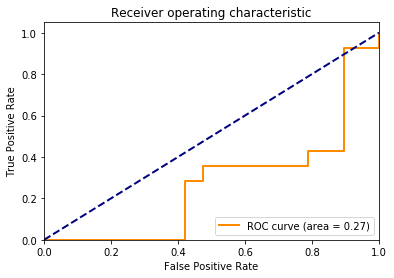

[[19  0]
 [14  0]]


              precision    recall  f1-score   support

           0       0.58      1.00      0.73        19
           1       0.00      0.00      0.00        14

    accuracy                           0.58        33
   macro avg       0.29      0.50      0.37        33
weighted avg       0.33      0.58      0.42        33

Training set score for SVM: 0.600000
Testing  set score for SVM: 0.575758


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6307692307692306 

Best #estimators: 100 

Best max depth: 12 



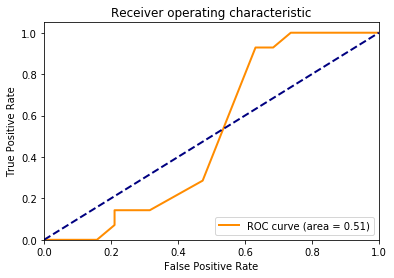

[[ 7 12]
 [ 1 13]]


              precision    recall  f1-score   support

           0       0.88      0.37      0.52        19
           1       0.52      0.93      0.67        14

    accuracy                           0.61        33
   macro avg       0.70      0.65      0.59        33
weighted avg       0.72      0.61      0.58        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.606061


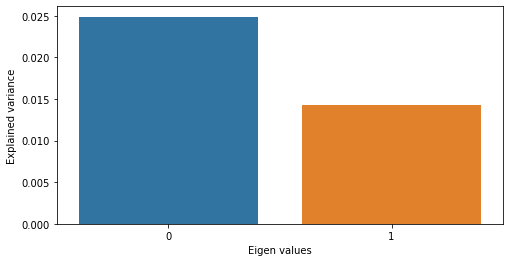

PCA on single-modal explained variance ratio: 0.039193457731606735


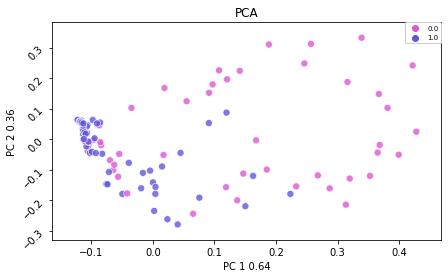

2 clusters -  silhoutte score: 0.006005740734496328 - mutual information: 0.006368589136601309
3 clusters -  silhoutte score: 0.008074216014733317 - mutual information: 0.004101403462246647
4 clusters -  silhoutte score: 0.007473804641893012 - mutual information: 0.005311361675617951


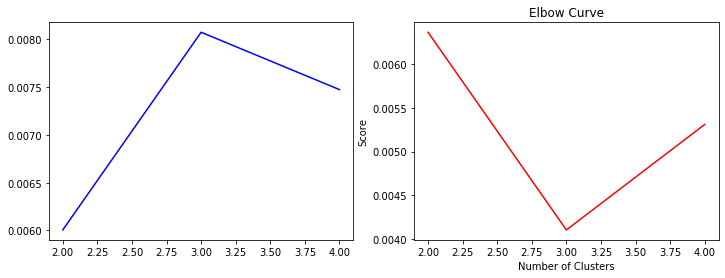

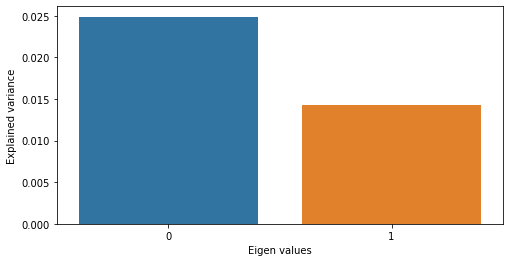

PCA on single-modal explained variance ratio: 0.039193457731606735


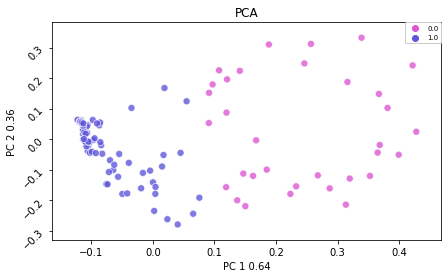

2 clusters -  silhoutte score: 0.008233597924033968 - mutual information: 0.005159929429461819
3 clusters -  silhoutte score: 0.0032079574648820096 - mutual information: 0.04102698883315643
4 clusters -  silhoutte score: 0.003448345542257016 - mutual information: 0.03109596713240069


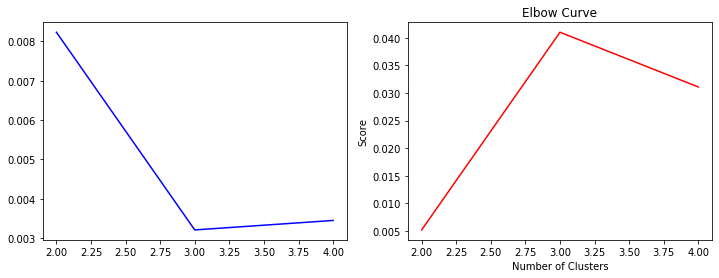

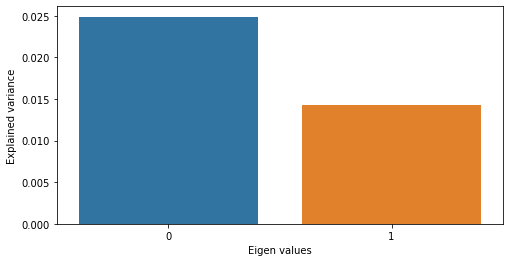

PCA on single-modal explained variance ratio: 0.039193457731606735


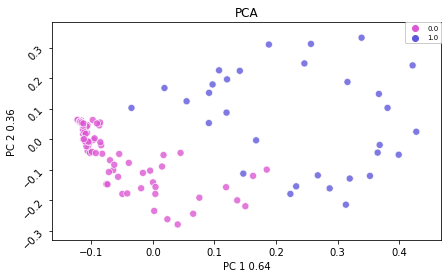

2 clusters -  silhoutte score: 0.007182576998789602 - mutual information: 0.00017817392730610387
3 clusters -  silhoutte score: 0.005887263135723994 - mutual information: 0.02179613637706048
4 clusters -  silhoutte score: 0.0016848320714447826 - mutual information: 0.019883607496483727


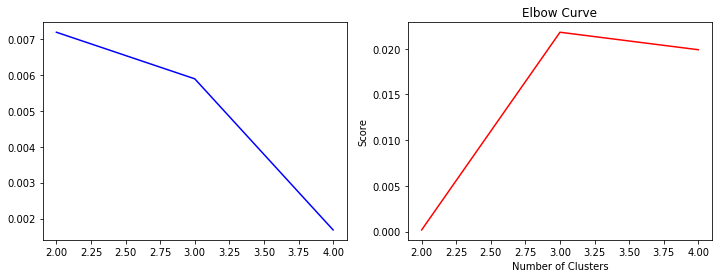

In [13]:
# Apply rbf kernel to divided datasets
X_kpca, X_kpca_test, kpca = Models.perform_multi_KPCA(X_train_first_norm, X_train_second_norm, y_train, X_test_first_norm,X_test_second_norm, gamma=0.04, mu=0.4)

### CLASSIFICATION ###
classify = Models.classify(X_kpca, X_kpca_test, np.ravel(y_train), np.ravel(y_test), model_type="KPCA")

### CLUSTERING ###
clustering = Models.cluster(X_kpca,np.ravel(y_train), model_type="KPCA")


In [9]:
X_test_first_norm.shape

(33, 3575)

In [10]:
X_train_first_norm.shape

(130, 3575)